#  CM50265 Machine Learning 2

## Coursework 2: Deep learning
### Youssef Alami Mejjati, Jordan Taylor, Jake Deane and Mohammad Golbabaee


This coursework is worth 75 points from the overall mark of 100 for this unit. Marks are given beside each task. The report will be your main method of assessment. __Students should form groups of 3 individuals and submit one report per group.__ For this coursework students can choose their partners until __20th February__.  Each group will receive a total mark for this course work and individuals in that group will share this mark (with weights) according to their contributions.  

- The __submission deadline__ for your report is
__17th May 2020, 12:00: online Moodle submission of your final report__

The main part of your report should not exceed __3000 word limit__. After the main part please attach a Table of individuals’ contributions and appendices including ONLY the codes (these are excluded from the word limit). The report should be submitted in PDF format. __Table of contributions__ should include both students’ names/university IDs, the list of contributions of each student, and finally the contribution percentage for each student. This percentage should be agreed between both individuals and it will be used to weigh their marks. We highly encourage individuals to evenly share the workload. Further, you should __include all codes__ relevant to your implementations as an appendix or appendices with a clear referencing to the main body of your report. Codes must be well commented (indicating major steps).

First and foremost your report should demonstrate and evaluate your results. It must include figures and screenshots with appropriate resolutions. Evaluation can be qualitative (how it looks) and, wherever possible, quantitative (tested numerically). Second you should provide evidence that you understood the mathematics behind the assignment in each task/question. You should concisely explain your approach to solve each task/question, and the choices you make (e.g. hyper-parameters etc) for each part.

Usual university rules apply, please check your MSc program handbook, particularly regarding plagiarism and delayed deliveries. 

__Note:__ All tasks should be implemented in TensorFlow. Guidelines below (tasks 3-5, 7) should work for a TensorFlow version 1. If you use TF v2 please note that some syntaxes have changed during the recent update, but you can still use version compatiblity to resolve the issue. The list includes but might not be limited to:

tf.layers.conv2d -> tf.nn.conv2d

tf.layers.dense -> tf.nn.dense

tf.layers.flatten -> tf.compat.v1.layers.flatten

tf.variable_scope -> tf.compat.v1.variable_scope

tf.get_collection -> tf.compat.v1.get_collection

similarly for tf.compat.v1.InteractiveSession, tf.compat.v1.train.AdamOptimizer, tf.compat.v1.placeholder, tf.compat.v1.global_variables_initializer, tf.compat.v1.local_variables_initializer, tf.compat.v1.train.Saver, tf.compat.v1.summary.FileWriter, tf.compat.v1.trainable_variables

See TF web documentation in case you encounter version incompatibility. 

Guides on tasks 6 and 8 should be already compatible with TF2. 


## The coursework 


In [1]:
import warnings
warnings.filterwarnings('ignore')

try:
    import tensorflow.compat.v1 as tf
    tf.disable_eager_execution()
except:
    import tensorflow as tf

# import tensorflow as tf # This may laod Tensorflow 2.0.0 if that is the verison of the package on your distribution
#use import tensorflow.compat.v1 as tf for tensorflow 1
# tf.disable_v2_behaviour() # Only needed if using tensorflow 1 with tensorflow 2 being the package avlaiable  
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from IPython.display import Image
%matplotlib inline


In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
n_train = x_train.shape[0]
n_test = x_test.shape[0]

We scale the data to be in $[-1,1]$.

In [3]:
x_train, x_test = x_train / 127.5 - 1, x_test / 127.5 - 1

The size of each data points is $28 \times 28$. While this format will be useful when using CNNs, we will vectorize the datapoints for visualization and preliminary questions.

In [4]:
nb_features = np.prod(x_train.shape[1:])
x_train.resize((n_train, nb_features))
x_test.resize((n_test, nb_features))

### 1. Data visualisation (5 points)
Project the training data points in a 2D space using PCA. Use the obtained 2D embedding and plot the training data-points with different markers or colors for each class (you are allowed to use PCA from scikit learn). 
- Why PCA is a good option to visualize data? 
- Add this plot in your report and discuss your observations. 
- Which classes can be linearly separated?


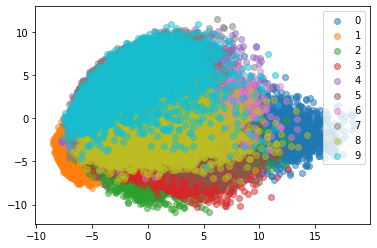

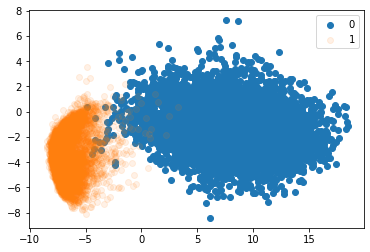

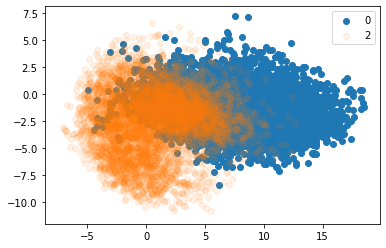

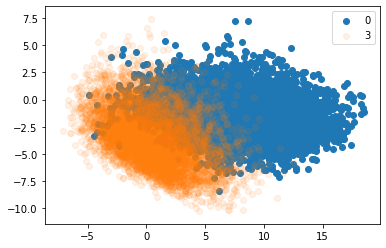

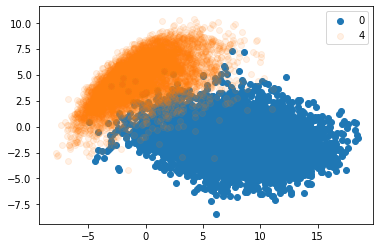

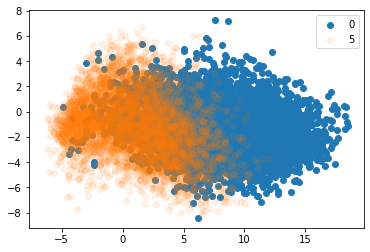

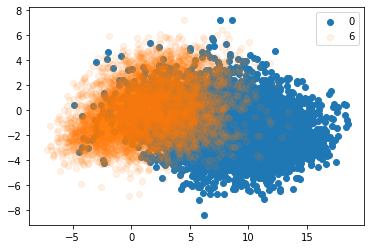

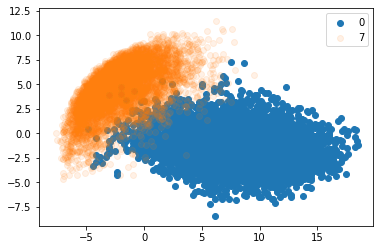

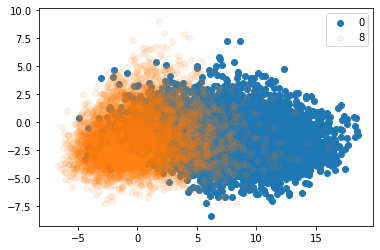

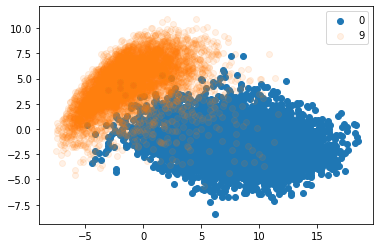

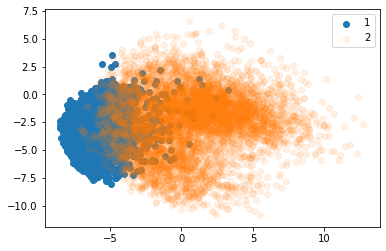

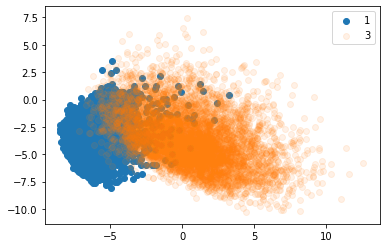

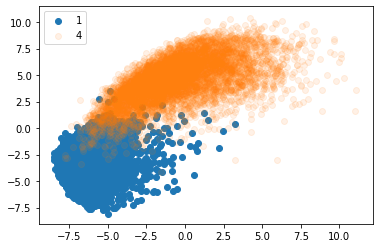

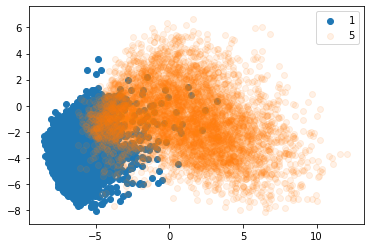

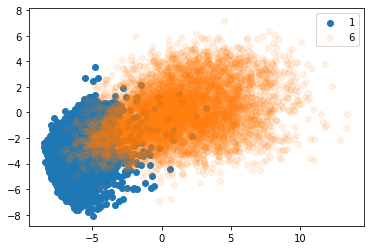

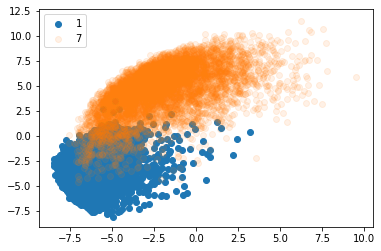

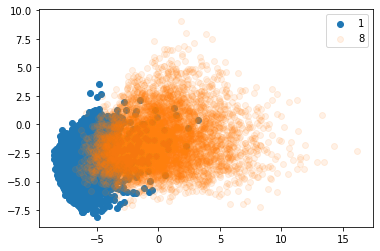

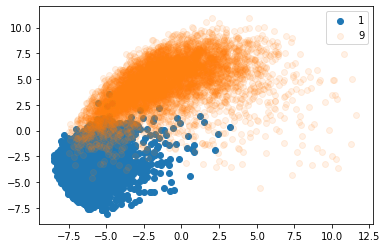

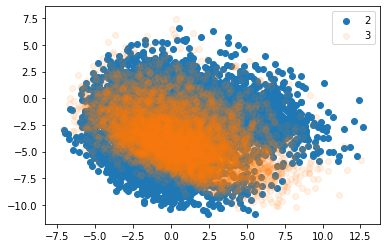

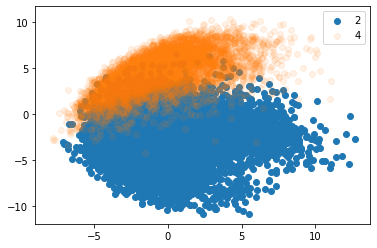

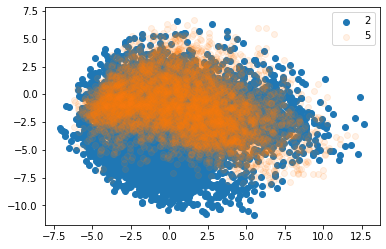

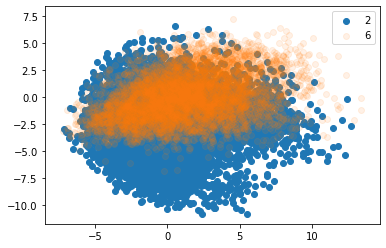

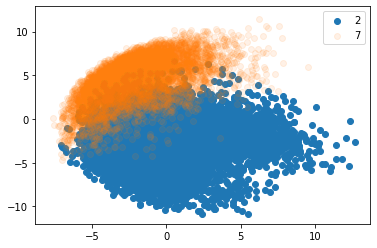

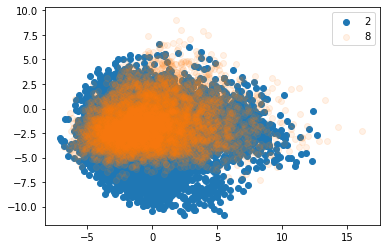

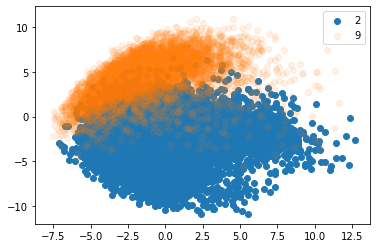

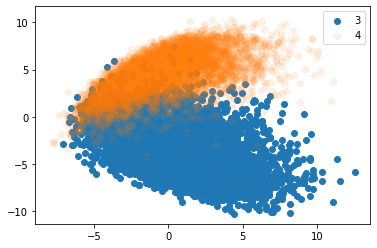

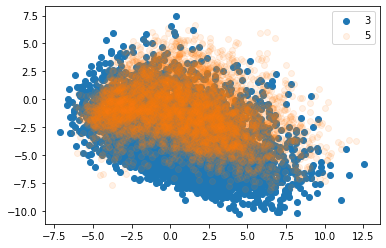

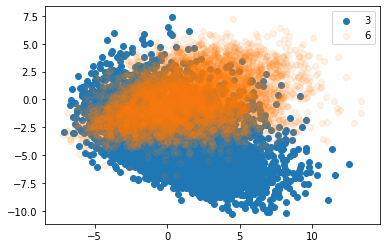

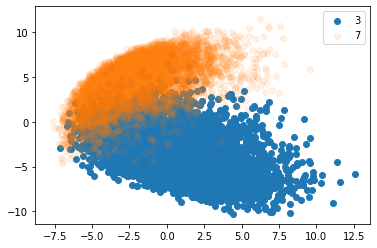

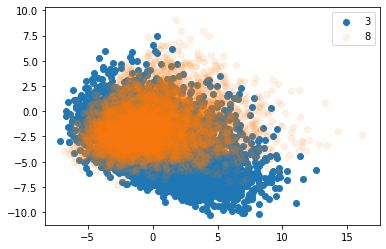

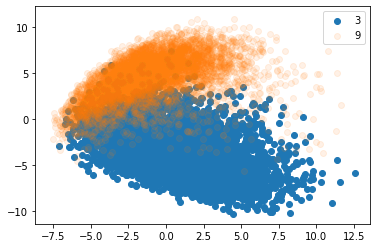

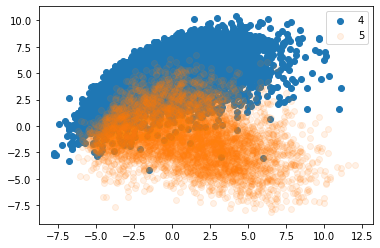

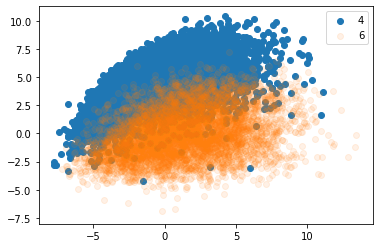

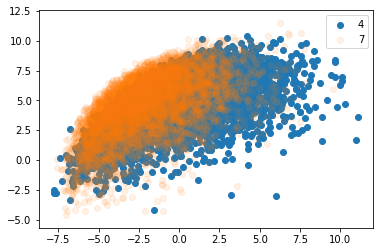

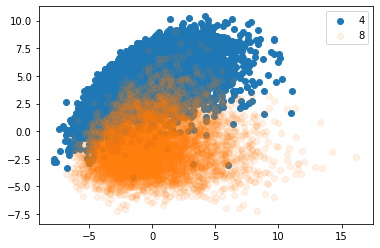

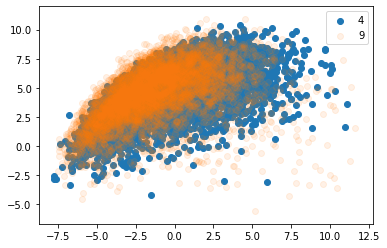

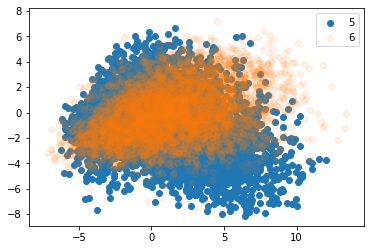

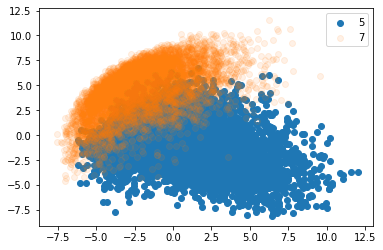

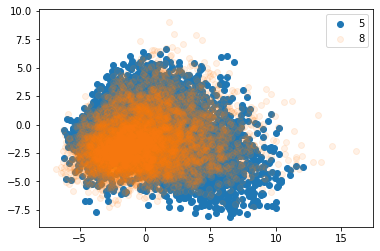

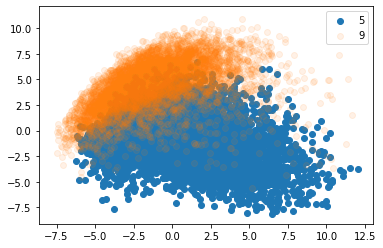

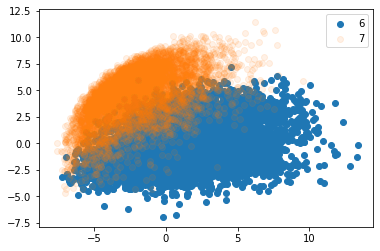

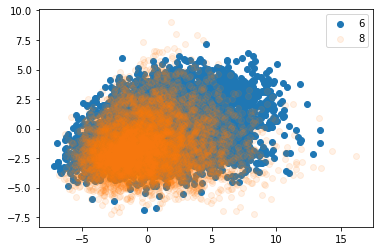

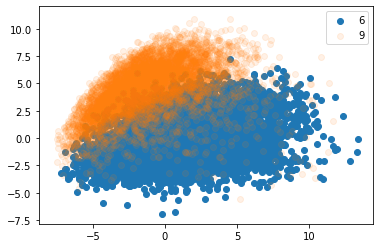

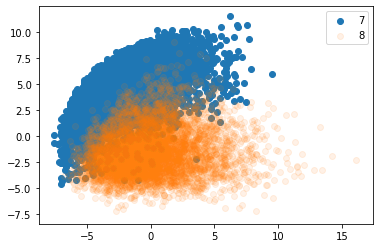

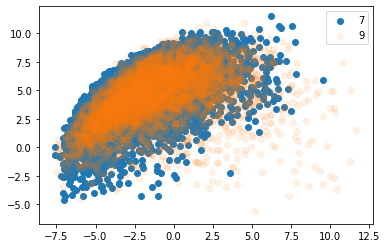

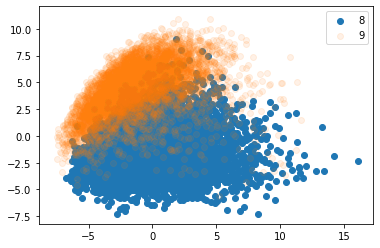

In [5]:
from sklearn.decomposition import PCA
x_pca = PCA(n_components=2).fit_transform(x_train)
items = np.unique(y_train)

for n,item in enumerate(items):
    plt.scatter(x_pca[y_train==item][:,0],x_pca[y_train==item][:,1],label = str(item), alpha=0.5)
plt.legend()
plt.show()

for n,item in enumerate(items):
    for item1 in items[n+1:]:
        plt.scatter(x_pca[y_train==item][:,0],x_pca[y_train==item][:,1],label = str(item))
        plt.scatter(x_pca[y_train==item1][:,0],x_pca[y_train==item1][:,1],label = str(item1),alpha=0.1)
        plt.legend()
        plt.show()



### 2. Perceptrons: (10 points)
Single Layer Perceptron is one of the most basic binary classifiers one can use. In this part of the CW you should implement an iterative algorithm for training the Single Layer Perceptron.

As we are dealing with a binary classification problem, we will pick data points corresponding to classes 0 and 1 (handwritten digits). In addition we choose our binary labels to be -1 and 1, respectively.

In [5]:
cond = (y_train == 0) + (y_train == 1)
binary_x_train = x_train[cond,:]
binary_y_train = y_train[cond]*1.0

In [6]:
binary_y_train[binary_y_train == 0] = -1
binary_y_train[binary_y_train == 1] = 1

#### Task 2.1
Complete the function 'predict' below.
#### inputs:

+ $x\in\mathbb{R^{n*m}}$, with $n$ being the number of datapoints and $m$ being the feature dimensionality. 
+ $w \in\mathbb{R^m}$ is the parameter vector we wish to learn. 
+ $b \in\mathbb{R}$ is the corresponding bias.

#### outputs: 
+ 'prediction'$\in\mathbb{R^n}$, a vector containing prediction values associated with $x$. 

In [8]:
def predict(x, w, b):

    ######### Complete the function- x point ######### 
    prediction = np.sign(x@w+b)
    ######################################
    return prediction


#### Task 2.2
+ Use the funtion 'predict' above to implement the Single Layer Perceptron algorithm by completing the function 'optimize' defined below.
    #### inputs:

    + $x\in\mathbb{R^{n*m}}$, with $n$ being the number of datapoints and $m$ being the feature dimensionality. 
    + $w \in\mathbb{R^m}$ is the initial parameter vector.
    + $b \in\mathbb{R}$ is the initial bias value.
    + $y\in\mathbb{R^n}$ is the training labels associated with x.
    #### outputs:
    + $w$ is the optimized parameter vector.
    + $b$ the corresponding learned bias.
    + $\text{error}$ is the classification error obtained.  
    
    
 
    
Use the learned parameters $w$, $b$ (obtained via function 'optimize') and the function 'predict' to return the classification accuracy on the test set using x_train and y_train as training data. 

- Demonstrate that your algorithm converges to a good local minima. Plot the training error curve vs. number of iterations. 
- Show what feature $w$ has learned and discuss why? (demonstrate $w$ as an image with the same size as inputs).

- Repeat this training/testing procedure to classify different pairs. Report the accuracies of 5 pairs in a Table and dicuss why some are easier to classify than others.


In [9]:
try:
    import cupy as cp     #Using cupy library if available
except:
    import numpy as cp
    
    
def optimize(x, y):
    iter = 0
    x = cp.array(x) #loading variables to GPU if cupy is available
    y = cp.array(y)
    y_logist = y.copy() #y to be used with logsitic regression
    y_logist[y==-1] = 0

    error=np.inf
    n, m = x.shape
    w = cp.random.rand(m)*0 # Initialize the w vector
    b = cp.random.rand()*0  # Initialize the b vector
    alpha = 0.1

    def loss(x,y,w,b):
        temp = x@w+b
        return -temp@y + cp.log(1+cp.exp(temp)).sum()
    
    error_list = [float(cp.mean(cp.sign(x@w+b)!=y)),]
    redo = False
    while (iter <= 1000) & (error > 1e-5):
        ######### Complete the function- x points #########
        if redo == False:
            grad_w = (1/(1+cp.exp(-x@w-b)) - y_logist)@x
            grad_b = (1/(1+cp.exp(-x@w-b)) - y_logist).sum()
        
        temp_w = w - alpha*grad_w
        temp_b = b - alpha*grad_b

        diff = loss(x, y_logist, temp_w, temp_b) - loss(x, y_logist, w, b)
        if diff<0:
            b = temp_b
            w = temp_w
            alpha*=5
        else:
            alpha/=10
            redo == True
            
        error = cp.mean(cp.sign(x@w+b)!=y)
        error_list.append(float(error))
        iter+=1
    try:
        w = cp.asnumpy(w) #converting back to numpy array if cupy was used
        b = cp.asnumpy(b)
    except:
        pass

    return w, b, error_list

Train Accuracy: 0 vs. 1 = 100.00%
Test Accuracy: 0 vs. 1 = 99.95%


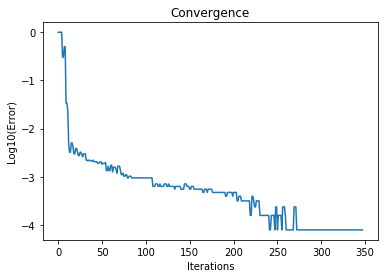

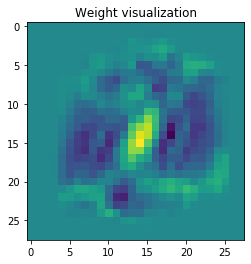

Wall time: 3.39 s


In [10]:
%%time
the_w, the_b, training_error = optimize(binary_x_train, binary_y_train)
cond = (y_test == 0) + (y_test == 1)
binary_x_test = x_test[cond,:]
binary_y_test = y_test[cond]*1.0
binary_y_test[binary_y_test == 0] = -1
binary_y_test[binary_y_test == 1] = 1
    
test_accuracy = np.mean(predict(binary_x_test, the_w, the_b)==binary_y_test)
print("Train Accuracy: {} vs. {} = {:.2f}%".format(0, 1, (1-training_error[-1])*100))
print("Test Accuracy: {} vs. {} = {:.2f}%".format(0, 1, test_accuracy*100))

plt.plot(np.log10(training_error))
plt.xlabel("Iterations")
plt.ylabel("Log10(Error)")
plt.title("Convergence")
plt.show()
plt.imshow(the_w.reshape(28,28))
plt.title("Weight visualization")
plt.show()

Accuracy: 0 vs. 1 = Train: 100.00 | Test: 99.95%
Accuracy: 0 vs. 2 = Train: 99.45 | Test: 99.30%
Accuracy: 0 vs. 3 = Train: 99.75 | Test: 99.80%
Accuracy: 0 vs. 4 = Train: 99.95 | Test: 99.75%
Accuracy: 0 vs. 5 = Train: 99.12 | Test: 99.20%
Accuracy: 0 vs. 6 = Train: 99.58 | Test: 98.92%


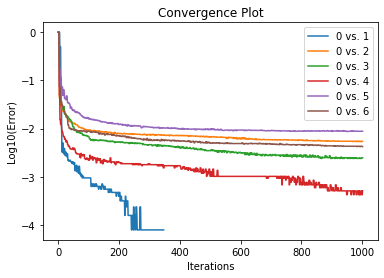

In [11]:
from itertools import combinations
pairs = combinations(np.arange(10), 2)
for pair in list(pairs)[0:6]:
    cond = (y_train == pair[0]) + (y_train == pair[1])
    binary_x_train = x_train[cond,:]
    binary_y_train = y_train[cond]*1.0
    binary_y_train[binary_y_train == pair[0]] = -1
    binary_y_train[binary_y_train == pair[1]] = 1
    
    cond = (y_test == pair[0]) + (y_test == pair[1])
    binary_x_test = x_test[cond,:]
    binary_y_test = y_test[cond]*1.0
    binary_y_test[binary_y_test == pair[0]] = -1
    binary_y_test[binary_y_test == pair[1]] = 1
    
    the_w, the_b, training_error = optimize(binary_x_train, binary_y_train)
    test_accuracy = np.mean(predict(binary_x_test, the_w, the_b)==binary_y_test)
    print("Accuracy: {} vs. {} = Train: {:.2f} | Test: {:.2f}%".format(
          pair[0], pair[1], (1-training_error[-1])*100,test_accuracy*100))
    plt.plot(np.log10(training_error), label="{} vs. {}".format(pair[0], pair[1]))

plt.xlabel("Iterations")
plt.ylabel("Log10(Error)")
plt.legend()
plt.title("Convergence Plot")

plt.show()


### 3: Multi Layer Perceptron (10 points)

Multi Layer Perceptron (MLP) is a fully connected deep (more than one hidden layer) network. In this part of the coursework we will implement a 2 hidden layers MLP with Recified Linear Unit (ReLU) activations. We will train the model via ADAM optimizer over a cross-entropy loss function.

First of all, we will convert our label vectors to matrices via one-hot encoding (e.g. $y=2$ would become $[0,0,1,0,0,0,0,0,0,0]$). This can be simply done using commands below:

In [7]:
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

Below, we define a class MLP. It is initialized via:  

+ x_train: The training matrix.
+ y_train: One hot encoding of the corresponding labels.
+ lr: Learning rate used for ADAM optimizer
+ nb_epochs: Number of epochs to use
+ batch_size: The number of data point in each mini-batch
+ output_dir: The directory where model parameters and tensorboard event files will be stored.

We also define the methods: 
* 'create_model' which will desribe a neural network architecture of the form $[784, 1000, 1000, 10]$, each integer representing the number of neurons in a given layer while the length of the vector defines the number of layers accordingly. 
* 'compute_loss' which given the output of 'create_model' will calculate the cross-entropy loss of the mini-batches.
* 'train' where we initiate a tensorflow session and perform the training iterations. 
* 'test' where we load our trained model and perform inference on the test set.

##### Task 3.1
- Complete the method 'create_model' in order to implement a network of the shape $[784, 1000, 1000, 10]$, use ReLU as the non linear activation for hidden layers.

   The function 'create_model' to complete defines the class variables: 

   + self.logits $\in \mathbb{R^{10}}$ containing the output __<font color='red'>without activation of the MLP.</font>__
   + self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.

- Using self.logits complete the method 'compute_loss' that takes the labels and the predicted logits to return the corresponfing cross-entropy loss. 

Hints: 
- You may use tf.layers.dense to implement a fully connected layer. 
- To obtain the probabilities you must normalize your outputs in a way that their sum is equal to one using a softmax function.

In [8]:
class MLP:
    def __init__(self, x_train, y_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.nb_features = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.im = tf.placeholder(tf.float32, [None, 784])
        self.labels = tf.placeholder(tf.float32, [None, 10])
        self.x_train = x_train
        self.y_train = y_train
        
    def create_model(self):
        with tf.variable_scope('MLP', reuse=tf.AUTO_REUSE):
        ######### Complete the function ######### 
            self.l1 = tf.layers.Dense(784)(self.im)
            self.l2 = tf.layers.Dense(1000, activation='relu')(self.l1)
            self.l3 = tf.layers.Dense(1000, activation='relu')(self.l2)
            
            self.logits = tf.layers.Dense(10)(self.l3)
            self.preds = tf.nn.softmax(self.logits)
            
        #########################################
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.labels, logits=self.logits))
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss)
            
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

Now that we defined our model, our loss and its optimizer. we can instantate the MLP class, initiate our variables, and start the tensorflow session:

In [9]:
tf.reset_default_graph()
model = MLP(x_train, y_train, './MLP_logdir/', 0.001, 10, 100)
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary = tf.Summary()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



We can now start training. We loop over the training data points and we feed them to the session in mini-batches form. we repeat this process several times (for several epochs). 

In [10]:
%%time
for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    y_in = model.y_train[randomize,:]
    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train = y_in[i*model.batch_size: (i+1)*model.batch_size]
        _ , preds, loss, loss_summ = sess.run([model.trainer, model.preds, model.loss, model.loss_summ], 
                                 feed_dict={model.im: input_x_train, 
                                            model.labels: input_y_train})
        y_preds = np.argmax(preds, axis=1)
        y_real = np.argmax(input_y_train, axis=1)
        acc_train = np.mean((y_preds==y_real)*1)
        print('Epoch %d, Iteration %d, loss %.3f, batch accuracy %.3f' %(epoch, i, loss, acc_train))
        writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    saver.save(sess, model.output_dir, global_step=epoch)  
# sess.close()

Epoch 0, Iteration 0, loss 2.452, batch accuracy 0.090
Epoch 0, Iteration 1, loss 3.931, batch accuracy 0.340
Epoch 0, Iteration 2, loss 3.081, batch accuracy 0.120
Epoch 0, Iteration 3, loss 2.052, batch accuracy 0.480
Epoch 0, Iteration 4, loss 2.927, batch accuracy 0.280
Epoch 0, Iteration 5, loss 2.334, batch accuracy 0.230
Epoch 0, Iteration 6, loss 2.318, batch accuracy 0.410
Epoch 0, Iteration 7, loss 1.936, batch accuracy 0.290
Epoch 0, Iteration 8, loss 1.472, batch accuracy 0.490
Epoch 0, Iteration 9, loss 1.688, batch accuracy 0.590
Epoch 0, Iteration 10, loss 1.213, batch accuracy 0.550
Epoch 0, Iteration 11, loss 1.106, batch accuracy 0.660
Epoch 0, Iteration 12, loss 0.956, batch accuracy 0.630
Epoch 0, Iteration 13, loss 0.623, batch accuracy 0.820
Epoch 0, Iteration 14, loss 0.670, batch accuracy 0.760
Epoch 0, Iteration 15, loss 0.577, batch accuracy 0.820
Epoch 0, Iteration 16, loss 0.790, batch accuracy 0.810
Epoch 0, Iteration 17, loss 0.783, batch accuracy 0.730
Ep

Epoch 0, Iteration 145, loss 0.465, batch accuracy 0.860
Epoch 0, Iteration 146, loss 0.340, batch accuracy 0.920
Epoch 0, Iteration 147, loss 0.355, batch accuracy 0.900
Epoch 0, Iteration 148, loss 0.407, batch accuracy 0.880
Epoch 0, Iteration 149, loss 0.240, batch accuracy 0.920
Epoch 0, Iteration 150, loss 0.172, batch accuracy 0.940
Epoch 0, Iteration 151, loss 0.204, batch accuracy 0.940
Epoch 0, Iteration 152, loss 0.237, batch accuracy 0.930
Epoch 0, Iteration 153, loss 0.442, batch accuracy 0.880
Epoch 0, Iteration 154, loss 0.223, batch accuracy 0.890
Epoch 0, Iteration 155, loss 0.152, batch accuracy 0.950
Epoch 0, Iteration 156, loss 0.413, batch accuracy 0.880
Epoch 0, Iteration 157, loss 0.372, batch accuracy 0.870
Epoch 0, Iteration 158, loss 0.593, batch accuracy 0.850
Epoch 0, Iteration 159, loss 0.931, batch accuracy 0.780
Epoch 0, Iteration 160, loss 0.595, batch accuracy 0.780
Epoch 0, Iteration 161, loss 0.535, batch accuracy 0.830
Epoch 0, Iteration 162, loss 0.

Epoch 0, Iteration 302, loss 0.176, batch accuracy 0.930
Epoch 0, Iteration 303, loss 0.194, batch accuracy 0.930
Epoch 0, Iteration 304, loss 0.227, batch accuracy 0.940
Epoch 0, Iteration 305, loss 0.133, batch accuracy 0.950
Epoch 0, Iteration 306, loss 0.179, batch accuracy 0.970
Epoch 0, Iteration 307, loss 0.280, batch accuracy 0.910
Epoch 0, Iteration 308, loss 0.295, batch accuracy 0.910
Epoch 0, Iteration 309, loss 0.281, batch accuracy 0.920
Epoch 0, Iteration 310, loss 0.167, batch accuracy 0.960
Epoch 0, Iteration 311, loss 0.353, batch accuracy 0.920
Epoch 0, Iteration 312, loss 0.190, batch accuracy 0.970
Epoch 0, Iteration 313, loss 0.304, batch accuracy 0.950
Epoch 0, Iteration 314, loss 0.227, batch accuracy 0.920
Epoch 0, Iteration 315, loss 0.105, batch accuracy 0.950
Epoch 0, Iteration 316, loss 0.130, batch accuracy 0.930
Epoch 0, Iteration 317, loss 0.157, batch accuracy 0.950
Epoch 0, Iteration 318, loss 0.065, batch accuracy 0.990
Epoch 0, Iteration 319, loss 0.

Epoch 0, Iteration 497, loss 0.075, batch accuracy 0.970
Epoch 0, Iteration 498, loss 0.084, batch accuracy 0.970
Epoch 0, Iteration 499, loss 0.071, batch accuracy 0.980
Epoch 0, Iteration 500, loss 0.078, batch accuracy 0.980
Epoch 0, Iteration 501, loss 0.129, batch accuracy 0.960
Epoch 0, Iteration 502, loss 0.149, batch accuracy 0.940
Epoch 0, Iteration 503, loss 0.210, batch accuracy 0.950
Epoch 0, Iteration 504, loss 0.231, batch accuracy 0.940
Epoch 0, Iteration 505, loss 0.107, batch accuracy 0.970
Epoch 0, Iteration 506, loss 0.134, batch accuracy 0.960
Epoch 0, Iteration 507, loss 0.274, batch accuracy 0.920
Epoch 0, Iteration 508, loss 0.189, batch accuracy 0.940
Epoch 0, Iteration 509, loss 0.126, batch accuracy 0.950
Epoch 0, Iteration 510, loss 0.053, batch accuracy 0.990
Epoch 0, Iteration 511, loss 0.146, batch accuracy 0.970
Epoch 0, Iteration 512, loss 0.224, batch accuracy 0.910
Epoch 0, Iteration 513, loss 0.250, batch accuracy 0.930
Epoch 0, Iteration 514, loss 0.

Epoch 1, Iteration 77, loss 0.228, batch accuracy 0.930
Epoch 1, Iteration 78, loss 0.054, batch accuracy 0.980
Epoch 1, Iteration 79, loss 0.183, batch accuracy 0.950
Epoch 1, Iteration 80, loss 0.094, batch accuracy 0.970
Epoch 1, Iteration 81, loss 0.192, batch accuracy 0.940
Epoch 1, Iteration 82, loss 0.202, batch accuracy 0.950
Epoch 1, Iteration 83, loss 0.142, batch accuracy 0.950
Epoch 1, Iteration 84, loss 0.099, batch accuracy 0.960
Epoch 1, Iteration 85, loss 0.111, batch accuracy 0.960
Epoch 1, Iteration 86, loss 0.173, batch accuracy 0.950
Epoch 1, Iteration 87, loss 0.431, batch accuracy 0.860
Epoch 1, Iteration 88, loss 0.386, batch accuracy 0.870
Epoch 1, Iteration 89, loss 0.238, batch accuracy 0.940
Epoch 1, Iteration 90, loss 0.135, batch accuracy 0.950
Epoch 1, Iteration 91, loss 0.108, batch accuracy 0.940
Epoch 1, Iteration 92, loss 0.048, batch accuracy 0.980
Epoch 1, Iteration 93, loss 0.108, batch accuracy 0.970
Epoch 1, Iteration 94, loss 0.077, batch accurac

Epoch 1, Iteration 277, loss 0.075, batch accuracy 0.980
Epoch 1, Iteration 278, loss 0.119, batch accuracy 0.970
Epoch 1, Iteration 279, loss 0.161, batch accuracy 0.950
Epoch 1, Iteration 280, loss 0.147, batch accuracy 0.960
Epoch 1, Iteration 281, loss 0.192, batch accuracy 0.930
Epoch 1, Iteration 282, loss 0.115, batch accuracy 0.970
Epoch 1, Iteration 283, loss 0.119, batch accuracy 0.970
Epoch 1, Iteration 284, loss 0.123, batch accuracy 0.960
Epoch 1, Iteration 285, loss 0.205, batch accuracy 0.930
Epoch 1, Iteration 286, loss 0.110, batch accuracy 0.960
Epoch 1, Iteration 287, loss 0.236, batch accuracy 0.950
Epoch 1, Iteration 288, loss 0.134, batch accuracy 0.960
Epoch 1, Iteration 289, loss 0.121, batch accuracy 0.950
Epoch 1, Iteration 290, loss 0.096, batch accuracy 0.960
Epoch 1, Iteration 291, loss 0.356, batch accuracy 0.930
Epoch 1, Iteration 292, loss 0.314, batch accuracy 0.910
Epoch 1, Iteration 293, loss 0.167, batch accuracy 0.950
Epoch 1, Iteration 294, loss 0.

Epoch 1, Iteration 421, loss 0.077, batch accuracy 0.980
Epoch 1, Iteration 422, loss 0.232, batch accuracy 0.900
Epoch 1, Iteration 423, loss 0.277, batch accuracy 0.940
Epoch 1, Iteration 424, loss 0.175, batch accuracy 0.980
Epoch 1, Iteration 425, loss 0.129, batch accuracy 0.940
Epoch 1, Iteration 426, loss 0.171, batch accuracy 0.940
Epoch 1, Iteration 427, loss 0.231, batch accuracy 0.940
Epoch 1, Iteration 428, loss 0.098, batch accuracy 0.970
Epoch 1, Iteration 429, loss 0.073, batch accuracy 0.980
Epoch 1, Iteration 430, loss 0.294, batch accuracy 0.890
Epoch 1, Iteration 431, loss 0.100, batch accuracy 0.950
Epoch 1, Iteration 432, loss 0.104, batch accuracy 0.950
Epoch 1, Iteration 433, loss 0.057, batch accuracy 0.990
Epoch 1, Iteration 434, loss 0.219, batch accuracy 0.940
Epoch 1, Iteration 435, loss 0.080, batch accuracy 0.970
Epoch 1, Iteration 436, loss 0.072, batch accuracy 0.990
Epoch 1, Iteration 437, loss 0.070, batch accuracy 0.990
Epoch 1, Iteration 438, loss 0.

Epoch 1, Iteration 585, loss 0.136, batch accuracy 0.960
Epoch 1, Iteration 586, loss 0.145, batch accuracy 0.950
Epoch 1, Iteration 587, loss 0.083, batch accuracy 0.980
Epoch 1, Iteration 588, loss 0.166, batch accuracy 0.970
Epoch 1, Iteration 589, loss 0.289, batch accuracy 0.930
Epoch 1, Iteration 590, loss 0.143, batch accuracy 0.970
Epoch 1, Iteration 591, loss 0.182, batch accuracy 0.920
Epoch 1, Iteration 592, loss 0.185, batch accuracy 0.960
Epoch 1, Iteration 593, loss 0.092, batch accuracy 0.960
Epoch 1, Iteration 594, loss 0.133, batch accuracy 0.950
Epoch 1, Iteration 595, loss 0.077, batch accuracy 0.980
Epoch 1, Iteration 596, loss 0.073, batch accuracy 0.970
Epoch 1, Iteration 597, loss 0.048, batch accuracy 0.980
Epoch 1, Iteration 598, loss 0.084, batch accuracy 0.980
Epoch 1, Iteration 599, loss 0.195, batch accuracy 0.960
Epoch 2, Iteration 0, loss 0.080, batch accuracy 0.970
Epoch 2, Iteration 1, loss 0.279, batch accuracy 0.920
Epoch 2, Iteration 2, loss 0.098, b

Epoch 2, Iteration 155, loss 0.090, batch accuracy 0.970
Epoch 2, Iteration 156, loss 0.172, batch accuracy 0.930
Epoch 2, Iteration 157, loss 0.173, batch accuracy 0.940
Epoch 2, Iteration 158, loss 0.144, batch accuracy 0.950
Epoch 2, Iteration 159, loss 0.097, batch accuracy 0.960
Epoch 2, Iteration 160, loss 0.042, batch accuracy 0.990
Epoch 2, Iteration 161, loss 0.058, batch accuracy 0.970
Epoch 2, Iteration 162, loss 0.036, batch accuracy 0.990
Epoch 2, Iteration 163, loss 0.027, batch accuracy 0.980
Epoch 2, Iteration 164, loss 0.122, batch accuracy 0.940
Epoch 2, Iteration 165, loss 0.222, batch accuracy 0.940
Epoch 2, Iteration 166, loss 0.162, batch accuracy 0.960
Epoch 2, Iteration 167, loss 0.074, batch accuracy 0.980
Epoch 2, Iteration 168, loss 0.057, batch accuracy 0.980
Epoch 2, Iteration 169, loss 0.123, batch accuracy 0.960
Epoch 2, Iteration 170, loss 0.060, batch accuracy 0.980
Epoch 2, Iteration 171, loss 0.061, batch accuracy 0.980
Epoch 2, Iteration 172, loss 0.

Epoch 2, Iteration 318, loss 0.275, batch accuracy 0.910
Epoch 2, Iteration 319, loss 0.240, batch accuracy 0.920
Epoch 2, Iteration 320, loss 0.112, batch accuracy 0.950
Epoch 2, Iteration 321, loss 0.235, batch accuracy 0.950
Epoch 2, Iteration 322, loss 0.106, batch accuracy 0.960
Epoch 2, Iteration 323, loss 0.051, batch accuracy 0.980
Epoch 2, Iteration 324, loss 0.123, batch accuracy 0.940
Epoch 2, Iteration 325, loss 0.101, batch accuracy 0.950
Epoch 2, Iteration 326, loss 0.046, batch accuracy 0.980
Epoch 2, Iteration 327, loss 0.104, batch accuracy 0.980
Epoch 2, Iteration 328, loss 0.019, batch accuracy 1.000
Epoch 2, Iteration 329, loss 0.145, batch accuracy 0.960
Epoch 2, Iteration 330, loss 0.097, batch accuracy 0.960
Epoch 2, Iteration 331, loss 0.058, batch accuracy 0.970
Epoch 2, Iteration 332, loss 0.083, batch accuracy 0.980
Epoch 2, Iteration 333, loss 0.080, batch accuracy 0.980
Epoch 2, Iteration 334, loss 0.115, batch accuracy 0.950
Epoch 2, Iteration 335, loss 0.

Epoch 2, Iteration 485, loss 0.159, batch accuracy 0.950
Epoch 2, Iteration 486, loss 0.093, batch accuracy 0.960
Epoch 2, Iteration 487, loss 0.247, batch accuracy 0.940
Epoch 2, Iteration 488, loss 0.214, batch accuracy 0.930
Epoch 2, Iteration 489, loss 0.044, batch accuracy 0.970
Epoch 2, Iteration 490, loss 0.174, batch accuracy 0.960
Epoch 2, Iteration 491, loss 0.158, batch accuracy 0.960
Epoch 2, Iteration 492, loss 0.137, batch accuracy 0.940
Epoch 2, Iteration 493, loss 0.137, batch accuracy 0.950
Epoch 2, Iteration 494, loss 0.054, batch accuracy 0.970
Epoch 2, Iteration 495, loss 0.062, batch accuracy 0.960
Epoch 2, Iteration 496, loss 0.006, batch accuracy 1.000
Epoch 2, Iteration 497, loss 0.188, batch accuracy 0.930
Epoch 2, Iteration 498, loss 0.060, batch accuracy 0.980
Epoch 2, Iteration 499, loss 0.056, batch accuracy 0.970
Epoch 2, Iteration 500, loss 0.184, batch accuracy 0.960
Epoch 2, Iteration 501, loss 0.302, batch accuracy 0.930
Epoch 2, Iteration 502, loss 0.

Epoch 3, Iteration 72, loss 0.066, batch accuracy 0.970
Epoch 3, Iteration 73, loss 0.194, batch accuracy 0.960
Epoch 3, Iteration 74, loss 0.099, batch accuracy 0.950
Epoch 3, Iteration 75, loss 0.016, batch accuracy 1.000
Epoch 3, Iteration 76, loss 0.081, batch accuracy 0.980
Epoch 3, Iteration 77, loss 0.085, batch accuracy 0.990
Epoch 3, Iteration 78, loss 0.081, batch accuracy 0.960
Epoch 3, Iteration 79, loss 0.051, batch accuracy 0.970
Epoch 3, Iteration 80, loss 0.075, batch accuracy 0.980
Epoch 3, Iteration 81, loss 0.074, batch accuracy 0.990
Epoch 3, Iteration 82, loss 0.043, batch accuracy 0.990
Epoch 3, Iteration 83, loss 0.161, batch accuracy 0.960
Epoch 3, Iteration 84, loss 0.029, batch accuracy 1.000
Epoch 3, Iteration 85, loss 0.038, batch accuracy 0.980
Epoch 3, Iteration 86, loss 0.071, batch accuracy 0.990
Epoch 3, Iteration 87, loss 0.068, batch accuracy 0.960
Epoch 3, Iteration 88, loss 0.090, batch accuracy 0.960
Epoch 3, Iteration 89, loss 0.045, batch accurac

Epoch 3, Iteration 235, loss 0.054, batch accuracy 0.970
Epoch 3, Iteration 236, loss 0.256, batch accuracy 0.910
Epoch 3, Iteration 237, loss 0.083, batch accuracy 0.960
Epoch 3, Iteration 238, loss 0.157, batch accuracy 0.950
Epoch 3, Iteration 239, loss 0.287, batch accuracy 0.930
Epoch 3, Iteration 240, loss 0.027, batch accuracy 1.000
Epoch 3, Iteration 241, loss 0.102, batch accuracy 0.960
Epoch 3, Iteration 242, loss 0.047, batch accuracy 0.970
Epoch 3, Iteration 243, loss 0.107, batch accuracy 0.960
Epoch 3, Iteration 244, loss 0.277, batch accuracy 0.920
Epoch 3, Iteration 245, loss 0.062, batch accuracy 0.980
Epoch 3, Iteration 246, loss 0.078, batch accuracy 0.970
Epoch 3, Iteration 247, loss 0.075, batch accuracy 0.980
Epoch 3, Iteration 248, loss 0.134, batch accuracy 0.960
Epoch 3, Iteration 249, loss 0.077, batch accuracy 0.960
Epoch 3, Iteration 250, loss 0.195, batch accuracy 0.970
Epoch 3, Iteration 251, loss 0.068, batch accuracy 0.990
Epoch 3, Iteration 252, loss 0.

Epoch 3, Iteration 401, loss 0.040, batch accuracy 0.990
Epoch 3, Iteration 402, loss 0.163, batch accuracy 0.970
Epoch 3, Iteration 403, loss 0.061, batch accuracy 0.980
Epoch 3, Iteration 404, loss 0.069, batch accuracy 0.970
Epoch 3, Iteration 405, loss 0.051, batch accuracy 0.970
Epoch 3, Iteration 406, loss 0.088, batch accuracy 0.990
Epoch 3, Iteration 407, loss 0.050, batch accuracy 0.960
Epoch 3, Iteration 408, loss 0.114, batch accuracy 0.980
Epoch 3, Iteration 409, loss 0.137, batch accuracy 0.970
Epoch 3, Iteration 410, loss 0.226, batch accuracy 0.930
Epoch 3, Iteration 411, loss 0.171, batch accuracy 0.910
Epoch 3, Iteration 412, loss 0.034, batch accuracy 0.990
Epoch 3, Iteration 413, loss 0.108, batch accuracy 0.950
Epoch 3, Iteration 414, loss 0.234, batch accuracy 0.920
Epoch 3, Iteration 415, loss 0.076, batch accuracy 0.980
Epoch 3, Iteration 416, loss 0.104, batch accuracy 0.960
Epoch 3, Iteration 417, loss 0.238, batch accuracy 0.950
Epoch 3, Iteration 418, loss 0.

Epoch 3, Iteration 568, loss 0.077, batch accuracy 0.960
Epoch 3, Iteration 569, loss 0.038, batch accuracy 0.990
Epoch 3, Iteration 570, loss 0.047, batch accuracy 0.980
Epoch 3, Iteration 571, loss 0.063, batch accuracy 0.970
Epoch 3, Iteration 572, loss 0.078, batch accuracy 0.970
Epoch 3, Iteration 573, loss 0.120, batch accuracy 0.950
Epoch 3, Iteration 574, loss 0.096, batch accuracy 0.950
Epoch 3, Iteration 575, loss 0.114, batch accuracy 0.970
Epoch 3, Iteration 576, loss 0.160, batch accuracy 0.970
Epoch 3, Iteration 577, loss 0.086, batch accuracy 0.960
Epoch 3, Iteration 578, loss 0.080, batch accuracy 0.980
Epoch 3, Iteration 579, loss 0.107, batch accuracy 0.950
Epoch 3, Iteration 580, loss 0.173, batch accuracy 0.940
Epoch 3, Iteration 581, loss 0.059, batch accuracy 0.980
Epoch 3, Iteration 582, loss 0.124, batch accuracy 0.960
Epoch 3, Iteration 583, loss 0.104, batch accuracy 0.950
Epoch 3, Iteration 584, loss 0.298, batch accuracy 0.930
Epoch 3, Iteration 585, loss 0.

Epoch 4, Iteration 155, loss 0.091, batch accuracy 0.960
Epoch 4, Iteration 156, loss 0.048, batch accuracy 0.980
Epoch 4, Iteration 157, loss 0.029, batch accuracy 0.980
Epoch 4, Iteration 158, loss 0.161, batch accuracy 0.970
Epoch 4, Iteration 159, loss 0.065, batch accuracy 0.980
Epoch 4, Iteration 160, loss 0.154, batch accuracy 0.970
Epoch 4, Iteration 161, loss 0.086, batch accuracy 0.960
Epoch 4, Iteration 162, loss 0.047, batch accuracy 0.970
Epoch 4, Iteration 163, loss 0.125, batch accuracy 0.960
Epoch 4, Iteration 164, loss 0.111, batch accuracy 0.970
Epoch 4, Iteration 165, loss 0.005, batch accuracy 1.000
Epoch 4, Iteration 166, loss 0.059, batch accuracy 0.970
Epoch 4, Iteration 167, loss 0.101, batch accuracy 0.950
Epoch 4, Iteration 168, loss 0.074, batch accuracy 0.970
Epoch 4, Iteration 169, loss 0.080, batch accuracy 0.970
Epoch 4, Iteration 170, loss 0.066, batch accuracy 0.980
Epoch 4, Iteration 171, loss 0.094, batch accuracy 0.990
Epoch 4, Iteration 172, loss 0.

Epoch 4, Iteration 298, loss 0.208, batch accuracy 0.960
Epoch 4, Iteration 299, loss 0.118, batch accuracy 0.970
Epoch 4, Iteration 300, loss 0.094, batch accuracy 0.960
Epoch 4, Iteration 301, loss 0.045, batch accuracy 0.980
Epoch 4, Iteration 302, loss 0.016, batch accuracy 1.000
Epoch 4, Iteration 303, loss 0.094, batch accuracy 0.990
Epoch 4, Iteration 304, loss 0.082, batch accuracy 0.970
Epoch 4, Iteration 305, loss 0.126, batch accuracy 0.950
Epoch 4, Iteration 306, loss 0.023, batch accuracy 0.990
Epoch 4, Iteration 307, loss 0.134, batch accuracy 0.970
Epoch 4, Iteration 308, loss 0.127, batch accuracy 0.950
Epoch 4, Iteration 309, loss 0.082, batch accuracy 0.980
Epoch 4, Iteration 310, loss 0.029, batch accuracy 0.990
Epoch 4, Iteration 311, loss 0.081, batch accuracy 0.960
Epoch 4, Iteration 312, loss 0.018, batch accuracy 0.990
Epoch 4, Iteration 313, loss 0.069, batch accuracy 0.980
Epoch 4, Iteration 314, loss 0.043, batch accuracy 0.980
Epoch 4, Iteration 315, loss 0.

Epoch 4, Iteration 463, loss 0.106, batch accuracy 0.960
Epoch 4, Iteration 464, loss 0.072, batch accuracy 0.980
Epoch 4, Iteration 465, loss 0.083, batch accuracy 0.960
Epoch 4, Iteration 466, loss 0.054, batch accuracy 0.970
Epoch 4, Iteration 467, loss 0.050, batch accuracy 0.980
Epoch 4, Iteration 468, loss 0.030, batch accuracy 0.980
Epoch 4, Iteration 469, loss 0.041, batch accuracy 0.980
Epoch 4, Iteration 470, loss 0.113, batch accuracy 0.970
Epoch 4, Iteration 471, loss 0.092, batch accuracy 0.980
Epoch 4, Iteration 472, loss 0.067, batch accuracy 0.970
Epoch 4, Iteration 473, loss 0.121, batch accuracy 0.970
Epoch 4, Iteration 474, loss 0.054, batch accuracy 0.970
Epoch 4, Iteration 475, loss 0.180, batch accuracy 0.930
Epoch 4, Iteration 476, loss 0.120, batch accuracy 0.960
Epoch 4, Iteration 477, loss 0.068, batch accuracy 0.980
Epoch 4, Iteration 478, loss 0.122, batch accuracy 0.970
Epoch 4, Iteration 479, loss 0.134, batch accuracy 0.970
Epoch 4, Iteration 480, loss 0.

Epoch 5, Iteration 85, loss 0.260, batch accuracy 0.940
Epoch 5, Iteration 86, loss 0.017, batch accuracy 0.990
Epoch 5, Iteration 87, loss 0.058, batch accuracy 0.980
Epoch 5, Iteration 88, loss 0.010, batch accuracy 1.000
Epoch 5, Iteration 89, loss 0.021, batch accuracy 1.000
Epoch 5, Iteration 90, loss 0.171, batch accuracy 0.940
Epoch 5, Iteration 91, loss 0.175, batch accuracy 0.970
Epoch 5, Iteration 92, loss 0.167, batch accuracy 0.950
Epoch 5, Iteration 93, loss 0.054, batch accuracy 0.990
Epoch 5, Iteration 94, loss 0.127, batch accuracy 0.960
Epoch 5, Iteration 95, loss 0.138, batch accuracy 0.960
Epoch 5, Iteration 96, loss 0.081, batch accuracy 0.990
Epoch 5, Iteration 97, loss 0.050, batch accuracy 0.980
Epoch 5, Iteration 98, loss 0.129, batch accuracy 0.960
Epoch 5, Iteration 99, loss 0.073, batch accuracy 0.990
Epoch 5, Iteration 100, loss 0.006, batch accuracy 1.000
Epoch 5, Iteration 101, loss 0.054, batch accuracy 0.990
Epoch 5, Iteration 102, loss 0.111, batch accu

Epoch 5, Iteration 247, loss 0.113, batch accuracy 0.960
Epoch 5, Iteration 248, loss 0.135, batch accuracy 0.950
Epoch 5, Iteration 249, loss 0.042, batch accuracy 0.970
Epoch 5, Iteration 250, loss 0.084, batch accuracy 0.960
Epoch 5, Iteration 251, loss 0.136, batch accuracy 0.980
Epoch 5, Iteration 252, loss 0.049, batch accuracy 0.980
Epoch 5, Iteration 253, loss 0.271, batch accuracy 0.950
Epoch 5, Iteration 254, loss 0.021, batch accuracy 0.990
Epoch 5, Iteration 255, loss 0.071, batch accuracy 0.970
Epoch 5, Iteration 256, loss 0.091, batch accuracy 0.960
Epoch 5, Iteration 257, loss 0.019, batch accuracy 0.990
Epoch 5, Iteration 258, loss 0.037, batch accuracy 0.990
Epoch 5, Iteration 259, loss 0.168, batch accuracy 0.950
Epoch 5, Iteration 260, loss 0.080, batch accuracy 0.980
Epoch 5, Iteration 261, loss 0.094, batch accuracy 0.960
Epoch 5, Iteration 262, loss 0.032, batch accuracy 0.990
Epoch 5, Iteration 263, loss 0.062, batch accuracy 0.980
Epoch 5, Iteration 264, loss 0.

Epoch 5, Iteration 414, loss 0.140, batch accuracy 0.940
Epoch 5, Iteration 415, loss 0.182, batch accuracy 0.940
Epoch 5, Iteration 416, loss 0.053, batch accuracy 0.970
Epoch 5, Iteration 417, loss 0.033, batch accuracy 0.990
Epoch 5, Iteration 418, loss 0.072, batch accuracy 0.960
Epoch 5, Iteration 419, loss 0.140, batch accuracy 0.970
Epoch 5, Iteration 420, loss 0.149, batch accuracy 0.950
Epoch 5, Iteration 421, loss 0.062, batch accuracy 0.960
Epoch 5, Iteration 422, loss 0.131, batch accuracy 0.970
Epoch 5, Iteration 423, loss 0.054, batch accuracy 0.980
Epoch 5, Iteration 424, loss 0.279, batch accuracy 0.910
Epoch 5, Iteration 425, loss 0.129, batch accuracy 0.960
Epoch 5, Iteration 426, loss 0.136, batch accuracy 0.970
Epoch 5, Iteration 427, loss 0.054, batch accuracy 0.970
Epoch 5, Iteration 428, loss 0.045, batch accuracy 0.980
Epoch 5, Iteration 429, loss 0.037, batch accuracy 0.980
Epoch 5, Iteration 430, loss 0.099, batch accuracy 0.950
Epoch 5, Iteration 431, loss 0.

Epoch 5, Iteration 572, loss 0.171, batch accuracy 0.970
Epoch 5, Iteration 573, loss 0.113, batch accuracy 0.980
Epoch 5, Iteration 574, loss 0.031, batch accuracy 0.990
Epoch 5, Iteration 575, loss 0.160, batch accuracy 0.970
Epoch 5, Iteration 576, loss 0.060, batch accuracy 0.980
Epoch 5, Iteration 577, loss 0.069, batch accuracy 0.980
Epoch 5, Iteration 578, loss 0.049, batch accuracy 0.980
Epoch 5, Iteration 579, loss 0.054, batch accuracy 0.990
Epoch 5, Iteration 580, loss 0.133, batch accuracy 0.950
Epoch 5, Iteration 581, loss 0.369, batch accuracy 0.960
Epoch 5, Iteration 582, loss 0.175, batch accuracy 0.950
Epoch 5, Iteration 583, loss 0.076, batch accuracy 0.980
Epoch 5, Iteration 584, loss 0.207, batch accuracy 0.940
Epoch 5, Iteration 585, loss 0.031, batch accuracy 0.980
Epoch 5, Iteration 586, loss 0.061, batch accuracy 0.980
Epoch 5, Iteration 587, loss 0.067, batch accuracy 0.980
Epoch 5, Iteration 588, loss 0.019, batch accuracy 1.000
Epoch 5, Iteration 589, loss 0.

Epoch 6, Iteration 162, loss 0.163, batch accuracy 0.950
Epoch 6, Iteration 163, loss 0.015, batch accuracy 1.000
Epoch 6, Iteration 164, loss 0.038, batch accuracy 0.990
Epoch 6, Iteration 165, loss 0.061, batch accuracy 0.960
Epoch 6, Iteration 166, loss 0.009, batch accuracy 1.000
Epoch 6, Iteration 167, loss 0.009, batch accuracy 1.000
Epoch 6, Iteration 168, loss 0.023, batch accuracy 0.990
Epoch 6, Iteration 169, loss 0.122, batch accuracy 0.970
Epoch 6, Iteration 170, loss 0.095, batch accuracy 0.960
Epoch 6, Iteration 171, loss 0.058, batch accuracy 0.970
Epoch 6, Iteration 172, loss 0.073, batch accuracy 0.970
Epoch 6, Iteration 173, loss 0.102, batch accuracy 0.970
Epoch 6, Iteration 174, loss 0.162, batch accuracy 0.960
Epoch 6, Iteration 175, loss 0.114, batch accuracy 0.970
Epoch 6, Iteration 176, loss 0.254, batch accuracy 0.940
Epoch 6, Iteration 177, loss 0.207, batch accuracy 0.950
Epoch 6, Iteration 178, loss 0.048, batch accuracy 0.970
Epoch 6, Iteration 179, loss 0.

Epoch 6, Iteration 324, loss 0.137, batch accuracy 0.980
Epoch 6, Iteration 325, loss 0.104, batch accuracy 0.980
Epoch 6, Iteration 326, loss 0.034, batch accuracy 0.990
Epoch 6, Iteration 327, loss 0.070, batch accuracy 0.970
Epoch 6, Iteration 328, loss 0.104, batch accuracy 0.980
Epoch 6, Iteration 329, loss 0.029, batch accuracy 1.000
Epoch 6, Iteration 330, loss 0.067, batch accuracy 0.980
Epoch 6, Iteration 331, loss 0.226, batch accuracy 0.960
Epoch 6, Iteration 332, loss 0.074, batch accuracy 0.970
Epoch 6, Iteration 333, loss 0.047, batch accuracy 0.980
Epoch 6, Iteration 334, loss 0.043, batch accuracy 0.990
Epoch 6, Iteration 335, loss 0.068, batch accuracy 0.960
Epoch 6, Iteration 336, loss 0.082, batch accuracy 0.980
Epoch 6, Iteration 337, loss 0.037, batch accuracy 0.990
Epoch 6, Iteration 338, loss 0.118, batch accuracy 0.960
Epoch 6, Iteration 339, loss 0.013, batch accuracy 0.990
Epoch 6, Iteration 340, loss 0.006, batch accuracy 1.000
Epoch 6, Iteration 341, loss 0.

Epoch 6, Iteration 491, loss 0.179, batch accuracy 0.950
Epoch 6, Iteration 492, loss 0.115, batch accuracy 0.970
Epoch 6, Iteration 493, loss 0.046, batch accuracy 0.990
Epoch 6, Iteration 494, loss 0.151, batch accuracy 0.950
Epoch 6, Iteration 495, loss 0.019, batch accuracy 1.000
Epoch 6, Iteration 496, loss 0.013, batch accuracy 0.990
Epoch 6, Iteration 497, loss 0.095, batch accuracy 0.970
Epoch 6, Iteration 498, loss 0.106, batch accuracy 0.950
Epoch 6, Iteration 499, loss 0.049, batch accuracy 0.970
Epoch 6, Iteration 500, loss 0.029, batch accuracy 0.990
Epoch 6, Iteration 501, loss 0.085, batch accuracy 0.990
Epoch 6, Iteration 502, loss 0.080, batch accuracy 0.980
Epoch 6, Iteration 503, loss 0.123, batch accuracy 0.960
Epoch 6, Iteration 504, loss 0.022, batch accuracy 0.990
Epoch 6, Iteration 505, loss 0.069, batch accuracy 0.980
Epoch 6, Iteration 506, loss 0.105, batch accuracy 0.960
Epoch 6, Iteration 507, loss 0.056, batch accuracy 0.980
Epoch 6, Iteration 508, loss 0.

Epoch 7, Iteration 80, loss 0.045, batch accuracy 0.990
Epoch 7, Iteration 81, loss 0.053, batch accuracy 0.980
Epoch 7, Iteration 82, loss 0.086, batch accuracy 0.970
Epoch 7, Iteration 83, loss 0.024, batch accuracy 0.990
Epoch 7, Iteration 84, loss 0.014, batch accuracy 1.000
Epoch 7, Iteration 85, loss 0.116, batch accuracy 0.980
Epoch 7, Iteration 86, loss 0.018, batch accuracy 0.990
Epoch 7, Iteration 87, loss 0.035, batch accuracy 0.990
Epoch 7, Iteration 88, loss 0.106, batch accuracy 0.980
Epoch 7, Iteration 89, loss 0.016, batch accuracy 0.990
Epoch 7, Iteration 90, loss 0.022, batch accuracy 0.990
Epoch 7, Iteration 91, loss 0.033, batch accuracy 0.980
Epoch 7, Iteration 92, loss 0.043, batch accuracy 0.980
Epoch 7, Iteration 93, loss 0.012, batch accuracy 1.000
Epoch 7, Iteration 94, loss 0.061, batch accuracy 0.970
Epoch 7, Iteration 95, loss 0.033, batch accuracy 0.990
Epoch 7, Iteration 96, loss 0.009, batch accuracy 1.000
Epoch 7, Iteration 97, loss 0.075, batch accurac

Epoch 7, Iteration 253, loss 0.043, batch accuracy 0.980
Epoch 7, Iteration 254, loss 0.124, batch accuracy 0.980
Epoch 7, Iteration 255, loss 0.073, batch accuracy 0.970
Epoch 7, Iteration 256, loss 0.104, batch accuracy 0.960
Epoch 7, Iteration 257, loss 0.123, batch accuracy 0.940
Epoch 7, Iteration 258, loss 0.142, batch accuracy 0.960
Epoch 7, Iteration 259, loss 0.026, batch accuracy 1.000
Epoch 7, Iteration 260, loss 0.043, batch accuracy 0.990
Epoch 7, Iteration 261, loss 0.063, batch accuracy 0.970
Epoch 7, Iteration 262, loss 0.002, batch accuracy 1.000
Epoch 7, Iteration 263, loss 0.040, batch accuracy 0.990
Epoch 7, Iteration 264, loss 0.015, batch accuracy 1.000
Epoch 7, Iteration 265, loss 0.044, batch accuracy 0.990
Epoch 7, Iteration 266, loss 0.129, batch accuracy 0.960
Epoch 7, Iteration 267, loss 0.033, batch accuracy 0.980
Epoch 7, Iteration 268, loss 0.095, batch accuracy 0.980
Epoch 7, Iteration 269, loss 0.051, batch accuracy 0.980
Epoch 7, Iteration 270, loss 0.

Epoch 7, Iteration 421, loss 0.108, batch accuracy 0.950
Epoch 7, Iteration 422, loss 0.030, batch accuracy 0.990
Epoch 7, Iteration 423, loss 0.022, batch accuracy 0.990
Epoch 7, Iteration 424, loss 0.336, batch accuracy 0.960
Epoch 7, Iteration 425, loss 0.069, batch accuracy 0.970
Epoch 7, Iteration 426, loss 0.118, batch accuracy 0.950
Epoch 7, Iteration 427, loss 0.057, batch accuracy 0.980
Epoch 7, Iteration 428, loss 0.050, batch accuracy 0.970
Epoch 7, Iteration 429, loss 0.038, batch accuracy 0.990
Epoch 7, Iteration 430, loss 0.033, batch accuracy 0.990
Epoch 7, Iteration 431, loss 0.033, batch accuracy 0.990
Epoch 7, Iteration 432, loss 0.032, batch accuracy 0.980
Epoch 7, Iteration 433, loss 0.034, batch accuracy 0.980
Epoch 7, Iteration 434, loss 0.081, batch accuracy 0.970
Epoch 7, Iteration 435, loss 0.067, batch accuracy 0.990
Epoch 7, Iteration 436, loss 0.065, batch accuracy 0.980
Epoch 7, Iteration 437, loss 0.061, batch accuracy 0.970
Epoch 7, Iteration 438, loss 0.

Epoch 7, Iteration 593, loss 0.053, batch accuracy 0.980
Epoch 7, Iteration 594, loss 0.179, batch accuracy 0.970
Epoch 7, Iteration 595, loss 0.060, batch accuracy 0.990
Epoch 7, Iteration 596, loss 0.123, batch accuracy 0.970
Epoch 7, Iteration 597, loss 0.147, batch accuracy 0.950
Epoch 7, Iteration 598, loss 0.467, batch accuracy 0.920
Epoch 7, Iteration 599, loss 0.177, batch accuracy 0.970
Epoch 8, Iteration 0, loss 0.042, batch accuracy 0.970
Epoch 8, Iteration 1, loss 0.080, batch accuracy 0.970
Epoch 8, Iteration 2, loss 0.053, batch accuracy 0.970
Epoch 8, Iteration 3, loss 0.016, batch accuracy 1.000
Epoch 8, Iteration 4, loss 0.104, batch accuracy 0.980
Epoch 8, Iteration 5, loss 0.111, batch accuracy 0.960
Epoch 8, Iteration 6, loss 0.013, batch accuracy 1.000
Epoch 8, Iteration 7, loss 0.134, batch accuracy 0.950
Epoch 8, Iteration 8, loss 0.010, batch accuracy 0.990
Epoch 8, Iteration 9, loss 0.022, batch accuracy 0.990
Epoch 8, Iteration 10, loss 0.017, batch accuracy 0

Epoch 8, Iteration 166, loss 0.159, batch accuracy 0.970
Epoch 8, Iteration 167, loss 0.111, batch accuracy 0.980
Epoch 8, Iteration 168, loss 0.059, batch accuracy 0.980
Epoch 8, Iteration 169, loss 0.129, batch accuracy 0.970
Epoch 8, Iteration 170, loss 0.016, batch accuracy 0.990
Epoch 8, Iteration 171, loss 0.026, batch accuracy 0.990
Epoch 8, Iteration 172, loss 0.022, batch accuracy 1.000
Epoch 8, Iteration 173, loss 0.009, batch accuracy 1.000
Epoch 8, Iteration 174, loss 0.030, batch accuracy 0.980
Epoch 8, Iteration 175, loss 0.021, batch accuracy 1.000
Epoch 8, Iteration 176, loss 0.016, batch accuracy 0.990
Epoch 8, Iteration 177, loss 0.063, batch accuracy 0.980
Epoch 8, Iteration 178, loss 0.047, batch accuracy 0.990
Epoch 8, Iteration 179, loss 0.104, batch accuracy 0.980
Epoch 8, Iteration 180, loss 0.072, batch accuracy 0.980
Epoch 8, Iteration 181, loss 0.016, batch accuracy 0.990
Epoch 8, Iteration 182, loss 0.005, batch accuracy 1.000
Epoch 8, Iteration 183, loss 0.

Epoch 8, Iteration 330, loss 0.123, batch accuracy 0.980
Epoch 8, Iteration 331, loss 0.070, batch accuracy 0.970
Epoch 8, Iteration 332, loss 0.023, batch accuracy 0.990
Epoch 8, Iteration 333, loss 0.029, batch accuracy 0.990
Epoch 8, Iteration 334, loss 0.058, batch accuracy 0.970
Epoch 8, Iteration 335, loss 0.072, batch accuracy 0.980
Epoch 8, Iteration 336, loss 0.042, batch accuracy 0.980
Epoch 8, Iteration 337, loss 0.079, batch accuracy 0.950
Epoch 8, Iteration 338, loss 0.049, batch accuracy 0.980
Epoch 8, Iteration 339, loss 0.018, batch accuracy 0.990
Epoch 8, Iteration 340, loss 0.040, batch accuracy 0.980
Epoch 8, Iteration 341, loss 0.120, batch accuracy 0.960
Epoch 8, Iteration 342, loss 0.020, batch accuracy 1.000
Epoch 8, Iteration 343, loss 0.020, batch accuracy 1.000
Epoch 8, Iteration 344, loss 0.011, batch accuracy 1.000
Epoch 8, Iteration 345, loss 0.011, batch accuracy 1.000
Epoch 8, Iteration 346, loss 0.078, batch accuracy 0.980
Epoch 8, Iteration 347, loss 0.

Epoch 8, Iteration 483, loss 0.021, batch accuracy 0.990
Epoch 8, Iteration 484, loss 0.050, batch accuracy 0.980
Epoch 8, Iteration 485, loss 0.046, batch accuracy 0.990
Epoch 8, Iteration 486, loss 0.035, batch accuracy 0.990
Epoch 8, Iteration 487, loss 0.051, batch accuracy 0.980
Epoch 8, Iteration 488, loss 0.018, batch accuracy 1.000
Epoch 8, Iteration 489, loss 0.019, batch accuracy 0.990
Epoch 8, Iteration 490, loss 0.031, batch accuracy 0.990
Epoch 8, Iteration 491, loss 0.076, batch accuracy 0.970
Epoch 8, Iteration 492, loss 0.176, batch accuracy 0.960
Epoch 8, Iteration 493, loss 0.041, batch accuracy 0.980
Epoch 8, Iteration 494, loss 0.077, batch accuracy 0.970
Epoch 8, Iteration 495, loss 0.184, batch accuracy 0.960
Epoch 8, Iteration 496, loss 0.081, batch accuracy 0.960
Epoch 8, Iteration 497, loss 0.057, batch accuracy 0.970
Epoch 8, Iteration 498, loss 0.032, batch accuracy 0.990
Epoch 8, Iteration 499, loss 0.010, batch accuracy 1.000
Epoch 8, Iteration 500, loss 0.

Epoch 9, Iteration 78, loss 0.039, batch accuracy 0.990
Epoch 9, Iteration 79, loss 0.064, batch accuracy 0.980
Epoch 9, Iteration 80, loss 0.146, batch accuracy 0.990
Epoch 9, Iteration 81, loss 0.109, batch accuracy 0.980
Epoch 9, Iteration 82, loss 0.090, batch accuracy 0.970
Epoch 9, Iteration 83, loss 0.019, batch accuracy 0.990
Epoch 9, Iteration 84, loss 0.047, batch accuracy 0.990
Epoch 9, Iteration 85, loss 0.020, batch accuracy 0.990
Epoch 9, Iteration 86, loss 0.030, batch accuracy 0.980
Epoch 9, Iteration 87, loss 0.056, batch accuracy 0.980
Epoch 9, Iteration 88, loss 0.022, batch accuracy 0.990
Epoch 9, Iteration 89, loss 0.085, batch accuracy 0.980
Epoch 9, Iteration 90, loss 0.051, batch accuracy 0.980
Epoch 9, Iteration 91, loss 0.119, batch accuracy 0.970
Epoch 9, Iteration 92, loss 0.041, batch accuracy 0.990
Epoch 9, Iteration 93, loss 0.067, batch accuracy 0.980
Epoch 9, Iteration 94, loss 0.124, batch accuracy 0.980
Epoch 9, Iteration 95, loss 0.016, batch accurac

Epoch 9, Iteration 245, loss 0.074, batch accuracy 0.980
Epoch 9, Iteration 246, loss 0.107, batch accuracy 0.980
Epoch 9, Iteration 247, loss 0.223, batch accuracy 0.930
Epoch 9, Iteration 248, loss 0.034, batch accuracy 0.980
Epoch 9, Iteration 249, loss 0.061, batch accuracy 0.980
Epoch 9, Iteration 250, loss 0.004, batch accuracy 1.000
Epoch 9, Iteration 251, loss 0.011, batch accuracy 1.000
Epoch 9, Iteration 252, loss 0.052, batch accuracy 0.980
Epoch 9, Iteration 253, loss 0.212, batch accuracy 0.970
Epoch 9, Iteration 254, loss 0.027, batch accuracy 0.990
Epoch 9, Iteration 255, loss 0.026, batch accuracy 0.980
Epoch 9, Iteration 256, loss 0.083, batch accuracy 0.970
Epoch 9, Iteration 257, loss 0.021, batch accuracy 1.000
Epoch 9, Iteration 258, loss 0.020, batch accuracy 0.990
Epoch 9, Iteration 259, loss 0.168, batch accuracy 0.970
Epoch 9, Iteration 260, loss 0.049, batch accuracy 0.980
Epoch 9, Iteration 261, loss 0.055, batch accuracy 0.980
Epoch 9, Iteration 262, loss 0.

Epoch 9, Iteration 408, loss 0.111, batch accuracy 0.970
Epoch 9, Iteration 409, loss 0.164, batch accuracy 0.950
Epoch 9, Iteration 410, loss 0.104, batch accuracy 0.970
Epoch 9, Iteration 411, loss 0.039, batch accuracy 0.980
Epoch 9, Iteration 412, loss 0.177, batch accuracy 0.960
Epoch 9, Iteration 413, loss 0.101, batch accuracy 0.950
Epoch 9, Iteration 414, loss 0.081, batch accuracy 0.970
Epoch 9, Iteration 415, loss 0.054, batch accuracy 0.980
Epoch 9, Iteration 416, loss 0.095, batch accuracy 0.970
Epoch 9, Iteration 417, loss 0.090, batch accuracy 0.960
Epoch 9, Iteration 418, loss 0.077, batch accuracy 0.980
Epoch 9, Iteration 419, loss 0.038, batch accuracy 0.990
Epoch 9, Iteration 420, loss 0.066, batch accuracy 0.990
Epoch 9, Iteration 421, loss 0.057, batch accuracy 0.990
Epoch 9, Iteration 422, loss 0.181, batch accuracy 0.950
Epoch 9, Iteration 423, loss 0.057, batch accuracy 0.970
Epoch 9, Iteration 424, loss 0.093, batch accuracy 0.950
Epoch 9, Iteration 425, loss 0.

Epoch 9, Iteration 572, loss 0.085, batch accuracy 0.970
Epoch 9, Iteration 573, loss 0.085, batch accuracy 0.970
Epoch 9, Iteration 574, loss 0.073, batch accuracy 0.990
Epoch 9, Iteration 575, loss 0.386, batch accuracy 0.920
Epoch 9, Iteration 576, loss 0.030, batch accuracy 0.990
Epoch 9, Iteration 577, loss 0.139, batch accuracy 0.950
Epoch 9, Iteration 578, loss 0.094, batch accuracy 0.950
Epoch 9, Iteration 579, loss 0.094, batch accuracy 0.970
Epoch 9, Iteration 580, loss 0.264, batch accuracy 0.950
Epoch 9, Iteration 581, loss 0.037, batch accuracy 0.990
Epoch 9, Iteration 582, loss 0.057, batch accuracy 0.980
Epoch 9, Iteration 583, loss 0.027, batch accuracy 0.990
Epoch 9, Iteration 584, loss 0.111, batch accuracy 0.970
Epoch 9, Iteration 585, loss 0.131, batch accuracy 0.980
Epoch 9, Iteration 586, loss 0.096, batch accuracy 0.970
Epoch 9, Iteration 587, loss 0.023, batch accuracy 0.990
Epoch 9, Iteration 588, loss 0.078, batch accuracy 0.980
Epoch 9, Iteration 589, loss 0.

During and after training visualize the training and the created graph via tensorboard. Tensorboard is accessible via the command "tensorboard --logdir=#yourlogdir#". Check out https://www.tensorflow.org/guide/summaries_and_tensorboard for more details.

Similarly we loop over the test dataset and get the test accuracy via:

In [11]:
batch_size_test = 2000
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
    preds.append(np.argmax(preds_test, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
        preds.append(np.argmax(preds, axis=1))
all_preds = np.concatenate(preds, axis =0)
y_real = np.argmax(y_test, axis=1)
acc_test = np.mean((all_preds==y_real)*1)
print('Test accuracy achieved: %.3f' %acc_test)

Test accuracy achieved: 0.972



- Include a figure to visualize your training & testing(see below) performances during iterations and discuss your observations in your report.


We now close the tensorflow session:

In [12]:
sess.close()

##### Task 3.2
Using a similar format as before, discuss how the number of layers affects the classification accuracy. 
- Train four different networks with more hidden layers for example 3,4,5 and 7 hidden layers (choice is yours here to make a good conclusion). Choose an appropriate width i.e. number of neurons per layer so to achieve good accuracy and feasible training time. How many paramters (weights/biases) do these models have? How do they compare to the former MLP you implemented? 
- Compare the classification accuracies of these networks with the previous MLP.


- Plot a graph showing the accuracy vs. depth v.s. complexity (number of paramters) of the all five MLPs with different depths/widths. Additionally report the results in a Table. Discuss the results and provide conclusion. 


### 4. Convolutional Neural Network (10 points)
Now that we are more familiar with the MLP algorithm, it is time to see how it compares with a Convolutional Neural Network (CNN). CNNs leverage dependencies between neighbouring pixels, making them more efficient and light weight compared to their fully connected counter part. In this section we will implement a Class CNN similar to the one we defined before for MLP.

##### Task 4.1
Complete the function 'create_model' of the class CNN above. Implement a CNN of the shape [32, 64, 128]; where 32, 64, 128 represent the number of convolutional filters for each hidden layer. We will use a kernel size of size $4\times4$. 

Use a stride of 1 in the first convolutional layer, followed by a stride of 2 for the following layers (a stride of two help downsampling without requiring the use of pooling layers). Vectorize the obtained output using tf.layer.flatten, and end the model with a fully connected layer of 10 neurons. Use ReLU as the non linear activation for the hidden layers.

   The function 'create_model' to complete defines the class variables: 

   + self.logits $\in \mathbb{R^{10}}$ containing the output without activation of the last __<font color='red'>fully connected layer</font>.__ 

   + self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.

- Using self.logits complete the method 'compute_loss' that takes the labels and the predicted logits to return the corresponfing cross-entropy loss. 

Hints: 
+ You may use tf.layers.conv2d to implement a convolutional layer. 
+ To obtain the probabilities you must normalize your outputs in a way that their sum is equal to one using a softmax function.

In [13]:
class CNN:
    def __init__(self, x_train, y_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.im = tf.compat.v1.placeholder(tf.float32, [None, 28, 28, 1])
        self.labels = tf.compat.v1.placeholder(tf.float32, [None, 10])
        self.x_train = x_train[:,:,:, np.newaxis]
        self.y_train = y_train
        
    def create_model(self):
        with tf.variable_scope('CNN', reuse=tf.AUTO_REUSE):
            ######### Complete the function ######### 
            self.l1 = tf.layers.Conv2D(32, kernel_size=(4,4), strides = (1,1), padding="VALID")(self.im)
            self.l2 = tf.layers.Conv2D(64, kernel_size=(4,4), strides = (2,2), padding="VALID", activation = 'relu')(self.l1)
            self.l3 = tf.layers.Conv2D(128, kernel_size=(4,4), strides = (2,2), padding="VALID", activation = 'relu')(self.l2)
            self.l4 = tf.layers.Flatten()(self.l3)
            self.logits = tf.layers.Dense(10, activation='sigmoid')(self.l4)
            self.preds = tf.nn.softmax(self.logits)
            #########################################
    
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.labels, logits=self.logits))
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss)
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

CNNs leverage dependencies between neighbouring pixels, however this information is partially lost when we vectorized our data. For training CNNs we will need to recover our initial shape of $N \times 28 \times 28$.

In [14]:
edge = int(np.sqrt(nb_features))
x_train.resize([n_train, edge, edge])
x_test.resize([n_test, edge, edge])

We instantiate our CNN class, start the corresponging tensorflow session and initiate the trainable variables. 

In [15]:
tf.reset_default_graph()

model = CNN(x_train, y_train, './CNN_logdir/', 0.001, 10, 100)
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)

We start training:

In [16]:
%%time
for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    y_in = model.y_train[randomize,:]
    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train = y_in[i*model.batch_size: (i+1)*model.batch_size]
        _ , preds, loss, loss_summ = sess.run([model.trainer, model.preds, model.loss, model.loss_summ], 
                                 feed_dict={model.im: input_x_train, 
                                            model.labels: input_y_train})
        y_preds = np.argmax(preds, axis=1)
        y_real = np.argmax(input_y_train, axis=1)
        acc_train = np.mean((y_preds==y_real)*1)
        print('Epoch %d, Iteration %d, loss %.3f, batch accuracy %.3f' %(epoch, i, loss, acc_train))
        writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    saver.save(sess, model.output_dir, global_step=epoch)  
# sess.close()

Epoch 0, Iteration 0, loss 2.301, batch accuracy 0.140
Epoch 0, Iteration 1, loss 2.277, batch accuracy 0.290
Epoch 0, Iteration 2, loss 2.250, batch accuracy 0.210
Epoch 0, Iteration 3, loss 2.177, batch accuracy 0.400
Epoch 0, Iteration 4, loss 2.179, batch accuracy 0.260
Epoch 0, Iteration 5, loss 2.069, batch accuracy 0.400
Epoch 0, Iteration 6, loss 1.985, batch accuracy 0.670
Epoch 0, Iteration 7, loss 1.944, batch accuracy 0.640
Epoch 0, Iteration 8, loss 1.822, batch accuracy 0.690
Epoch 0, Iteration 9, loss 1.845, batch accuracy 0.660
Epoch 0, Iteration 10, loss 1.800, batch accuracy 0.720
Epoch 0, Iteration 11, loss 1.730, batch accuracy 0.810
Epoch 0, Iteration 12, loss 1.762, batch accuracy 0.730
Epoch 0, Iteration 13, loss 1.683, batch accuracy 0.830
Epoch 0, Iteration 14, loss 1.716, batch accuracy 0.730
Epoch 0, Iteration 15, loss 1.709, batch accuracy 0.800
Epoch 0, Iteration 16, loss 1.730, batch accuracy 0.650
Epoch 0, Iteration 17, loss 1.676, batch accuracy 0.790
Ep

Epoch 0, Iteration 190, loss 1.500, batch accuracy 0.950
Epoch 0, Iteration 191, loss 1.513, batch accuracy 0.960
Epoch 0, Iteration 192, loss 1.498, batch accuracy 0.990
Epoch 0, Iteration 193, loss 1.501, batch accuracy 0.950
Epoch 0, Iteration 194, loss 1.504, batch accuracy 0.950
Epoch 0, Iteration 195, loss 1.515, batch accuracy 0.940
Epoch 0, Iteration 196, loss 1.522, batch accuracy 0.940
Epoch 0, Iteration 197, loss 1.508, batch accuracy 0.980
Epoch 0, Iteration 198, loss 1.517, batch accuracy 0.960
Epoch 0, Iteration 199, loss 1.507, batch accuracy 0.970
Epoch 0, Iteration 200, loss 1.499, batch accuracy 0.980
Epoch 0, Iteration 201, loss 1.511, batch accuracy 0.950
Epoch 0, Iteration 202, loss 1.543, batch accuracy 0.930
Epoch 0, Iteration 203, loss 1.494, batch accuracy 0.970
Epoch 0, Iteration 204, loss 1.499, batch accuracy 0.970
Epoch 0, Iteration 205, loss 1.556, batch accuracy 0.940
Epoch 0, Iteration 206, loss 1.503, batch accuracy 0.960
Epoch 0, Iteration 207, loss 1.

Epoch 0, Iteration 343, loss 1.536, batch accuracy 0.910
Epoch 0, Iteration 344, loss 1.512, batch accuracy 0.960
Epoch 0, Iteration 345, loss 1.479, batch accuracy 0.990
Epoch 0, Iteration 346, loss 1.494, batch accuracy 0.960
Epoch 0, Iteration 347, loss 1.509, batch accuracy 0.960
Epoch 0, Iteration 348, loss 1.498, batch accuracy 0.970
Epoch 0, Iteration 349, loss 1.502, batch accuracy 0.970
Epoch 0, Iteration 350, loss 1.537, batch accuracy 0.930
Epoch 0, Iteration 351, loss 1.477, batch accuracy 0.990
Epoch 0, Iteration 352, loss 1.493, batch accuracy 0.970
Epoch 0, Iteration 353, loss 1.508, batch accuracy 0.960
Epoch 0, Iteration 354, loss 1.496, batch accuracy 0.960
Epoch 0, Iteration 355, loss 1.471, batch accuracy 0.990
Epoch 0, Iteration 356, loss 1.474, batch accuracy 1.000
Epoch 0, Iteration 357, loss 1.493, batch accuracy 0.980
Epoch 0, Iteration 358, loss 1.496, batch accuracy 0.960
Epoch 0, Iteration 359, loss 1.480, batch accuracy 0.990
Epoch 0, Iteration 360, loss 1.

Epoch 0, Iteration 537, loss 1.487, batch accuracy 0.990
Epoch 0, Iteration 538, loss 1.487, batch accuracy 0.980
Epoch 0, Iteration 539, loss 1.514, batch accuracy 0.950
Epoch 0, Iteration 540, loss 1.498, batch accuracy 0.970
Epoch 0, Iteration 541, loss 1.502, batch accuracy 0.950
Epoch 0, Iteration 542, loss 1.487, batch accuracy 0.990
Epoch 0, Iteration 543, loss 1.483, batch accuracy 0.980
Epoch 0, Iteration 544, loss 1.479, batch accuracy 1.000
Epoch 0, Iteration 545, loss 1.468, batch accuracy 0.990
Epoch 0, Iteration 546, loss 1.505, batch accuracy 0.950
Epoch 0, Iteration 547, loss 1.484, batch accuracy 0.970
Epoch 0, Iteration 548, loss 1.479, batch accuracy 1.000
Epoch 0, Iteration 549, loss 1.480, batch accuracy 0.980
Epoch 0, Iteration 550, loss 1.531, batch accuracy 0.930
Epoch 0, Iteration 551, loss 1.514, batch accuracy 0.960
Epoch 0, Iteration 552, loss 1.490, batch accuracy 0.960
Epoch 0, Iteration 553, loss 1.486, batch accuracy 0.960
Epoch 0, Iteration 554, loss 1.

Epoch 1, Iteration 106, loss 1.484, batch accuracy 0.970
Epoch 1, Iteration 107, loss 1.495, batch accuracy 0.960
Epoch 1, Iteration 108, loss 1.486, batch accuracy 0.960
Epoch 1, Iteration 109, loss 1.480, batch accuracy 0.980
Epoch 1, Iteration 110, loss 1.503, batch accuracy 0.980
Epoch 1, Iteration 111, loss 1.476, batch accuracy 1.000
Epoch 1, Iteration 112, loss 1.463, batch accuracy 1.000
Epoch 1, Iteration 113, loss 1.477, batch accuracy 0.990
Epoch 1, Iteration 114, loss 1.489, batch accuracy 0.970
Epoch 1, Iteration 115, loss 1.498, batch accuracy 0.970
Epoch 1, Iteration 116, loss 1.484, batch accuracy 0.980
Epoch 1, Iteration 117, loss 1.509, batch accuracy 0.970
Epoch 1, Iteration 118, loss 1.487, batch accuracy 0.980
Epoch 1, Iteration 119, loss 1.483, batch accuracy 0.980
Epoch 1, Iteration 120, loss 1.485, batch accuracy 0.990
Epoch 1, Iteration 121, loss 1.494, batch accuracy 0.960
Epoch 1, Iteration 122, loss 1.471, batch accuracy 1.000
Epoch 1, Iteration 123, loss 1.

Epoch 1, Iteration 268, loss 1.487, batch accuracy 0.980
Epoch 1, Iteration 269, loss 1.478, batch accuracy 0.980
Epoch 1, Iteration 270, loss 1.487, batch accuracy 0.960
Epoch 1, Iteration 271, loss 1.481, batch accuracy 0.980
Epoch 1, Iteration 272, loss 1.487, batch accuracy 0.970
Epoch 1, Iteration 273, loss 1.484, batch accuracy 0.980
Epoch 1, Iteration 274, loss 1.480, batch accuracy 0.980
Epoch 1, Iteration 275, loss 1.487, batch accuracy 0.980
Epoch 1, Iteration 276, loss 1.477, batch accuracy 0.990
Epoch 1, Iteration 277, loss 1.466, batch accuracy 1.000
Epoch 1, Iteration 278, loss 1.486, batch accuracy 0.990
Epoch 1, Iteration 279, loss 1.495, batch accuracy 0.970
Epoch 1, Iteration 280, loss 1.482, batch accuracy 0.990
Epoch 1, Iteration 281, loss 1.480, batch accuracy 1.000
Epoch 1, Iteration 282, loss 1.507, batch accuracy 0.970
Epoch 1, Iteration 283, loss 1.519, batch accuracy 0.950
Epoch 1, Iteration 284, loss 1.479, batch accuracy 0.980
Epoch 1, Iteration 285, loss 1.

Epoch 1, Iteration 448, loss 1.482, batch accuracy 0.970
Epoch 1, Iteration 449, loss 1.494, batch accuracy 0.970
Epoch 1, Iteration 450, loss 1.483, batch accuracy 0.980
Epoch 1, Iteration 451, loss 1.471, batch accuracy 0.980
Epoch 1, Iteration 452, loss 1.479, batch accuracy 0.980
Epoch 1, Iteration 453, loss 1.498, batch accuracy 0.980
Epoch 1, Iteration 454, loss 1.494, batch accuracy 0.970
Epoch 1, Iteration 455, loss 1.500, batch accuracy 0.950
Epoch 1, Iteration 456, loss 1.482, batch accuracy 0.980
Epoch 1, Iteration 457, loss 1.499, batch accuracy 0.970
Epoch 1, Iteration 458, loss 1.505, batch accuracy 0.970
Epoch 1, Iteration 459, loss 1.488, batch accuracy 0.980
Epoch 1, Iteration 460, loss 1.490, batch accuracy 0.970
Epoch 1, Iteration 461, loss 1.491, batch accuracy 0.990
Epoch 1, Iteration 462, loss 1.490, batch accuracy 0.980
Epoch 1, Iteration 463, loss 1.480, batch accuracy 0.960
Epoch 1, Iteration 464, loss 1.470, batch accuracy 0.990
Epoch 1, Iteration 465, loss 1.

Epoch 2, Iteration 0, loss 1.484, batch accuracy 0.970
Epoch 2, Iteration 1, loss 1.471, batch accuracy 1.000
Epoch 2, Iteration 2, loss 1.465, batch accuracy 1.000
Epoch 2, Iteration 3, loss 1.480, batch accuracy 0.990
Epoch 2, Iteration 4, loss 1.500, batch accuracy 0.960
Epoch 2, Iteration 5, loss 1.471, batch accuracy 1.000
Epoch 2, Iteration 6, loss 1.475, batch accuracy 0.980
Epoch 2, Iteration 7, loss 1.474, batch accuracy 0.970
Epoch 2, Iteration 8, loss 1.471, batch accuracy 0.970
Epoch 2, Iteration 9, loss 1.475, batch accuracy 0.990
Epoch 2, Iteration 10, loss 1.527, batch accuracy 0.950
Epoch 2, Iteration 11, loss 1.476, batch accuracy 0.990
Epoch 2, Iteration 12, loss 1.492, batch accuracy 0.970
Epoch 2, Iteration 13, loss 1.476, batch accuracy 0.980
Epoch 2, Iteration 14, loss 1.488, batch accuracy 0.970
Epoch 2, Iteration 15, loss 1.473, batch accuracy 1.000
Epoch 2, Iteration 16, loss 1.491, batch accuracy 0.970
Epoch 2, Iteration 17, loss 1.471, batch accuracy 0.980
Ep

Epoch 2, Iteration 155, loss 1.481, batch accuracy 0.980
Epoch 2, Iteration 156, loss 1.480, batch accuracy 0.980
Epoch 2, Iteration 157, loss 1.481, batch accuracy 0.980
Epoch 2, Iteration 158, loss 1.468, batch accuracy 0.990
Epoch 2, Iteration 159, loss 1.476, batch accuracy 0.980
Epoch 2, Iteration 160, loss 1.468, batch accuracy 1.000
Epoch 2, Iteration 161, loss 1.476, batch accuracy 0.990
Epoch 2, Iteration 162, loss 1.490, batch accuracy 0.970
Epoch 2, Iteration 163, loss 1.476, batch accuracy 0.990
Epoch 2, Iteration 164, loss 1.466, batch accuracy 1.000
Epoch 2, Iteration 165, loss 1.467, batch accuracy 0.980
Epoch 2, Iteration 166, loss 1.472, batch accuracy 0.990
Epoch 2, Iteration 167, loss 1.470, batch accuracy 0.990
Epoch 2, Iteration 168, loss 1.485, batch accuracy 0.980
Epoch 2, Iteration 169, loss 1.500, batch accuracy 0.970
Epoch 2, Iteration 170, loss 1.473, batch accuracy 0.970
Epoch 2, Iteration 171, loss 1.496, batch accuracy 0.980
Epoch 2, Iteration 172, loss 1.

Epoch 2, Iteration 312, loss 1.498, batch accuracy 0.970
Epoch 2, Iteration 313, loss 1.476, batch accuracy 1.000
Epoch 2, Iteration 314, loss 1.485, batch accuracy 0.970
Epoch 2, Iteration 315, loss 1.502, batch accuracy 0.950
Epoch 2, Iteration 316, loss 1.476, batch accuracy 0.980
Epoch 2, Iteration 317, loss 1.484, batch accuracy 0.990
Epoch 2, Iteration 318, loss 1.472, batch accuracy 0.990
Epoch 2, Iteration 319, loss 1.478, batch accuracy 0.980
Epoch 2, Iteration 320, loss 1.469, batch accuracy 1.000
Epoch 2, Iteration 321, loss 1.481, batch accuracy 0.980
Epoch 2, Iteration 322, loss 1.486, batch accuracy 0.990
Epoch 2, Iteration 323, loss 1.515, batch accuracy 0.950
Epoch 2, Iteration 324, loss 1.473, batch accuracy 0.980
Epoch 2, Iteration 325, loss 1.488, batch accuracy 0.990
Epoch 2, Iteration 326, loss 1.474, batch accuracy 0.990
Epoch 2, Iteration 327, loss 1.495, batch accuracy 0.980
Epoch 2, Iteration 328, loss 1.467, batch accuracy 0.990
Epoch 2, Iteration 329, loss 1.

Epoch 2, Iteration 472, loss 1.484, batch accuracy 0.980
Epoch 2, Iteration 473, loss 1.500, batch accuracy 0.980
Epoch 2, Iteration 474, loss 1.473, batch accuracy 0.990
Epoch 2, Iteration 475, loss 1.494, batch accuracy 0.970
Epoch 2, Iteration 476, loss 1.493, batch accuracy 0.970
Epoch 2, Iteration 477, loss 1.501, batch accuracy 0.960
Epoch 2, Iteration 478, loss 1.476, batch accuracy 1.000
Epoch 2, Iteration 479, loss 1.479, batch accuracy 0.990
Epoch 2, Iteration 480, loss 1.488, batch accuracy 0.970
Epoch 2, Iteration 481, loss 1.508, batch accuracy 0.950
Epoch 2, Iteration 482, loss 1.467, batch accuracy 0.980
Epoch 2, Iteration 483, loss 1.492, batch accuracy 0.980
Epoch 2, Iteration 484, loss 1.478, batch accuracy 0.990
Epoch 2, Iteration 485, loss 1.470, batch accuracy 0.990
Epoch 2, Iteration 486, loss 1.498, batch accuracy 0.970
Epoch 2, Iteration 487, loss 1.471, batch accuracy 1.000
Epoch 2, Iteration 488, loss 1.482, batch accuracy 0.970
Epoch 2, Iteration 489, loss 1.

Epoch 3, Iteration 51, loss 1.498, batch accuracy 0.960
Epoch 3, Iteration 52, loss 1.484, batch accuracy 0.980
Epoch 3, Iteration 53, loss 1.489, batch accuracy 0.970
Epoch 3, Iteration 54, loss 1.470, batch accuracy 0.980
Epoch 3, Iteration 55, loss 1.471, batch accuracy 0.960
Epoch 3, Iteration 56, loss 1.502, batch accuracy 0.960
Epoch 3, Iteration 57, loss 1.488, batch accuracy 0.960
Epoch 3, Iteration 58, loss 1.486, batch accuracy 0.970
Epoch 3, Iteration 59, loss 1.492, batch accuracy 0.970
Epoch 3, Iteration 60, loss 1.488, batch accuracy 0.980
Epoch 3, Iteration 61, loss 1.480, batch accuracy 0.980
Epoch 3, Iteration 62, loss 1.469, batch accuracy 0.980
Epoch 3, Iteration 63, loss 1.467, batch accuracy 1.000
Epoch 3, Iteration 64, loss 1.507, batch accuracy 0.960
Epoch 3, Iteration 65, loss 1.476, batch accuracy 0.990
Epoch 3, Iteration 66, loss 1.481, batch accuracy 0.990
Epoch 3, Iteration 67, loss 1.478, batch accuracy 0.980
Epoch 3, Iteration 68, loss 1.472, batch accurac

Epoch 3, Iteration 212, loss 1.491, batch accuracy 0.980
Epoch 3, Iteration 213, loss 1.488, batch accuracy 0.970
Epoch 3, Iteration 214, loss 1.467, batch accuracy 0.980
Epoch 3, Iteration 215, loss 1.475, batch accuracy 0.990
Epoch 3, Iteration 216, loss 1.475, batch accuracy 0.990
Epoch 3, Iteration 217, loss 1.474, batch accuracy 0.990
Epoch 3, Iteration 218, loss 1.471, batch accuracy 0.980
Epoch 3, Iteration 219, loss 1.464, batch accuracy 1.000
Epoch 3, Iteration 220, loss 1.465, batch accuracy 1.000
Epoch 3, Iteration 221, loss 1.471, batch accuracy 0.980
Epoch 3, Iteration 222, loss 1.489, batch accuracy 0.970
Epoch 3, Iteration 223, loss 1.483, batch accuracy 0.980
Epoch 3, Iteration 224, loss 1.466, batch accuracy 1.000
Epoch 3, Iteration 225, loss 1.476, batch accuracy 0.970
Epoch 3, Iteration 226, loss 1.469, batch accuracy 0.990
Epoch 3, Iteration 227, loss 1.474, batch accuracy 1.000
Epoch 3, Iteration 228, loss 1.469, batch accuracy 1.000
Epoch 3, Iteration 229, loss 1.

Epoch 3, Iteration 365, loss 1.478, batch accuracy 0.980
Epoch 3, Iteration 366, loss 1.474, batch accuracy 0.980
Epoch 3, Iteration 367, loss 1.476, batch accuracy 1.000
Epoch 3, Iteration 368, loss 1.472, batch accuracy 0.990
Epoch 3, Iteration 369, loss 1.480, batch accuracy 0.980
Epoch 3, Iteration 370, loss 1.481, batch accuracy 0.980
Epoch 3, Iteration 371, loss 1.487, batch accuracy 0.970
Epoch 3, Iteration 372, loss 1.473, batch accuracy 0.990
Epoch 3, Iteration 373, loss 1.504, batch accuracy 0.930
Epoch 3, Iteration 374, loss 1.481, batch accuracy 0.960
Epoch 3, Iteration 375, loss 1.480, batch accuracy 0.990
Epoch 3, Iteration 376, loss 1.475, batch accuracy 1.000
Epoch 3, Iteration 377, loss 1.480, batch accuracy 0.970
Epoch 3, Iteration 378, loss 1.473, batch accuracy 1.000
Epoch 3, Iteration 379, loss 1.480, batch accuracy 0.950
Epoch 3, Iteration 380, loss 1.470, batch accuracy 0.970
Epoch 3, Iteration 381, loss 1.489, batch accuracy 0.970
Epoch 3, Iteration 382, loss 1.

Epoch 3, Iteration 525, loss 1.462, batch accuracy 1.000
Epoch 3, Iteration 526, loss 1.470, batch accuracy 1.000
Epoch 3, Iteration 527, loss 1.472, batch accuracy 0.990
Epoch 3, Iteration 528, loss 1.463, batch accuracy 1.000
Epoch 3, Iteration 529, loss 1.475, batch accuracy 0.990
Epoch 3, Iteration 530, loss 1.495, batch accuracy 0.970
Epoch 3, Iteration 531, loss 1.470, batch accuracy 0.980
Epoch 3, Iteration 532, loss 1.472, batch accuracy 0.990
Epoch 3, Iteration 533, loss 1.480, batch accuracy 0.990
Epoch 3, Iteration 534, loss 1.469, batch accuracy 0.990
Epoch 3, Iteration 535, loss 1.468, batch accuracy 1.000
Epoch 3, Iteration 536, loss 1.484, batch accuracy 0.970
Epoch 3, Iteration 537, loss 1.466, batch accuracy 0.980
Epoch 3, Iteration 538, loss 1.487, batch accuracy 0.970
Epoch 3, Iteration 539, loss 1.465, batch accuracy 0.990
Epoch 3, Iteration 540, loss 1.479, batch accuracy 0.990
Epoch 3, Iteration 541, loss 1.474, batch accuracy 0.990
Epoch 3, Iteration 542, loss 1.

Epoch 4, Iteration 95, loss 1.483, batch accuracy 0.990
Epoch 4, Iteration 96, loss 1.485, batch accuracy 0.980
Epoch 4, Iteration 97, loss 1.481, batch accuracy 0.980
Epoch 4, Iteration 98, loss 1.480, batch accuracy 0.980
Epoch 4, Iteration 99, loss 1.475, batch accuracy 0.980
Epoch 4, Iteration 100, loss 1.487, batch accuracy 0.970
Epoch 4, Iteration 101, loss 1.487, batch accuracy 0.990
Epoch 4, Iteration 102, loss 1.482, batch accuracy 0.980
Epoch 4, Iteration 103, loss 1.481, batch accuracy 0.980
Epoch 4, Iteration 104, loss 1.472, batch accuracy 1.000
Epoch 4, Iteration 105, loss 1.491, batch accuracy 0.950
Epoch 4, Iteration 106, loss 1.466, batch accuracy 1.000
Epoch 4, Iteration 107, loss 1.484, batch accuracy 0.980
Epoch 4, Iteration 108, loss 1.492, batch accuracy 0.970
Epoch 4, Iteration 109, loss 1.471, batch accuracy 0.990
Epoch 4, Iteration 110, loss 1.467, batch accuracy 0.990
Epoch 4, Iteration 111, loss 1.477, batch accuracy 0.990
Epoch 4, Iteration 112, loss 1.465, 

Epoch 4, Iteration 253, loss 1.469, batch accuracy 0.990
Epoch 4, Iteration 254, loss 1.483, batch accuracy 0.980
Epoch 4, Iteration 255, loss 1.466, batch accuracy 1.000
Epoch 4, Iteration 256, loss 1.473, batch accuracy 0.980
Epoch 4, Iteration 257, loss 1.465, batch accuracy 1.000
Epoch 4, Iteration 258, loss 1.498, batch accuracy 0.980
Epoch 4, Iteration 259, loss 1.475, batch accuracy 0.990
Epoch 4, Iteration 260, loss 1.478, batch accuracy 0.980
Epoch 4, Iteration 261, loss 1.467, batch accuracy 1.000
Epoch 4, Iteration 262, loss 1.462, batch accuracy 1.000
Epoch 4, Iteration 263, loss 1.473, batch accuracy 1.000
Epoch 4, Iteration 264, loss 1.493, batch accuracy 0.960
Epoch 4, Iteration 265, loss 1.473, batch accuracy 0.990
Epoch 4, Iteration 266, loss 1.481, batch accuracy 0.990
Epoch 4, Iteration 267, loss 1.464, batch accuracy 1.000
Epoch 4, Iteration 268, loss 1.481, batch accuracy 0.980
Epoch 4, Iteration 269, loss 1.474, batch accuracy 0.980
Epoch 4, Iteration 270, loss 1.

Epoch 4, Iteration 408, loss 1.477, batch accuracy 0.990
Epoch 4, Iteration 409, loss 1.478, batch accuracy 0.990
Epoch 4, Iteration 410, loss 1.468, batch accuracy 0.990
Epoch 4, Iteration 411, loss 1.473, batch accuracy 0.990
Epoch 4, Iteration 412, loss 1.468, batch accuracy 0.990
Epoch 4, Iteration 413, loss 1.489, batch accuracy 0.970
Epoch 4, Iteration 414, loss 1.465, batch accuracy 0.990
Epoch 4, Iteration 415, loss 1.484, batch accuracy 0.960
Epoch 4, Iteration 416, loss 1.481, batch accuracy 0.990
Epoch 4, Iteration 417, loss 1.472, batch accuracy 0.990
Epoch 4, Iteration 418, loss 1.471, batch accuracy 1.000
Epoch 4, Iteration 419, loss 1.491, batch accuracy 0.970
Epoch 4, Iteration 420, loss 1.465, batch accuracy 1.000
Epoch 4, Iteration 421, loss 1.482, batch accuracy 0.990
Epoch 4, Iteration 422, loss 1.484, batch accuracy 0.980
Epoch 4, Iteration 423, loss 1.489, batch accuracy 0.940
Epoch 4, Iteration 424, loss 1.493, batch accuracy 0.980
Epoch 4, Iteration 425, loss 1.

Epoch 4, Iteration 567, loss 1.492, batch accuracy 0.950
Epoch 4, Iteration 568, loss 1.470, batch accuracy 1.000
Epoch 4, Iteration 569, loss 1.478, batch accuracy 0.990
Epoch 4, Iteration 570, loss 1.483, batch accuracy 0.980
Epoch 4, Iteration 571, loss 1.490, batch accuracy 0.970
Epoch 4, Iteration 572, loss 1.479, batch accuracy 0.990
Epoch 4, Iteration 573, loss 1.468, batch accuracy 0.990
Epoch 4, Iteration 574, loss 1.466, batch accuracy 0.990
Epoch 4, Iteration 575, loss 1.469, batch accuracy 0.980
Epoch 4, Iteration 576, loss 1.471, batch accuracy 0.980
Epoch 4, Iteration 577, loss 1.487, batch accuracy 0.970
Epoch 4, Iteration 578, loss 1.473, batch accuracy 0.980
Epoch 4, Iteration 579, loss 1.468, batch accuracy 0.980
Epoch 4, Iteration 580, loss 1.468, batch accuracy 0.990
Epoch 4, Iteration 581, loss 1.493, batch accuracy 0.990
Epoch 4, Iteration 582, loss 1.473, batch accuracy 0.990
Epoch 4, Iteration 583, loss 1.474, batch accuracy 0.990
Epoch 4, Iteration 584, loss 1.

Epoch 5, Iteration 158, loss 1.474, batch accuracy 0.980
Epoch 5, Iteration 159, loss 1.476, batch accuracy 0.980
Epoch 5, Iteration 160, loss 1.476, batch accuracy 0.990
Epoch 5, Iteration 161, loss 1.484, batch accuracy 0.970
Epoch 5, Iteration 162, loss 1.475, batch accuracy 0.980
Epoch 5, Iteration 163, loss 1.474, batch accuracy 0.990
Epoch 5, Iteration 164, loss 1.468, batch accuracy 0.980
Epoch 5, Iteration 165, loss 1.482, batch accuracy 0.970
Epoch 5, Iteration 166, loss 1.464, batch accuracy 1.000
Epoch 5, Iteration 167, loss 1.464, batch accuracy 1.000
Epoch 5, Iteration 168, loss 1.478, batch accuracy 0.970
Epoch 5, Iteration 169, loss 1.473, batch accuracy 0.970
Epoch 5, Iteration 170, loss 1.487, batch accuracy 0.970
Epoch 5, Iteration 171, loss 1.482, batch accuracy 0.960
Epoch 5, Iteration 172, loss 1.471, batch accuracy 0.990
Epoch 5, Iteration 173, loss 1.472, batch accuracy 0.980
Epoch 5, Iteration 174, loss 1.469, batch accuracy 1.000
Epoch 5, Iteration 175, loss 1.

Epoch 5, Iteration 315, loss 1.489, batch accuracy 0.970
Epoch 5, Iteration 316, loss 1.476, batch accuracy 1.000
Epoch 5, Iteration 317, loss 1.472, batch accuracy 0.970
Epoch 5, Iteration 318, loss 1.495, batch accuracy 0.990
Epoch 5, Iteration 319, loss 1.467, batch accuracy 0.990
Epoch 5, Iteration 320, loss 1.497, batch accuracy 0.960
Epoch 5, Iteration 321, loss 1.470, batch accuracy 0.990
Epoch 5, Iteration 322, loss 1.481, batch accuracy 0.980
Epoch 5, Iteration 323, loss 1.465, batch accuracy 0.990
Epoch 5, Iteration 324, loss 1.473, batch accuracy 0.990
Epoch 5, Iteration 325, loss 1.469, batch accuracy 1.000
Epoch 5, Iteration 326, loss 1.474, batch accuracy 0.960
Epoch 5, Iteration 327, loss 1.474, batch accuracy 0.990
Epoch 5, Iteration 328, loss 1.467, batch accuracy 1.000
Epoch 5, Iteration 329, loss 1.478, batch accuracy 0.960
Epoch 5, Iteration 330, loss 1.500, batch accuracy 0.950
Epoch 5, Iteration 331, loss 1.478, batch accuracy 0.970
Epoch 5, Iteration 332, loss 1.

Epoch 5, Iteration 468, loss 1.481, batch accuracy 0.970
Epoch 5, Iteration 469, loss 1.468, batch accuracy 0.990
Epoch 5, Iteration 470, loss 1.495, batch accuracy 0.950
Epoch 5, Iteration 471, loss 1.466, batch accuracy 1.000
Epoch 5, Iteration 472, loss 1.467, batch accuracy 0.990
Epoch 5, Iteration 473, loss 1.477, batch accuracy 0.970
Epoch 5, Iteration 474, loss 1.477, batch accuracy 0.970
Epoch 5, Iteration 475, loss 1.482, batch accuracy 0.980
Epoch 5, Iteration 476, loss 1.471, batch accuracy 0.990
Epoch 5, Iteration 477, loss 1.470, batch accuracy 0.990
Epoch 5, Iteration 478, loss 1.465, batch accuracy 0.980
Epoch 5, Iteration 479, loss 1.473, batch accuracy 0.990
Epoch 5, Iteration 480, loss 1.466, batch accuracy 0.980
Epoch 5, Iteration 481, loss 1.485, batch accuracy 0.980
Epoch 5, Iteration 482, loss 1.489, batch accuracy 0.950
Epoch 5, Iteration 483, loss 1.473, batch accuracy 0.990
Epoch 5, Iteration 484, loss 1.485, batch accuracy 0.970
Epoch 5, Iteration 485, loss 1.

Epoch 6, Iteration 52, loss 1.482, batch accuracy 0.980
Epoch 6, Iteration 53, loss 1.474, batch accuracy 0.980
Epoch 6, Iteration 54, loss 1.476, batch accuracy 0.990
Epoch 6, Iteration 55, loss 1.492, batch accuracy 0.970
Epoch 6, Iteration 56, loss 1.487, batch accuracy 0.970
Epoch 6, Iteration 57, loss 1.473, batch accuracy 0.990
Epoch 6, Iteration 58, loss 1.495, batch accuracy 0.970
Epoch 6, Iteration 59, loss 1.469, batch accuracy 0.980
Epoch 6, Iteration 60, loss 1.465, batch accuracy 0.990
Epoch 6, Iteration 61, loss 1.466, batch accuracy 1.000
Epoch 6, Iteration 62, loss 1.486, batch accuracy 0.980
Epoch 6, Iteration 63, loss 1.464, batch accuracy 0.980
Epoch 6, Iteration 64, loss 1.502, batch accuracy 0.960
Epoch 6, Iteration 65, loss 1.477, batch accuracy 0.980
Epoch 6, Iteration 66, loss 1.479, batch accuracy 0.960
Epoch 6, Iteration 67, loss 1.475, batch accuracy 0.980
Epoch 6, Iteration 68, loss 1.467, batch accuracy 0.980
Epoch 6, Iteration 69, loss 1.465, batch accurac

Epoch 6, Iteration 209, loss 1.486, batch accuracy 0.970
Epoch 6, Iteration 210, loss 1.483, batch accuracy 0.970
Epoch 6, Iteration 211, loss 1.472, batch accuracy 0.980
Epoch 6, Iteration 212, loss 1.467, batch accuracy 1.000
Epoch 6, Iteration 213, loss 1.473, batch accuracy 0.990
Epoch 6, Iteration 214, loss 1.469, batch accuracy 0.990
Epoch 6, Iteration 215, loss 1.483, batch accuracy 0.990
Epoch 6, Iteration 216, loss 1.483, batch accuracy 0.970
Epoch 6, Iteration 217, loss 1.471, batch accuracy 1.000
Epoch 6, Iteration 218, loss 1.465, batch accuracy 0.990
Epoch 6, Iteration 219, loss 1.477, batch accuracy 0.990
Epoch 6, Iteration 220, loss 1.472, batch accuracy 0.990
Epoch 6, Iteration 221, loss 1.469, batch accuracy 0.990
Epoch 6, Iteration 222, loss 1.476, batch accuracy 0.980
Epoch 6, Iteration 223, loss 1.483, batch accuracy 0.970
Epoch 6, Iteration 224, loss 1.468, batch accuracy 0.980
Epoch 6, Iteration 225, loss 1.479, batch accuracy 0.980
Epoch 6, Iteration 226, loss 1.

Epoch 6, Iteration 364, loss 1.500, batch accuracy 0.980
Epoch 6, Iteration 365, loss 1.471, batch accuracy 0.990
Epoch 6, Iteration 366, loss 1.472, batch accuracy 1.000
Epoch 6, Iteration 367, loss 1.481, batch accuracy 0.980
Epoch 6, Iteration 368, loss 1.476, batch accuracy 0.970
Epoch 6, Iteration 369, loss 1.471, batch accuracy 0.980
Epoch 6, Iteration 370, loss 1.477, batch accuracy 0.960
Epoch 6, Iteration 371, loss 1.476, batch accuracy 0.970
Epoch 6, Iteration 372, loss 1.467, batch accuracy 0.990
Epoch 6, Iteration 373, loss 1.466, batch accuracy 0.980
Epoch 6, Iteration 374, loss 1.471, batch accuracy 0.990
Epoch 6, Iteration 375, loss 1.507, batch accuracy 0.950
Epoch 6, Iteration 376, loss 1.467, batch accuracy 0.990
Epoch 6, Iteration 377, loss 1.475, batch accuracy 0.990
Epoch 6, Iteration 378, loss 1.474, batch accuracy 0.980
Epoch 6, Iteration 379, loss 1.467, batch accuracy 0.980
Epoch 6, Iteration 380, loss 1.471, batch accuracy 0.990
Epoch 6, Iteration 381, loss 1.

Epoch 6, Iteration 525, loss 1.470, batch accuracy 1.000
Epoch 6, Iteration 526, loss 1.481, batch accuracy 0.980
Epoch 6, Iteration 527, loss 1.464, batch accuracy 0.980
Epoch 6, Iteration 528, loss 1.466, batch accuracy 0.990
Epoch 6, Iteration 529, loss 1.485, batch accuracy 0.980
Epoch 6, Iteration 530, loss 1.472, batch accuracy 0.990
Epoch 6, Iteration 531, loss 1.485, batch accuracy 0.970
Epoch 6, Iteration 532, loss 1.463, batch accuracy 1.000
Epoch 6, Iteration 533, loss 1.463, batch accuracy 0.990
Epoch 6, Iteration 534, loss 1.488, batch accuracy 0.990
Epoch 6, Iteration 535, loss 1.485, batch accuracy 0.960
Epoch 6, Iteration 536, loss 1.472, batch accuracy 0.980
Epoch 6, Iteration 537, loss 1.466, batch accuracy 1.000
Epoch 6, Iteration 538, loss 1.465, batch accuracy 0.990
Epoch 6, Iteration 539, loss 1.492, batch accuracy 0.960
Epoch 6, Iteration 540, loss 1.479, batch accuracy 0.990
Epoch 6, Iteration 541, loss 1.478, batch accuracy 0.980
Epoch 6, Iteration 542, loss 1.

Epoch 7, Iteration 109, loss 1.469, batch accuracy 0.990
Epoch 7, Iteration 110, loss 1.471, batch accuracy 0.970
Epoch 7, Iteration 111, loss 1.470, batch accuracy 0.980
Epoch 7, Iteration 112, loss 1.476, batch accuracy 0.980
Epoch 7, Iteration 113, loss 1.468, batch accuracy 0.990
Epoch 7, Iteration 114, loss 1.492, batch accuracy 0.950
Epoch 7, Iteration 115, loss 1.478, batch accuracy 0.980
Epoch 7, Iteration 116, loss 1.479, batch accuracy 0.960
Epoch 7, Iteration 117, loss 1.471, batch accuracy 0.990
Epoch 7, Iteration 118, loss 1.478, batch accuracy 0.970
Epoch 7, Iteration 119, loss 1.474, batch accuracy 0.990
Epoch 7, Iteration 120, loss 1.464, batch accuracy 1.000
Epoch 7, Iteration 121, loss 1.488, batch accuracy 0.960
Epoch 7, Iteration 122, loss 1.466, batch accuracy 0.990
Epoch 7, Iteration 123, loss 1.488, batch accuracy 0.970
Epoch 7, Iteration 124, loss 1.479, batch accuracy 0.970
Epoch 7, Iteration 125, loss 1.467, batch accuracy 0.980
Epoch 7, Iteration 126, loss 1.

Epoch 7, Iteration 258, loss 1.468, batch accuracy 0.990
Epoch 7, Iteration 259, loss 1.494, batch accuracy 0.960
Epoch 7, Iteration 260, loss 1.503, batch accuracy 0.950
Epoch 7, Iteration 261, loss 1.477, batch accuracy 0.970
Epoch 7, Iteration 262, loss 1.472, batch accuracy 0.980
Epoch 7, Iteration 263, loss 1.477, batch accuracy 0.990
Epoch 7, Iteration 264, loss 1.465, batch accuracy 0.990
Epoch 7, Iteration 265, loss 1.465, batch accuracy 1.000
Epoch 7, Iteration 266, loss 1.466, batch accuracy 0.990
Epoch 7, Iteration 267, loss 1.465, batch accuracy 1.000
Epoch 7, Iteration 268, loss 1.477, batch accuracy 0.980
Epoch 7, Iteration 269, loss 1.465, batch accuracy 0.990
Epoch 7, Iteration 270, loss 1.487, batch accuracy 0.980
Epoch 7, Iteration 271, loss 1.480, batch accuracy 0.990
Epoch 7, Iteration 272, loss 1.477, batch accuracy 0.980
Epoch 7, Iteration 273, loss 1.501, batch accuracy 0.960
Epoch 7, Iteration 274, loss 1.472, batch accuracy 0.990
Epoch 7, Iteration 275, loss 1.

Epoch 7, Iteration 415, loss 1.471, batch accuracy 0.970
Epoch 7, Iteration 416, loss 1.477, batch accuracy 0.980
Epoch 7, Iteration 417, loss 1.474, batch accuracy 0.980
Epoch 7, Iteration 418, loss 1.467, batch accuracy 0.980
Epoch 7, Iteration 419, loss 1.469, batch accuracy 1.000
Epoch 7, Iteration 420, loss 1.480, batch accuracy 0.970
Epoch 7, Iteration 421, loss 1.461, batch accuracy 1.000
Epoch 7, Iteration 422, loss 1.472, batch accuracy 0.960
Epoch 7, Iteration 423, loss 1.482, batch accuracy 0.980
Epoch 7, Iteration 424, loss 1.487, batch accuracy 0.940
Epoch 7, Iteration 425, loss 1.467, batch accuracy 1.000
Epoch 7, Iteration 426, loss 1.465, batch accuracy 1.000
Epoch 7, Iteration 427, loss 1.486, batch accuracy 0.970
Epoch 7, Iteration 428, loss 1.490, batch accuracy 0.960
Epoch 7, Iteration 429, loss 1.472, batch accuracy 0.960
Epoch 7, Iteration 430, loss 1.469, batch accuracy 0.980
Epoch 7, Iteration 431, loss 1.480, batch accuracy 0.970
Epoch 7, Iteration 432, loss 1.

Epoch 7, Iteration 570, loss 1.469, batch accuracy 0.970
Epoch 7, Iteration 571, loss 1.490, batch accuracy 0.970
Epoch 7, Iteration 572, loss 1.468, batch accuracy 0.980
Epoch 7, Iteration 573, loss 1.467, batch accuracy 1.000
Epoch 7, Iteration 574, loss 1.475, batch accuracy 0.980
Epoch 7, Iteration 575, loss 1.464, batch accuracy 0.990
Epoch 7, Iteration 576, loss 1.478, batch accuracy 0.960
Epoch 7, Iteration 577, loss 1.490, batch accuracy 0.950
Epoch 7, Iteration 578, loss 1.482, batch accuracy 0.970
Epoch 7, Iteration 579, loss 1.484, batch accuracy 0.980
Epoch 7, Iteration 580, loss 1.494, batch accuracy 0.960
Epoch 7, Iteration 581, loss 1.478, batch accuracy 0.950
Epoch 7, Iteration 582, loss 1.482, batch accuracy 0.980
Epoch 7, Iteration 583, loss 1.474, batch accuracy 0.990
Epoch 7, Iteration 584, loss 1.476, batch accuracy 0.990
Epoch 7, Iteration 585, loss 1.475, batch accuracy 0.980
Epoch 7, Iteration 586, loss 1.489, batch accuracy 0.960
Epoch 7, Iteration 587, loss 1.

Epoch 8, Iteration 159, loss 1.485, batch accuracy 0.980
Epoch 8, Iteration 160, loss 1.475, batch accuracy 0.980
Epoch 8, Iteration 161, loss 1.464, batch accuracy 0.990
Epoch 8, Iteration 162, loss 1.476, batch accuracy 0.980
Epoch 8, Iteration 163, loss 1.465, batch accuracy 1.000
Epoch 8, Iteration 164, loss 1.481, batch accuracy 0.990
Epoch 8, Iteration 165, loss 1.472, batch accuracy 0.990
Epoch 8, Iteration 166, loss 1.467, batch accuracy 1.000
Epoch 8, Iteration 167, loss 1.464, batch accuracy 1.000
Epoch 8, Iteration 168, loss 1.500, batch accuracy 0.980
Epoch 8, Iteration 169, loss 1.494, batch accuracy 0.950
Epoch 8, Iteration 170, loss 1.483, batch accuracy 0.980
Epoch 8, Iteration 171, loss 1.474, batch accuracy 0.990
Epoch 8, Iteration 172, loss 1.469, batch accuracy 1.000
Epoch 8, Iteration 173, loss 1.477, batch accuracy 0.970
Epoch 8, Iteration 174, loss 1.476, batch accuracy 0.990
Epoch 8, Iteration 175, loss 1.480, batch accuracy 0.980
Epoch 8, Iteration 176, loss 1.

Epoch 8, Iteration 318, loss 1.480, batch accuracy 0.980
Epoch 8, Iteration 319, loss 1.464, batch accuracy 1.000
Epoch 8, Iteration 320, loss 1.481, batch accuracy 0.970
Epoch 8, Iteration 321, loss 1.471, batch accuracy 0.990
Epoch 8, Iteration 322, loss 1.468, batch accuracy 0.990
Epoch 8, Iteration 323, loss 1.490, batch accuracy 0.950
Epoch 8, Iteration 324, loss 1.464, batch accuracy 1.000
Epoch 8, Iteration 325, loss 1.464, batch accuracy 1.000
Epoch 8, Iteration 326, loss 1.470, batch accuracy 0.990
Epoch 8, Iteration 327, loss 1.472, batch accuracy 1.000
Epoch 8, Iteration 328, loss 1.477, batch accuracy 0.990
Epoch 8, Iteration 329, loss 1.484, batch accuracy 0.990
Epoch 8, Iteration 330, loss 1.467, batch accuracy 0.970
Epoch 8, Iteration 331, loss 1.469, batch accuracy 0.980
Epoch 8, Iteration 332, loss 1.479, batch accuracy 0.970
Epoch 8, Iteration 333, loss 1.471, batch accuracy 0.990
Epoch 8, Iteration 334, loss 1.473, batch accuracy 0.980
Epoch 8, Iteration 335, loss 1.

Epoch 8, Iteration 471, loss 1.476, batch accuracy 0.950
Epoch 8, Iteration 472, loss 1.476, batch accuracy 0.980
Epoch 8, Iteration 473, loss 1.465, batch accuracy 0.980
Epoch 8, Iteration 474, loss 1.465, batch accuracy 0.990
Epoch 8, Iteration 475, loss 1.461, batch accuracy 1.000
Epoch 8, Iteration 476, loss 1.467, batch accuracy 0.990
Epoch 8, Iteration 477, loss 1.481, batch accuracy 0.960
Epoch 8, Iteration 478, loss 1.465, batch accuracy 0.990
Epoch 8, Iteration 479, loss 1.480, batch accuracy 0.990
Epoch 8, Iteration 480, loss 1.473, batch accuracy 0.980
Epoch 8, Iteration 481, loss 1.480, batch accuracy 0.990
Epoch 8, Iteration 482, loss 1.472, batch accuracy 0.990
Epoch 8, Iteration 483, loss 1.468, batch accuracy 0.990
Epoch 8, Iteration 484, loss 1.463, batch accuracy 0.990
Epoch 8, Iteration 485, loss 1.464, batch accuracy 0.990
Epoch 8, Iteration 486, loss 1.465, batch accuracy 0.980
Epoch 8, Iteration 487, loss 1.465, batch accuracy 1.000
Epoch 8, Iteration 488, loss 1.

Epoch 9, Iteration 53, loss 1.467, batch accuracy 0.990
Epoch 9, Iteration 54, loss 1.482, batch accuracy 0.980
Epoch 9, Iteration 55, loss 1.473, batch accuracy 0.970
Epoch 9, Iteration 56, loss 1.465, batch accuracy 1.000
Epoch 9, Iteration 57, loss 1.488, batch accuracy 0.970
Epoch 9, Iteration 58, loss 1.486, batch accuracy 0.990
Epoch 9, Iteration 59, loss 1.466, batch accuracy 1.000
Epoch 9, Iteration 60, loss 1.467, batch accuracy 1.000
Epoch 9, Iteration 61, loss 1.474, batch accuracy 1.000
Epoch 9, Iteration 62, loss 1.479, batch accuracy 0.980
Epoch 9, Iteration 63, loss 1.466, batch accuracy 0.990
Epoch 9, Iteration 64, loss 1.478, batch accuracy 0.980
Epoch 9, Iteration 65, loss 1.467, batch accuracy 0.990
Epoch 9, Iteration 66, loss 1.474, batch accuracy 0.980
Epoch 9, Iteration 67, loss 1.463, batch accuracy 1.000
Epoch 9, Iteration 68, loss 1.465, batch accuracy 0.990
Epoch 9, Iteration 69, loss 1.474, batch accuracy 0.990
Epoch 9, Iteration 70, loss 1.464, batch accurac

Epoch 9, Iteration 212, loss 1.466, batch accuracy 0.980
Epoch 9, Iteration 213, loss 1.474, batch accuracy 0.990
Epoch 9, Iteration 214, loss 1.472, batch accuracy 1.000
Epoch 9, Iteration 215, loss 1.483, batch accuracy 0.970
Epoch 9, Iteration 216, loss 1.476, batch accuracy 0.990
Epoch 9, Iteration 217, loss 1.465, batch accuracy 1.000
Epoch 9, Iteration 218, loss 1.464, batch accuracy 0.990
Epoch 9, Iteration 219, loss 1.474, batch accuracy 0.990
Epoch 9, Iteration 220, loss 1.467, batch accuracy 0.990
Epoch 9, Iteration 221, loss 1.470, batch accuracy 0.990
Epoch 9, Iteration 222, loss 1.476, batch accuracy 1.000
Epoch 9, Iteration 223, loss 1.485, batch accuracy 0.950
Epoch 9, Iteration 224, loss 1.468, batch accuracy 1.000
Epoch 9, Iteration 225, loss 1.467, batch accuracy 0.980
Epoch 9, Iteration 226, loss 1.475, batch accuracy 0.980
Epoch 9, Iteration 227, loss 1.479, batch accuracy 0.980
Epoch 9, Iteration 228, loss 1.469, batch accuracy 0.980
Epoch 9, Iteration 229, loss 1.

Epoch 9, Iteration 365, loss 1.477, batch accuracy 0.990
Epoch 9, Iteration 366, loss 1.476, batch accuracy 0.950
Epoch 9, Iteration 367, loss 1.480, batch accuracy 0.970
Epoch 9, Iteration 368, loss 1.482, batch accuracy 0.960
Epoch 9, Iteration 369, loss 1.482, batch accuracy 0.970
Epoch 9, Iteration 370, loss 1.483, batch accuracy 0.960
Epoch 9, Iteration 371, loss 1.497, batch accuracy 0.960
Epoch 9, Iteration 372, loss 1.485, batch accuracy 0.970
Epoch 9, Iteration 373, loss 1.479, batch accuracy 0.960
Epoch 9, Iteration 374, loss 1.475, batch accuracy 0.950
Epoch 9, Iteration 375, loss 1.477, batch accuracy 0.970
Epoch 9, Iteration 376, loss 1.485, batch accuracy 0.980
Epoch 9, Iteration 377, loss 1.502, batch accuracy 0.950
Epoch 9, Iteration 378, loss 1.479, batch accuracy 0.950
Epoch 9, Iteration 379, loss 1.480, batch accuracy 0.960
Epoch 9, Iteration 380, loss 1.468, batch accuracy 0.990
Epoch 9, Iteration 381, loss 1.478, batch accuracy 0.980
Epoch 9, Iteration 382, loss 1.

Epoch 9, Iteration 526, loss 1.488, batch accuracy 0.970
Epoch 9, Iteration 527, loss 1.465, batch accuracy 0.990
Epoch 9, Iteration 528, loss 1.482, batch accuracy 0.950
Epoch 9, Iteration 529, loss 1.485, batch accuracy 0.940
Epoch 9, Iteration 530, loss 1.466, batch accuracy 0.980
Epoch 9, Iteration 531, loss 1.471, batch accuracy 0.960
Epoch 9, Iteration 532, loss 1.489, batch accuracy 0.950
Epoch 9, Iteration 533, loss 1.479, batch accuracy 0.960
Epoch 9, Iteration 534, loss 1.464, batch accuracy 1.000
Epoch 9, Iteration 535, loss 1.486, batch accuracy 0.980
Epoch 9, Iteration 536, loss 1.475, batch accuracy 0.940
Epoch 9, Iteration 537, loss 1.471, batch accuracy 0.980
Epoch 9, Iteration 538, loss 1.473, batch accuracy 0.990
Epoch 9, Iteration 539, loss 1.474, batch accuracy 0.970
Epoch 9, Iteration 540, loss 1.483, batch accuracy 0.970
Epoch 9, Iteration 541, loss 1.471, batch accuracy 0.990
Epoch 9, Iteration 542, loss 1.475, batch accuracy 0.990
Epoch 9, Iteration 543, loss 1.

we loop over the test dataset and compute the corresponding classification accuracy. 

- Similar to Task 3.1, include a figure to visualize your training & testing(see below) performances during iterations and discuss your observations in your report. 

In [17]:
batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    input_x_test = input_x_test[:, :, :,np.newaxis]
    preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
    preds.append(np.argmax(preds_test, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test = sess.run(model.preds, 
                             feed_dict={model.im: input_x_test})
        preds.append(np.argmax(preds, axis=1))
all_preds = np.concatenate(preds, axis =0)
y_real = np.argmax(y_test, axis=1)
acc_test = np.mean((all_preds==y_real)*1)
print('Test accuracy achieved: %.3f' %acc_test)

Test accuracy achieved: 0.980


##### Task 4.2
Similar to task 3.2, discuss 
- Plot a graph showing complexity (number of paramters) vs. accuracy vs. depth of networks. For this part you need to train four additional CNNs of different depths/widths (again, your choice) and report the results in a Table. Discuss the results and provide conclusion.


- In addition discuss and analyze the differences in term of performance, number of model parameters (i.e. weights/biases) and training/testing times between CNNs and MLPs. Provide a concusion. (For these discussions you should compare your results in Table 4.2 to Table 3.2)

In [ ]:
`

### 5. Visualizing learned filters and activations (6 points)
It is sometimes useful to visualize what kind of filters a CNN have learned. One way to do so is to plot each filter of size [kernel_size $\times$ kerne_size]. 

- Once your CNN (in Question 6) is trained, access its filters via 'tf.get_collection' and plot them on a grid for each layer. What patterns do you observe, why?
- In addition, plot the activations of each layer for two images chosen from digit-classes '2' and '9'. Discuss your observations

Hint: 
+ Activations are for example the outputs of tf.layers.conv2D.
+ Use tf.get_collection to access the learned filters of each layers. For this, you need to know how they are named (which can be accessed by tf.trainable_variables among other means of doing so).

The plotted feature maps and learned filters should be plotted in the same way as in the images bellow. (left: Feature Maps, right: learned Filters)

![Examples of activation maps (left), and learned features (right))](im.png)

In [ ]:
tf.trainable_variables

In [18]:
sess.close()

### 6. Multi Task Learning (12 points)

This question concerns the practice of multi-task learning (MTL). 
The aim of multi task learning is to leverage two (or more) related tasks in the learning process with the hope that leanring one task aids perfromance in learning the other task(s) and thus improves predicitve power for at least one (ideally all) of the tasks. 

There are two distinct flavours of MTL: Hard parameter  sharing and soft parameter sharing. We will be focusing on the former in this question.
Hard paramter sharing occurs when two tasks share a common network which then splits into task specific paths (e.g. a series of convolutional layers with two paths of dense layers for two seperate tasks). 

In this question, you will explore the FASHION MNIST dataset and be coding up your own MTL model and considering the pros and cons of MTL compared to single task learning. 

We have written the code to pre-load this dataset and split it into two related tasks for you:

- Task 1 - Clothing item 10 class classification (e.g. shoes, t-shirts etc) across 10 goups - $ y \in \mathbb{R^{10}} $
- Task 2 - Clothing group three class classification - predicitng whether a viewed clothing image belongs to one of three groups - $ y \in \mathbb{R^{3}} $
    - These groups are shoes (Sandal, Sneaker and Ankle Boot),  Gendered (Dress, Shirt and Bag) and Uni-Sex (T-shirt, Trouser, Pullover and Coat). 


#### Note : Alternativley use the tf.nn module. 

#### Note  : We advise the use of only a single epoch for this question for the sake of computation time.  However, if you want to utilise additional epochs feel free to do so just be aware of the longer training time and be consistent over all networks. 

In [19]:
"""
Code for loading the dataset
"""
import tensorflow.keras.datasets.fashion_mnist as fashion_mnist
from tensorflow.keras.utils import to_categorical

def load_data(): 
    # train_X: (60000, 28, 28)
    # train_y: (60000,)
    # test_X: (10000, 28, 28)
    # test_y: (10000,)
    (train_X, train_y_1), (test_X, test_y_1) = fashion_mnist.load_data()
    n_class_1 = 10
    # map to new label
    train_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in train_y_1)  
    test_y_2 = list(0 if y in [5, 7, 9] else 1 if y in [3, 6, 8] else 2 for y in test_y_1)
    n_class_2 = 3
    # train_X: (60000, 28, 28, 1)
    # test_X: (10000, 28, 28, 1)
    # train_y: (60000, n_class = 10)
    # test_y: (10000, n_class = 3)
    train_X = np.expand_dims(train_X, axis=3)
    test_X = np.expand_dims(test_X, axis=3)
    train_y_1 = to_categorical(train_y_1, n_class_1)
    test_y_1 = to_categorical(test_y_1, n_class_1)
    train_y_2 = to_categorical(train_y_2, n_class_2)
    test_y_2 = to_categorical(test_y_2, n_class_2)
    return train_X, train_y_1, train_y_2, test_X, test_y_1, test_y_2


x_train, y_train_1, y_train_2, x_test, y_test_1, y_test_2 = load_data()

#### Task 6.1

In this question you will construct two seperate networks of identical structure (excpet the logits and pred layers) one for each of the two tasks.

In other words, create a network for item classification and a network for item group classification. 


Complete the Task_1_NN and Task_2_NN below. These single task networks will form the basis of your work in this question. 

For the sake of convieience, we will use the same CNN filters as Question 4 - $[32, 64, 128]$. However our kernel size will be 3 $\times$ 3 and a stride of 1 for all convolutional layers. Maxpooling layers will also need to be implemented after the first and second convolutional layers. These maxpooling layers have a kernel size of two and a stride of 2. 

After the final convolution, flatten the outputs and pass them to dense layers $[3136, 1024, 100 , N]$ where $N$ is the number of outputs required (10 or 3). 

As with Question 4, the function 'create_model' to be cpomplemted defines the class variables:
 - Task 1
     - self.logits $\in \mathbb{R^{10}}$ containing the output without activation of the last __<font color='red'>fully connected (i.e. dense) layer</font>.__ 
     - self.preds $\in \mathbb{R^{10}}$ containing posterior probabilities.
 - Task 2
      - self.logits $\in \mathbb{R^{3}}$ containing the output without activation of the last __<font color='red'>fully connected layer</font>.__ 
      - self.preds $\in \mathbb{R^{3}}$ containing posterior probabilities.
      
The method definitons remain the same  as in previous questions. 
      
      
#### Note: We advise you save the number of parameters and accuracy of the models in order to save time later. 

In [20]:
class Task_1_NN():
    def __init__(self, x_train, y_train_1,  output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_1 = y_train_1
        self.m = x_train.shape[0]
        self.n_output_1 = y_train_1.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_1 = tf.placeholder(tf.float32, (None, self.n_output_1), "y_1")
    
    def create_model(self):            
        with tf.variable_scope("Task_1", reuse=tf.AUTO_REUSE):
            
            ######### Complete the function ######### 
            self.l1 = tf.layers.Conv2D(32, kernel_size=(3,3), strides = (1,1), padding="SAME")(self.X)
            self.p1 = tf.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="SAME")(self.l1)
            self.l2 = tf.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p1)
            self.p2 = tf.layers.MaxPooling2D(pool_size=(2,2), strides = (2,2), padding="SAME")(self.l2)
            self.l3 = tf.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p2)
            self.l4 = tf.layers.Flatten()(self.l3)
            self.l5 = tf.layers.Dense(3126, activation = 'relu')(self.l4)
            self.l6 = tf.layers.Dense(1024, activation = 'relu')(self.l5)
            self.l7 = tf.layers.Dense(100, activation = 'relu')(self.l6)
            self.logits = tf.layers.Dense(10, activation='linear')(self.l7)
            self.pred_1 = tf.nn.softmax(self.logits)
            #########################################
                
                
                
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_1, logits=self.logits))
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss_task_1) 
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_task_1, var_list=self.model_vars)
            


In [21]:
class Task_2_NN():
    def __init__(self, x_train, y_train_2,  output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_2 = y_train_2
        self.m = x_train.shape[0]
        self.n_output_2 = y_train_2.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_2 = tf.placeholder(tf.float32, (None, self.n_output_2), "y_2")
    
    def create_model(self):            
        with tf.variable_scope("Task_2", reuse=tf.AUTO_REUSE):
            
            ######### Complete the function ######### 
            self.l1 = tf.layers.Conv2D(32, kernel_size =(3,3), strides = (1,1), padding="SAME")(self.X)
            self.p1 = tf.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2), padding="SAME")(self.l1)
            self.l2 = tf.layers.Conv2D(64, kernel_size =(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p1)
            self.p2 = tf.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2), padding="SAME")(self.l2)
            self.l3 = tf.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p2)
            self.l4 = tf.layers.Flatten()(self.l3)
            self.l5 = tf.layers.Dense(3126, activation = 'relu')(self.l4)
            self.l6 = tf.layers.Dense(1024, activation = 'relu')(self.l4)
            self.l7 = tf.layers.Dense(100, activation = 'relu')(self.l6)
            self.logits = tf.layers.Dense(3, activation='linear')(self.l7)
            self.pred_2 = tf.nn.softmax(self.logits)
            #########################################
                
                
                
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_2, logits=self.logits))
            #########################################
            self.loss_summ = tf.summary.scalar("softmax_loss", self.loss_task_2) 
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_task_2, var_list=self.model_vars)

#### Now train and test Task 1:

In [22]:
import time
tf.reset_default_graph()
model_1 = Task_1_NN(x_train, y_train_1, './Task1_logdir/', 0.001, 2, 100)            
model_1.create_model()     

model_1.compute_loss()
model_1.optimizer()   

model_1.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()
config = tf.ConfigProto(device_count = {'GPU':0})

sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model_1.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model_1.output_dir):
    os.makedirs(model_1.output_dir)  

"""
Train
"""

for epoch in range(model_1.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model_1.x_train[randomize,:]
    y_in_1 = model_1.y_train_1[randomize,:]
    for i in range(model_1.nb_iterations):
        input_x_train = x_in[i*model_1.batch_size: (i+1)*model_1.batch_size]
        input_y_train_1 = y_in_1[i*model_1.batch_size: (i+1)*model_1.batch_size]
        _ , preds_1, loss_1, loss_summ = sess.run([model_1.trainer, model_1.pred_1,  model_1.loss_task_1, model_1.loss_summ], 
                                 feed_dict={model_1.X: input_x_train, 
                                            model_1.y_1: input_y_train_1})

        y_preds_1 = np.argmax(preds_1, axis=1)
        y_real_1 = np.argmax(input_y_train_1, axis=1)
        acc_train_1 = np.mean((y_preds_1==y_real_1)*1)
        print('Epoch %d, Iteration %d, loss_1 %.3f,  batch accuracy_1 %.3f' %(epoch, i, loss_1,acc_train_1))
        writer.add_summary(loss_summ, epoch * model_1.nb_iterations + i)
    saver.save(sess, model_1.output_dir, global_step=epoch) 
end = time.time()

Epoch 0, Iteration 0, loss_1 12.885,  batch accuracy_1 0.050
Epoch 0, Iteration 1, loss_1 78.019,  batch accuracy_1 0.240
Epoch 0, Iteration 2, loss_1 172.892,  batch accuracy_1 0.080
Epoch 0, Iteration 3, loss_1 24.372,  batch accuracy_1 0.080
Epoch 0, Iteration 4, loss_1 10.957,  batch accuracy_1 0.310
Epoch 0, Iteration 5, loss_1 5.556,  batch accuracy_1 0.260
Epoch 0, Iteration 6, loss_1 3.416,  batch accuracy_1 0.200
Epoch 0, Iteration 7, loss_1 2.067,  batch accuracy_1 0.430
Epoch 0, Iteration 8, loss_1 1.643,  batch accuracy_1 0.410
Epoch 0, Iteration 9, loss_1 1.503,  batch accuracy_1 0.440
Epoch 0, Iteration 10, loss_1 1.273,  batch accuracy_1 0.630
Epoch 0, Iteration 11, loss_1 1.022,  batch accuracy_1 0.600
Epoch 0, Iteration 12, loss_1 0.968,  batch accuracy_1 0.620
Epoch 0, Iteration 13, loss_1 0.782,  batch accuracy_1 0.710
Epoch 0, Iteration 14, loss_1 0.752,  batch accuracy_1 0.720
Epoch 0, Iteration 15, loss_1 0.939,  batch accuracy_1 0.660
Epoch 0, Iteration 16, loss_

Epoch 0, Iteration 149, loss_1 0.507,  batch accuracy_1 0.840
Epoch 0, Iteration 150, loss_1 0.435,  batch accuracy_1 0.830
Epoch 0, Iteration 151, loss_1 0.325,  batch accuracy_1 0.890
Epoch 0, Iteration 152, loss_1 0.253,  batch accuracy_1 0.900
Epoch 0, Iteration 153, loss_1 0.434,  batch accuracy_1 0.840
Epoch 0, Iteration 154, loss_1 0.382,  batch accuracy_1 0.840
Epoch 0, Iteration 155, loss_1 0.336,  batch accuracy_1 0.840
Epoch 0, Iteration 156, loss_1 0.508,  batch accuracy_1 0.820
Epoch 0, Iteration 157, loss_1 0.532,  batch accuracy_1 0.820
Epoch 0, Iteration 158, loss_1 0.381,  batch accuracy_1 0.880
Epoch 0, Iteration 159, loss_1 0.521,  batch accuracy_1 0.820
Epoch 0, Iteration 160, loss_1 0.360,  batch accuracy_1 0.850
Epoch 0, Iteration 161, loss_1 0.263,  batch accuracy_1 0.930
Epoch 0, Iteration 162, loss_1 0.303,  batch accuracy_1 0.890
Epoch 0, Iteration 163, loss_1 0.260,  batch accuracy_1 0.920
Epoch 0, Iteration 164, loss_1 0.396,  batch accuracy_1 0.840
Epoch 0,

Epoch 0, Iteration 292, loss_1 0.238,  batch accuracy_1 0.900
Epoch 0, Iteration 293, loss_1 0.321,  batch accuracy_1 0.890
Epoch 0, Iteration 294, loss_1 0.263,  batch accuracy_1 0.890
Epoch 0, Iteration 295, loss_1 0.364,  batch accuracy_1 0.860
Epoch 0, Iteration 296, loss_1 0.286,  batch accuracy_1 0.860
Epoch 0, Iteration 297, loss_1 0.468,  batch accuracy_1 0.850
Epoch 0, Iteration 298, loss_1 0.259,  batch accuracy_1 0.920
Epoch 0, Iteration 299, loss_1 0.243,  batch accuracy_1 0.900
Epoch 0, Iteration 300, loss_1 0.338,  batch accuracy_1 0.860
Epoch 0, Iteration 301, loss_1 0.440,  batch accuracy_1 0.810
Epoch 0, Iteration 302, loss_1 0.413,  batch accuracy_1 0.850
Epoch 0, Iteration 303, loss_1 0.371,  batch accuracy_1 0.830
Epoch 0, Iteration 304, loss_1 0.295,  batch accuracy_1 0.900
Epoch 0, Iteration 305, loss_1 0.430,  batch accuracy_1 0.840
Epoch 0, Iteration 306, loss_1 0.390,  batch accuracy_1 0.840
Epoch 0, Iteration 307, loss_1 0.389,  batch accuracy_1 0.890
Epoch 0,

Epoch 0, Iteration 434, loss_1 0.526,  batch accuracy_1 0.830
Epoch 0, Iteration 435, loss_1 0.374,  batch accuracy_1 0.890
Epoch 0, Iteration 436, loss_1 0.511,  batch accuracy_1 0.780
Epoch 0, Iteration 437, loss_1 0.399,  batch accuracy_1 0.850
Epoch 0, Iteration 438, loss_1 0.319,  batch accuracy_1 0.920
Epoch 0, Iteration 439, loss_1 0.386,  batch accuracy_1 0.850
Epoch 0, Iteration 440, loss_1 0.240,  batch accuracy_1 0.930
Epoch 0, Iteration 441, loss_1 0.286,  batch accuracy_1 0.900
Epoch 0, Iteration 442, loss_1 0.261,  batch accuracy_1 0.900
Epoch 0, Iteration 443, loss_1 0.269,  batch accuracy_1 0.890
Epoch 0, Iteration 444, loss_1 0.350,  batch accuracy_1 0.900
Epoch 0, Iteration 445, loss_1 0.369,  batch accuracy_1 0.860
Epoch 0, Iteration 446, loss_1 0.316,  batch accuracy_1 0.890
Epoch 0, Iteration 447, loss_1 0.346,  batch accuracy_1 0.880
Epoch 0, Iteration 448, loss_1 0.314,  batch accuracy_1 0.910
Epoch 0, Iteration 449, loss_1 0.375,  batch accuracy_1 0.900
Epoch 0,

Epoch 0, Iteration 567, loss_1 0.283,  batch accuracy_1 0.880
Epoch 0, Iteration 568, loss_1 0.400,  batch accuracy_1 0.890
Epoch 0, Iteration 569, loss_1 0.321,  batch accuracy_1 0.900
Epoch 0, Iteration 570, loss_1 0.219,  batch accuracy_1 0.920
Epoch 0, Iteration 571, loss_1 0.312,  batch accuracy_1 0.880
Epoch 0, Iteration 572, loss_1 0.516,  batch accuracy_1 0.840
Epoch 0, Iteration 573, loss_1 0.392,  batch accuracy_1 0.840
Epoch 0, Iteration 574, loss_1 0.427,  batch accuracy_1 0.840
Epoch 0, Iteration 575, loss_1 0.415,  batch accuracy_1 0.860
Epoch 0, Iteration 576, loss_1 0.334,  batch accuracy_1 0.880
Epoch 0, Iteration 577, loss_1 0.375,  batch accuracy_1 0.850
Epoch 0, Iteration 578, loss_1 0.338,  batch accuracy_1 0.860
Epoch 0, Iteration 579, loss_1 0.347,  batch accuracy_1 0.910
Epoch 0, Iteration 580, loss_1 0.479,  batch accuracy_1 0.830
Epoch 0, Iteration 581, loss_1 0.291,  batch accuracy_1 0.880
Epoch 0, Iteration 582, loss_1 0.350,  batch accuracy_1 0.870
Epoch 0,

Epoch 1, Iteration 113, loss_1 0.205,  batch accuracy_1 0.930
Epoch 1, Iteration 114, loss_1 0.243,  batch accuracy_1 0.910
Epoch 1, Iteration 115, loss_1 0.408,  batch accuracy_1 0.840
Epoch 1, Iteration 116, loss_1 0.348,  batch accuracy_1 0.880
Epoch 1, Iteration 117, loss_1 0.427,  batch accuracy_1 0.830
Epoch 1, Iteration 118, loss_1 0.348,  batch accuracy_1 0.830
Epoch 1, Iteration 119, loss_1 0.189,  batch accuracy_1 0.930
Epoch 1, Iteration 120, loss_1 0.343,  batch accuracy_1 0.870
Epoch 1, Iteration 121, loss_1 0.390,  batch accuracy_1 0.850
Epoch 1, Iteration 122, loss_1 0.275,  batch accuracy_1 0.890
Epoch 1, Iteration 123, loss_1 0.297,  batch accuracy_1 0.930
Epoch 1, Iteration 124, loss_1 0.228,  batch accuracy_1 0.920
Epoch 1, Iteration 125, loss_1 0.256,  batch accuracy_1 0.910
Epoch 1, Iteration 126, loss_1 0.153,  batch accuracy_1 0.950
Epoch 1, Iteration 127, loss_1 0.319,  batch accuracy_1 0.920
Epoch 1, Iteration 128, loss_1 0.391,  batch accuracy_1 0.860
Epoch 1,

Epoch 1, Iteration 245, loss_1 0.186,  batch accuracy_1 0.920
Epoch 1, Iteration 246, loss_1 0.225,  batch accuracy_1 0.940
Epoch 1, Iteration 247, loss_1 0.256,  batch accuracy_1 0.900
Epoch 1, Iteration 248, loss_1 0.187,  batch accuracy_1 0.910
Epoch 1, Iteration 249, loss_1 0.173,  batch accuracy_1 0.960
Epoch 1, Iteration 250, loss_1 0.373,  batch accuracy_1 0.870
Epoch 1, Iteration 251, loss_1 0.354,  batch accuracy_1 0.890
Epoch 1, Iteration 252, loss_1 0.301,  batch accuracy_1 0.910
Epoch 1, Iteration 253, loss_1 0.239,  batch accuracy_1 0.880
Epoch 1, Iteration 254, loss_1 0.196,  batch accuracy_1 0.920
Epoch 1, Iteration 255, loss_1 0.272,  batch accuracy_1 0.900
Epoch 1, Iteration 256, loss_1 0.227,  batch accuracy_1 0.950
Epoch 1, Iteration 257, loss_1 0.313,  batch accuracy_1 0.890
Epoch 1, Iteration 258, loss_1 0.348,  batch accuracy_1 0.860
Epoch 1, Iteration 259, loss_1 0.314,  batch accuracy_1 0.890
Epoch 1, Iteration 260, loss_1 0.280,  batch accuracy_1 0.840
Epoch 1,

Epoch 1, Iteration 377, loss_1 0.303,  batch accuracy_1 0.890
Epoch 1, Iteration 378, loss_1 0.292,  batch accuracy_1 0.900
Epoch 1, Iteration 379, loss_1 0.194,  batch accuracy_1 0.930
Epoch 1, Iteration 380, loss_1 0.226,  batch accuracy_1 0.880
Epoch 1, Iteration 381, loss_1 0.177,  batch accuracy_1 0.930
Epoch 1, Iteration 382, loss_1 0.420,  batch accuracy_1 0.810
Epoch 1, Iteration 383, loss_1 0.255,  batch accuracy_1 0.860
Epoch 1, Iteration 384, loss_1 0.372,  batch accuracy_1 0.880
Epoch 1, Iteration 385, loss_1 0.208,  batch accuracy_1 0.910
Epoch 1, Iteration 386, loss_1 0.272,  batch accuracy_1 0.900
Epoch 1, Iteration 387, loss_1 0.120,  batch accuracy_1 0.970
Epoch 1, Iteration 388, loss_1 0.277,  batch accuracy_1 0.880
Epoch 1, Iteration 389, loss_1 0.229,  batch accuracy_1 0.940
Epoch 1, Iteration 390, loss_1 0.154,  batch accuracy_1 0.940
Epoch 1, Iteration 391, loss_1 0.278,  batch accuracy_1 0.890
Epoch 1, Iteration 392, loss_1 0.273,  batch accuracy_1 0.900
Epoch 1,

Epoch 1, Iteration 511, loss_1 0.309,  batch accuracy_1 0.870
Epoch 1, Iteration 512, loss_1 0.258,  batch accuracy_1 0.930
Epoch 1, Iteration 513, loss_1 0.264,  batch accuracy_1 0.890
Epoch 1, Iteration 514, loss_1 0.253,  batch accuracy_1 0.900
Epoch 1, Iteration 515, loss_1 0.185,  batch accuracy_1 0.910
Epoch 1, Iteration 516, loss_1 0.508,  batch accuracy_1 0.850
Epoch 1, Iteration 517, loss_1 0.247,  batch accuracy_1 0.900
Epoch 1, Iteration 518, loss_1 0.235,  batch accuracy_1 0.910
Epoch 1, Iteration 519, loss_1 0.360,  batch accuracy_1 0.840
Epoch 1, Iteration 520, loss_1 0.128,  batch accuracy_1 0.960
Epoch 1, Iteration 521, loss_1 0.212,  batch accuracy_1 0.900
Epoch 1, Iteration 522, loss_1 0.218,  batch accuracy_1 0.940
Epoch 1, Iteration 523, loss_1 0.218,  batch accuracy_1 0.920
Epoch 1, Iteration 524, loss_1 0.361,  batch accuracy_1 0.870
Epoch 1, Iteration 525, loss_1 0.249,  batch accuracy_1 0.920
Epoch 1, Iteration 526, loss_1 0.345,  batch accuracy_1 0.900
Epoch 1,

In [23]:
"""
Test
"""


batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds_1 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_1 = sess.run(model_1.pred_1, 
                             feed_dict={model_1.X: input_x_test})
    preds_1.append(np.argmax(preds_test_1, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_1= sess.run(model_1.pred_1, 
                             feed_dict={model_1.X: input_x_test})
        preds_1.append(np.argmax(preds_test_1, axis=1))
all_preds_1 = np.concatenate(preds_1, axis =0)
y_real_1 = np.argmax(y_test_1, axis=1)
print(all_preds_1)
print(y_real_1)
acc_test_1 = np.mean((all_preds_1==y_real_1)*1)
print('Test accuracy - task 1 achieved: %.3f' %acc_test_1)

[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]
Test accuracy - task 1 achieved: 0.899


In [24]:
sess.close()

#### Now train and test Task 2

In [25]:
tf.reset_default_graph()
model_2 = Task_2_NN(x_train, y_train_2, './Task2_logdir/', 0.001, 2, 100)            
model_2.create_model()     

model_2.compute_loss()
model_2.optimizer()   

model_2.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()


sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model_2.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model_2.output_dir):
    os.makedirs(model_2.output_dir)

"""
Train
"""
for epoch in range(model_2.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model_2.x_train[randomize,:]
    y_in_2 = model_2.y_train_2[randomize,:]
    for i in range(model_2.nb_iterations):
        input_x_train = x_in[i*model_2.batch_size: (i+1)*model_2.batch_size]
        input_y_train_2 = y_in_2[i*model_2.batch_size: (i+1)*model_2.batch_size]
        _ , preds_2, loss_2, loss_sum = sess.run([model_2.trainer, model_2.pred_2,  model_2.loss_task_2, model_2.loss_summ], 
                                 feed_dict={model_2.X: input_x_train, 
                                            model_2.y_2: input_y_train_2})
        y_preds_2 = np.argmax(preds_2, axis=1)
        y_real_2 = np.argmax(input_y_train_2, axis=1)
        acc_train_2 = np.mean((y_preds_2==y_real_2)*1)
        print('Epoch %d, Iteration %d, loss_2 %.3f, batch accuracy_2 %.3f' %(epoch, i, loss_2,acc_train_2))
        writer.add_summary(loss_sum, epoch * model_2.nb_iterations + i)
    saver.save(sess, model_2.output_dir, global_step=epoch) 

Epoch 0, Iteration 0, loss_2 6.088, batch accuracy_2 0.220
Epoch 0, Iteration 1, loss_2 185.462, batch accuracy_2 0.380
Epoch 0, Iteration 2, loss_2 33.991, batch accuracy_2 0.320
Epoch 0, Iteration 3, loss_2 0.658, batch accuracy_2 0.820
Epoch 0, Iteration 4, loss_2 3.013, batch accuracy_2 0.540
Epoch 0, Iteration 5, loss_2 2.606, batch accuracy_2 0.680
Epoch 0, Iteration 6, loss_2 0.463, batch accuracy_2 0.780
Epoch 0, Iteration 7, loss_2 0.358, batch accuracy_2 0.830
Epoch 0, Iteration 8, loss_2 0.365, batch accuracy_2 0.860
Epoch 0, Iteration 9, loss_2 0.554, batch accuracy_2 0.680
Epoch 0, Iteration 10, loss_2 1.391, batch accuracy_2 0.710
Epoch 0, Iteration 11, loss_2 0.485, batch accuracy_2 0.850
Epoch 0, Iteration 12, loss_2 1.133, batch accuracy_2 0.570
Epoch 0, Iteration 13, loss_2 1.232, batch accuracy_2 0.810
Epoch 0, Iteration 14, loss_2 1.179, batch accuracy_2 0.780
Epoch 0, Iteration 15, loss_2 0.330, batch accuracy_2 0.870
Epoch 0, Iteration 16, loss_2 0.826, batch accu

Epoch 0, Iteration 155, loss_2 0.188, batch accuracy_2 0.900
Epoch 0, Iteration 156, loss_2 0.296, batch accuracy_2 0.830
Epoch 0, Iteration 157, loss_2 0.292, batch accuracy_2 0.850
Epoch 0, Iteration 158, loss_2 0.179, batch accuracy_2 0.950
Epoch 0, Iteration 159, loss_2 0.176, batch accuracy_2 0.910
Epoch 0, Iteration 160, loss_2 0.211, batch accuracy_2 0.920
Epoch 0, Iteration 161, loss_2 0.219, batch accuracy_2 0.870
Epoch 0, Iteration 162, loss_2 0.162, batch accuracy_2 0.940
Epoch 0, Iteration 163, loss_2 0.194, batch accuracy_2 0.910
Epoch 0, Iteration 164, loss_2 0.192, batch accuracy_2 0.920
Epoch 0, Iteration 165, loss_2 0.285, batch accuracy_2 0.890
Epoch 0, Iteration 166, loss_2 0.205, batch accuracy_2 0.920
Epoch 0, Iteration 167, loss_2 0.222, batch accuracy_2 0.880
Epoch 0, Iteration 168, loss_2 0.215, batch accuracy_2 0.900
Epoch 0, Iteration 169, loss_2 0.330, batch accuracy_2 0.860
Epoch 0, Iteration 170, loss_2 0.202, batch accuracy_2 0.920
Epoch 0, Iteration 171, 

Epoch 0, Iteration 292, loss_2 0.171, batch accuracy_2 0.930
Epoch 0, Iteration 293, loss_2 0.149, batch accuracy_2 0.950
Epoch 0, Iteration 294, loss_2 0.292, batch accuracy_2 0.890
Epoch 0, Iteration 295, loss_2 0.124, batch accuracy_2 0.950
Epoch 0, Iteration 296, loss_2 0.150, batch accuracy_2 0.920
Epoch 0, Iteration 297, loss_2 0.180, batch accuracy_2 0.910
Epoch 0, Iteration 298, loss_2 0.209, batch accuracy_2 0.880
Epoch 0, Iteration 299, loss_2 0.123, batch accuracy_2 0.970
Epoch 0, Iteration 300, loss_2 0.220, batch accuracy_2 0.930
Epoch 0, Iteration 301, loss_2 0.147, batch accuracy_2 0.950
Epoch 0, Iteration 302, loss_2 0.097, batch accuracy_2 0.980
Epoch 0, Iteration 303, loss_2 0.142, batch accuracy_2 0.930
Epoch 0, Iteration 304, loss_2 0.135, batch accuracy_2 0.920
Epoch 0, Iteration 305, loss_2 0.237, batch accuracy_2 0.910
Epoch 0, Iteration 306, loss_2 0.120, batch accuracy_2 0.950
Epoch 0, Iteration 307, loss_2 0.210, batch accuracy_2 0.910
Epoch 0, Iteration 308, 

Epoch 0, Iteration 429, loss_2 0.170, batch accuracy_2 0.950
Epoch 0, Iteration 430, loss_2 0.190, batch accuracy_2 0.930
Epoch 0, Iteration 431, loss_2 0.151, batch accuracy_2 0.940
Epoch 0, Iteration 432, loss_2 0.092, batch accuracy_2 0.960
Epoch 0, Iteration 433, loss_2 0.251, batch accuracy_2 0.890
Epoch 0, Iteration 434, loss_2 0.702, batch accuracy_2 0.780
Epoch 0, Iteration 435, loss_2 0.813, batch accuracy_2 0.760
Epoch 0, Iteration 436, loss_2 0.543, batch accuracy_2 0.740
Epoch 0, Iteration 437, loss_2 0.435, batch accuracy_2 0.830
Epoch 0, Iteration 438, loss_2 0.127, batch accuracy_2 0.960
Epoch 0, Iteration 439, loss_2 0.272, batch accuracy_2 0.880
Epoch 0, Iteration 440, loss_2 0.182, batch accuracy_2 0.900
Epoch 0, Iteration 441, loss_2 0.238, batch accuracy_2 0.890
Epoch 0, Iteration 442, loss_2 0.255, batch accuracy_2 0.860
Epoch 0, Iteration 443, loss_2 0.327, batch accuracy_2 0.890
Epoch 0, Iteration 444, loss_2 0.220, batch accuracy_2 0.920
Epoch 0, Iteration 445, 

Epoch 0, Iteration 567, loss_2 0.068, batch accuracy_2 0.980
Epoch 0, Iteration 568, loss_2 0.225, batch accuracy_2 0.930
Epoch 0, Iteration 569, loss_2 0.182, batch accuracy_2 0.900
Epoch 0, Iteration 570, loss_2 0.112, batch accuracy_2 0.940
Epoch 0, Iteration 571, loss_2 0.159, batch accuracy_2 0.940
Epoch 0, Iteration 572, loss_2 0.326, batch accuracy_2 0.880
Epoch 0, Iteration 573, loss_2 0.196, batch accuracy_2 0.900
Epoch 0, Iteration 574, loss_2 0.246, batch accuracy_2 0.870
Epoch 0, Iteration 575, loss_2 0.108, batch accuracy_2 0.960
Epoch 0, Iteration 576, loss_2 0.221, batch accuracy_2 0.920
Epoch 0, Iteration 577, loss_2 0.132, batch accuracy_2 0.950
Epoch 0, Iteration 578, loss_2 0.216, batch accuracy_2 0.860
Epoch 0, Iteration 579, loss_2 0.172, batch accuracy_2 0.910
Epoch 0, Iteration 580, loss_2 0.263, batch accuracy_2 0.890
Epoch 0, Iteration 581, loss_2 0.170, batch accuracy_2 0.920
Epoch 0, Iteration 582, loss_2 0.142, batch accuracy_2 0.930
Epoch 0, Iteration 583, 

Epoch 1, Iteration 106, loss_2 0.168, batch accuracy_2 0.940
Epoch 1, Iteration 107, loss_2 0.177, batch accuracy_2 0.910
Epoch 1, Iteration 108, loss_2 0.085, batch accuracy_2 0.980
Epoch 1, Iteration 109, loss_2 0.108, batch accuracy_2 0.970
Epoch 1, Iteration 110, loss_2 0.146, batch accuracy_2 0.930
Epoch 1, Iteration 111, loss_2 0.142, batch accuracy_2 0.940
Epoch 1, Iteration 112, loss_2 0.159, batch accuracy_2 0.930
Epoch 1, Iteration 113, loss_2 0.123, batch accuracy_2 0.950
Epoch 1, Iteration 114, loss_2 0.110, batch accuracy_2 0.940
Epoch 1, Iteration 115, loss_2 0.321, batch accuracy_2 0.880
Epoch 1, Iteration 116, loss_2 0.139, batch accuracy_2 0.930
Epoch 1, Iteration 117, loss_2 0.139, batch accuracy_2 0.940
Epoch 1, Iteration 118, loss_2 0.121, batch accuracy_2 0.950
Epoch 1, Iteration 119, loss_2 0.060, batch accuracy_2 0.970
Epoch 1, Iteration 120, loss_2 0.216, batch accuracy_2 0.900
Epoch 1, Iteration 121, loss_2 0.176, batch accuracy_2 0.940
Epoch 1, Iteration 122, 

Epoch 1, Iteration 242, loss_2 0.142, batch accuracy_2 0.930
Epoch 1, Iteration 243, loss_2 0.114, batch accuracy_2 0.950
Epoch 1, Iteration 244, loss_2 0.077, batch accuracy_2 0.970
Epoch 1, Iteration 245, loss_2 0.194, batch accuracy_2 0.920
Epoch 1, Iteration 246, loss_2 0.079, batch accuracy_2 0.950
Epoch 1, Iteration 247, loss_2 0.230, batch accuracy_2 0.880
Epoch 1, Iteration 248, loss_2 0.264, batch accuracy_2 0.900
Epoch 1, Iteration 249, loss_2 0.163, batch accuracy_2 0.930
Epoch 1, Iteration 250, loss_2 0.173, batch accuracy_2 0.910
Epoch 1, Iteration 251, loss_2 0.137, batch accuracy_2 0.940
Epoch 1, Iteration 252, loss_2 0.229, batch accuracy_2 0.920
Epoch 1, Iteration 253, loss_2 0.117, batch accuracy_2 0.960
Epoch 1, Iteration 254, loss_2 0.197, batch accuracy_2 0.890
Epoch 1, Iteration 255, loss_2 0.131, batch accuracy_2 0.960
Epoch 1, Iteration 256, loss_2 0.154, batch accuracy_2 0.920
Epoch 1, Iteration 257, loss_2 0.191, batch accuracy_2 0.900
Epoch 1, Iteration 258, 

Epoch 1, Iteration 399, loss_2 0.148, batch accuracy_2 0.960
Epoch 1, Iteration 400, loss_2 0.144, batch accuracy_2 0.920
Epoch 1, Iteration 401, loss_2 0.208, batch accuracy_2 0.920
Epoch 1, Iteration 402, loss_2 0.222, batch accuracy_2 0.900
Epoch 1, Iteration 403, loss_2 0.218, batch accuracy_2 0.930
Epoch 1, Iteration 404, loss_2 0.133, batch accuracy_2 0.950
Epoch 1, Iteration 405, loss_2 0.206, batch accuracy_2 0.920
Epoch 1, Iteration 406, loss_2 0.163, batch accuracy_2 0.940
Epoch 1, Iteration 407, loss_2 0.290, batch accuracy_2 0.890
Epoch 1, Iteration 408, loss_2 0.105, batch accuracy_2 0.970
Epoch 1, Iteration 409, loss_2 0.180, batch accuracy_2 0.900
Epoch 1, Iteration 410, loss_2 0.182, batch accuracy_2 0.920
Epoch 1, Iteration 411, loss_2 0.142, batch accuracy_2 0.950
Epoch 1, Iteration 412, loss_2 0.146, batch accuracy_2 0.920
Epoch 1, Iteration 413, loss_2 0.198, batch accuracy_2 0.890
Epoch 1, Iteration 414, loss_2 0.133, batch accuracy_2 0.940
Epoch 1, Iteration 415, 

Epoch 1, Iteration 536, loss_2 0.154, batch accuracy_2 0.930
Epoch 1, Iteration 537, loss_2 0.157, batch accuracy_2 0.910
Epoch 1, Iteration 538, loss_2 0.208, batch accuracy_2 0.870
Epoch 1, Iteration 539, loss_2 0.144, batch accuracy_2 0.910
Epoch 1, Iteration 540, loss_2 0.134, batch accuracy_2 0.930
Epoch 1, Iteration 541, loss_2 0.160, batch accuracy_2 0.940
Epoch 1, Iteration 542, loss_2 0.123, batch accuracy_2 0.940
Epoch 1, Iteration 543, loss_2 0.149, batch accuracy_2 0.940
Epoch 1, Iteration 544, loss_2 0.115, batch accuracy_2 0.950
Epoch 1, Iteration 545, loss_2 0.131, batch accuracy_2 0.940
Epoch 1, Iteration 546, loss_2 0.124, batch accuracy_2 0.970
Epoch 1, Iteration 547, loss_2 0.140, batch accuracy_2 0.950
Epoch 1, Iteration 548, loss_2 0.175, batch accuracy_2 0.930
Epoch 1, Iteration 549, loss_2 0.117, batch accuracy_2 0.940
Epoch 1, Iteration 550, loss_2 0.110, batch accuracy_2 0.940
Epoch 1, Iteration 551, loss_2 0.126, batch accuracy_2 0.920
Epoch 1, Iteration 552, 

In [26]:
"""
Test
"""
batch_size_test = 20
nb_test_points = x_test.shape[0]
nb_iterations = nb_test_points//batch_size_test
preds_2 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_2 = sess.run(model_2.pred_2, 
                             feed_dict={model_2.X: input_x_test})
    preds_2.append(np.argmax(preds_test_2, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_2= sess.run([model_2.pred_2], 
                             feed_dict={model_2.X: input_x_test})
        preds_2.append(np.argmax(preds_test_2, axis=1))
all_preds_2 = np.concatenate(preds_2, axis =0)
y_real_2 = np.argmax(y_test_2, axis=1)
acc_test_2 = np.mean((all_preds_2==y_real_2)*1)

print('Test accuracy - task 2 achieved: %.3f' %acc_test_2) 


Test accuracy - task 2 achieved: 0.931


In [33]:
sess.close()

#### Task 6.2 - Building a MTL Network

In this question, we wish for you to complete the MTL class below and use it to train and test a MTL model on the two MNIST fashion tasks. 

Similar to Questions 3 and 4, our MTL class is initiliased via
 - x_train, the training matrix
 - y_train_1, the fashion labels for task 1 (Fashion Item  classification)
 - y_train_2, the labels for task 2 (Fashion Group classification)
 - $\lambda \in [0,1]$ , lambda_, the loss weight for task 1 (1- $\lambda$) is the loss weight for task 2
 - output_dir, the directory where model parameters and tensorbaord event files will be stored. 
 - lr, the learning rate of the ADAM optimiser 
 - nb_epochs, the number of epochs to use
 - batch_size, the number of data points in each mini-batch

Our MTL architecture will be comprised of a shared CNN backbone of three convolutional layers and a single shared dense layer with pooling between the first two pairs of convolutions.  The output of the shared dense layer is passed to two series of task specific dense layers, one for each of the two tasks. 

The architecture is as follows:
 - Shared Convolutional layers $[32, 64, 128]$ with max pooling after the first and second conv layers
     - kernel size ($ 3 \times 3$) for conv and ($2 \times 2$) for max pool
     - stride 1 for conv and 2 for max pooling
 - Flatten 
 - Shared Dense Layer $[3136]$ - the outputs of which are passed to the two task dense layers
 - Task 1 Dense Layers $[1024, 100, 10]$ - 10 is the dimenson of the logits/preds
 - Task 2 Dense Layers $[1024, 100, 3]$ - 3 is the dimenson of the logits/preds 
 - Task 1 Activation Layer - as earlier we use softmax
 - Task 2 Activation Layer  - as earlier we use softmax

This architecture is illustrated in the figure below minus the flattening layer.


<img src="mtl_2.jpg" alt="The MTL network" title="MTL Architecture" />

 
 The function 'create_model' defines the class variables:
  - self.logits_1 $\in \mathbb{R^{10}}$ containing the output without activation of the last <font color='red'>fully connected layer</font> of the Task 1 task layers. 
  - self.logits_2 $\in \mathbb{R^{3}}$ containing the output without activation of the last <font color='red'>fully connected layer</font> of the Task 2 task layers
  - self.preds_1 $\in \mathbb{R^{10}}$ containing posterior probabilities for the first task.
  - self.preds_2 $\in \mathbb{R^{3}}$ containing posterior probabilities for the second task.
  
As above, use self.logits to complete the method 'compute_loss' that takes the labels and the predicted logits to return the corresponfing cross-entropy loss albeit for each task. 

The total loss which is a sum of the weighted losses from tasks 1 and 2 ($\lambda * L_1 + (1-\lambda) * L_2$) is passed to the optimiser. 

#### For this question set $\lambda$ to be 0.5 for equal weighting. 

 #### Note: Do not worry about the optimiser - we still only need one optimiser for joint training of the MTL network 
      - The tasks can be trained alternately but this has its drawbacks

In [34]:
class MTL:
    def __init__(self, x_train, y_train_1, y_train_2, lambda_, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.x_train = x_train
        self.y_train_1 = y_train_1
        self.y_train_2 = y_train_2
        self.lambda_ = lambda_
        
        self.m = x_train.shape[0]
        self.n_output_1 = y_train_1.shape[1]
        self.n_output_2 = y_train_2.shape[1]
        
        self.X = tf.placeholder(tf.float32, (None, 28, 28, 1), "X")
        self.y_1 = tf.placeholder(tf.float32, (None, self.n_output_1), "y_1")
        self.y_2 = tf.placeholder(tf.float32, (None, self.n_output_2), "y_2")

    
    def create_model(self):            
        with tf.variable_scope("MTL", reuse=tf.AUTO_REUSE):
            
            ### Complete the function #####
            self.l1 = tf.layers.Conv2D(32, kernel_size =(3,3), strides = (1,1), padding="SAME")(self.X)
            self.p1 = tf.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2), padding="SAME")(self.l1)
            self.l2 = tf.layers.Conv2D(64, kernel_size =(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p1)
            self.p2 = tf.layers.MaxPooling2D(pool_size =(2,2), strides = (2,2), padding="SAME")(self.l2)
            self.l3 = tf.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), padding="SAME", activation = 'relu')(self.p2)
            self.l4 = tf.layers.Flatten()(self.l3)
            self.l5 = tf.layers.Dense(3126)(self.l4)
            
            self.l6_1 = tf.layers.Dense(1024, activation = 'relu')(self.l5)
            self.l7_1 = tf.layers.Dense(100, activation = 'relu')(self.l6_1)
            self.logits_1 = tf.layers.Dense(10, activation= 'linear')(self.l7_1)
            self.pred_1 = tf.nn.softmax(self.logits_1)
    
            self.l6_2 = tf.layers.Dense(1024, activation = 'relu')(self.l5)
            self.l7_2 = tf.layers.Dense(100, activation = 'relu')(self.l6_2)
            self.logits_2 = tf.layers.Dense(3, activation= 'linear')(self.l7_2)
            self.pred_2 = tf.nn.softmax(self.logits_2)
        
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss_task_1 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_1, logits=self.logits_1))

            self.loss_task_2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=self.y_2, logits=self.logits_2))

            self.loss_total = self.lambda_*self.loss_task_1 + (1-self.lambda_)*self.loss_task_2 
            #########################################
            self.loss_task_1_graph = tf.summary.scalar("softmax_loss_task_1", self.loss_task_1) 
            self.loss_task_2_graph = tf.summary.scalar("softmax_loss_task_2", self.loss_task_2)             
            self.loss_sum = tf.summary.scalar("softmax_loss", self.loss_total) 
            
                
                
    def optimizer(self):
        with tf.variable_scope('optimizer', reuse=tf.AUTO_REUSE):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss_total, var_list=self.model_vars)

In [35]:
"""
Create model and initialise it and tensorflow session
"""
config = tf.ConfigProto(
        device_count = {'GPU': 0}
    )
tf.reset_default_graph()
model = MTL(x_train, y_train_1, y_train_2, 0.5, './MTL_logdir/', 0.001, 2, 100)             #       
model.create_model()     

model.compute_loss()
model.optimizer()   

model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()


sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir) 

##### Now train and test your MTL model

In [36]:
"""
Train
"""



for epoch in range(model.nb_epochs):
    randomize = np.arange(x_train.shape[0])
    np.random.shuffle(randomize)
    x_in = model.x_train[randomize,:]
    y_in_1 = model.y_train_1[randomize,:]
    y_in_2 = model.y_train_2[randomize,:]
    for i in range(model.nb_iterations):
        input_x_train = x_in[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train_1 = y_in_1[i*model.batch_size: (i+1)*model.batch_size]
        input_y_train_2 = y_in_2[i*model.batch_size: (i+1)*model.batch_size]
        _ , preds_1, preds_2, loss_1, loss_2, loss_summ= sess.run([model.trainer, model.pred_1, model.pred_2, model.loss_task_1, model.loss_task_2, model.loss_sum], 
                                 feed_dict={model.X: input_x_train, 
                                            model.y_1: input_y_train_1,
                                            model.y_2: input_y_train_2})
        y_preds_1 = np.argmax(preds_1, axis=1)
        y_preds_2 = np.argmax(preds_2, axis=1)
        y_real_1 = np.argmax(input_y_train_1, axis=1)
        y_real_2 = np.argmax(input_y_train_2, axis=1)
        acc_train_1 = np.mean((y_preds_1==y_real_1)*1)
        acc_train_2 = np.mean((y_preds_2==y_real_2)*1)
        print('Epoch %d, Iteration %d, loss_1 %.3f, loss_2 %.3f, batch accuracy_1 %.3f, batch accuracy_2 %.3f' %(epoch, i, loss_1, loss_2, acc_train_1, acc_train_2))
        #writer.add_summary(loss_summ, epoch * model.nb_iterations + i)
    #saver.save(sess, model.output_dir, global_step=epoch) 
end = time.time()



Epoch 0, Iteration 0, loss_1 23.213, loss_2 10.676, batch accuracy_1 0.080, batch accuracy_2 0.180
Epoch 0, Iteration 1, loss_1 386.047, loss_2 139.811, batch accuracy_1 0.070, batch accuracy_2 0.310
Epoch 0, Iteration 2, loss_1 303.831, loss_2 285.322, batch accuracy_1 0.100, batch accuracy_2 0.410
Epoch 0, Iteration 3, loss_1 138.726, loss_2 196.989, batch accuracy_1 0.170, batch accuracy_2 0.350
Epoch 0, Iteration 4, loss_1 43.172, loss_2 5.099, batch accuracy_1 0.150, batch accuracy_2 0.730
Epoch 0, Iteration 5, loss_1 16.713, loss_2 4.060, batch accuracy_1 0.110, batch accuracy_2 0.460
Epoch 0, Iteration 6, loss_1 7.070, loss_2 2.497, batch accuracy_1 0.200, batch accuracy_2 0.650
Epoch 0, Iteration 7, loss_1 2.754, loss_2 0.920, batch accuracy_1 0.350, batch accuracy_2 0.770
Epoch 0, Iteration 8, loss_1 1.805, loss_2 0.825, batch accuracy_1 0.410, batch accuracy_2 0.710
Epoch 0, Iteration 9, loss_1 1.608, loss_2 0.664, batch accuracy_1 0.470, batch accuracy_2 0.600
Epoch 0, Itera

Epoch 0, Iteration 97, loss_1 0.613, loss_2 0.234, batch accuracy_1 0.780, batch accuracy_2 0.850
Epoch 0, Iteration 98, loss_1 0.443, loss_2 0.323, batch accuracy_1 0.820, batch accuracy_2 0.850
Epoch 0, Iteration 99, loss_1 0.648, loss_2 0.262, batch accuracy_1 0.780, batch accuracy_2 0.860
Epoch 0, Iteration 100, loss_1 0.497, loss_2 0.200, batch accuracy_1 0.830, batch accuracy_2 0.910
Epoch 0, Iteration 101, loss_1 0.739, loss_2 0.261, batch accuracy_1 0.780, batch accuracy_2 0.880
Epoch 0, Iteration 102, loss_1 0.475, loss_2 0.295, batch accuracy_1 0.800, batch accuracy_2 0.850
Epoch 0, Iteration 103, loss_1 0.763, loss_2 0.296, batch accuracy_1 0.730, batch accuracy_2 0.840
Epoch 0, Iteration 104, loss_1 0.679, loss_2 0.263, batch accuracy_1 0.730, batch accuracy_2 0.890
Epoch 0, Iteration 105, loss_1 0.559, loss_2 0.255, batch accuracy_1 0.830, batch accuracy_2 0.910
Epoch 0, Iteration 106, loss_1 0.376, loss_2 0.166, batch accuracy_1 0.900, batch accuracy_2 0.920
Epoch 0, Iter

Epoch 0, Iteration 179, loss_1 0.469, loss_2 0.210, batch accuracy_1 0.830, batch accuracy_2 0.890
Epoch 0, Iteration 180, loss_1 0.464, loss_2 0.245, batch accuracy_1 0.850, batch accuracy_2 0.900
Epoch 0, Iteration 181, loss_1 0.384, loss_2 0.301, batch accuracy_1 0.840, batch accuracy_2 0.870
Epoch 0, Iteration 182, loss_1 0.336, loss_2 0.162, batch accuracy_1 0.890, batch accuracy_2 0.960
Epoch 0, Iteration 183, loss_1 0.586, loss_2 0.311, batch accuracy_1 0.730, batch accuracy_2 0.810
Epoch 0, Iteration 184, loss_1 0.604, loss_2 0.349, batch accuracy_1 0.810, batch accuracy_2 0.890
Epoch 0, Iteration 185, loss_1 0.527, loss_2 0.236, batch accuracy_1 0.780, batch accuracy_2 0.920
Epoch 0, Iteration 186, loss_1 0.542, loss_2 0.257, batch accuracy_1 0.790, batch accuracy_2 0.860
Epoch 0, Iteration 187, loss_1 0.369, loss_2 0.216, batch accuracy_1 0.880, batch accuracy_2 0.880
Epoch 0, Iteration 188, loss_1 0.417, loss_2 0.218, batch accuracy_1 0.870, batch accuracy_2 0.880
Epoch 0, I

Epoch 0, Iteration 263, loss_1 0.571, loss_2 0.280, batch accuracy_1 0.780, batch accuracy_2 0.860
Epoch 0, Iteration 264, loss_1 0.582, loss_2 0.289, batch accuracy_1 0.820, batch accuracy_2 0.880
Epoch 0, Iteration 265, loss_1 0.515, loss_2 0.343, batch accuracy_1 0.800, batch accuracy_2 0.820
Epoch 0, Iteration 266, loss_1 0.356, loss_2 0.156, batch accuracy_1 0.840, batch accuracy_2 0.940
Epoch 0, Iteration 267, loss_1 0.362, loss_2 0.176, batch accuracy_1 0.870, batch accuracy_2 0.910
Epoch 0, Iteration 268, loss_1 0.269, loss_2 0.157, batch accuracy_1 0.890, batch accuracy_2 0.920
Epoch 0, Iteration 269, loss_1 0.433, loss_2 0.189, batch accuracy_1 0.820, batch accuracy_2 0.880
Epoch 0, Iteration 270, loss_1 0.407, loss_2 0.185, batch accuracy_1 0.860, batch accuracy_2 0.910
Epoch 0, Iteration 271, loss_1 0.392, loss_2 0.231, batch accuracy_1 0.880, batch accuracy_2 0.890
Epoch 0, Iteration 272, loss_1 0.400, loss_2 0.212, batch accuracy_1 0.840, batch accuracy_2 0.920
Epoch 0, I

Epoch 0, Iteration 347, loss_1 0.384, loss_2 0.207, batch accuracy_1 0.840, batch accuracy_2 0.930
Epoch 0, Iteration 348, loss_1 0.362, loss_2 0.233, batch accuracy_1 0.830, batch accuracy_2 0.890
Epoch 0, Iteration 349, loss_1 0.339, loss_2 0.112, batch accuracy_1 0.900, batch accuracy_2 0.960
Epoch 0, Iteration 350, loss_1 0.378, loss_2 0.196, batch accuracy_1 0.830, batch accuracy_2 0.890
Epoch 0, Iteration 351, loss_1 0.361, loss_2 0.143, batch accuracy_1 0.860, batch accuracy_2 0.950
Epoch 0, Iteration 352, loss_1 0.446, loss_2 0.245, batch accuracy_1 0.820, batch accuracy_2 0.880
Epoch 0, Iteration 353, loss_1 0.288, loss_2 0.124, batch accuracy_1 0.900, batch accuracy_2 0.950
Epoch 0, Iteration 354, loss_1 0.439, loss_2 0.223, batch accuracy_1 0.870, batch accuracy_2 0.900
Epoch 0, Iteration 355, loss_1 0.323, loss_2 0.228, batch accuracy_1 0.870, batch accuracy_2 0.870
Epoch 0, Iteration 356, loss_1 0.422, loss_2 0.245, batch accuracy_1 0.840, batch accuracy_2 0.900
Epoch 0, I

Epoch 0, Iteration 444, loss_1 0.243, loss_2 0.120, batch accuracy_1 0.920, batch accuracy_2 0.950
Epoch 0, Iteration 445, loss_1 0.600, loss_2 0.216, batch accuracy_1 0.780, batch accuracy_2 0.900
Epoch 0, Iteration 446, loss_1 0.310, loss_2 0.106, batch accuracy_1 0.900, batch accuracy_2 0.970
Epoch 0, Iteration 447, loss_1 0.292, loss_2 0.146, batch accuracy_1 0.880, batch accuracy_2 0.940
Epoch 0, Iteration 448, loss_1 0.392, loss_2 0.256, batch accuracy_1 0.880, batch accuracy_2 0.870
Epoch 0, Iteration 449, loss_1 0.432, loss_2 0.161, batch accuracy_1 0.860, batch accuracy_2 0.930
Epoch 0, Iteration 450, loss_1 0.313, loss_2 0.212, batch accuracy_1 0.910, batch accuracy_2 0.900
Epoch 0, Iteration 451, loss_1 0.388, loss_2 0.132, batch accuracy_1 0.830, batch accuracy_2 0.930
Epoch 0, Iteration 452, loss_1 0.349, loss_2 0.170, batch accuracy_1 0.860, batch accuracy_2 0.940
Epoch 0, Iteration 453, loss_1 0.410, loss_2 0.297, batch accuracy_1 0.850, batch accuracy_2 0.840
Epoch 0, I

Epoch 0, Iteration 526, loss_1 0.389, loss_2 0.154, batch accuracy_1 0.850, batch accuracy_2 0.940
Epoch 0, Iteration 527, loss_1 0.397, loss_2 0.173, batch accuracy_1 0.870, batch accuracy_2 0.920
Epoch 0, Iteration 528, loss_1 0.362, loss_2 0.208, batch accuracy_1 0.830, batch accuracy_2 0.910
Epoch 0, Iteration 529, loss_1 0.360, loss_2 0.173, batch accuracy_1 0.860, batch accuracy_2 0.900
Epoch 0, Iteration 530, loss_1 0.242, loss_2 0.147, batch accuracy_1 0.920, batch accuracy_2 0.930
Epoch 0, Iteration 531, loss_1 0.383, loss_2 0.180, batch accuracy_1 0.860, batch accuracy_2 0.920
Epoch 0, Iteration 532, loss_1 0.257, loss_2 0.161, batch accuracy_1 0.900, batch accuracy_2 0.900
Epoch 0, Iteration 533, loss_1 0.292, loss_2 0.189, batch accuracy_1 0.900, batch accuracy_2 0.910
Epoch 0, Iteration 534, loss_1 0.384, loss_2 0.171, batch accuracy_1 0.850, batch accuracy_2 0.920
Epoch 0, Iteration 535, loss_1 0.411, loss_2 0.260, batch accuracy_1 0.870, batch accuracy_2 0.900
Epoch 0, I

Epoch 1, Iteration 8, loss_1 0.235, loss_2 0.125, batch accuracy_1 0.910, batch accuracy_2 0.970
Epoch 1, Iteration 9, loss_1 0.288, loss_2 0.123, batch accuracy_1 0.900, batch accuracy_2 0.950
Epoch 1, Iteration 10, loss_1 0.272, loss_2 0.175, batch accuracy_1 0.880, batch accuracy_2 0.930
Epoch 1, Iteration 11, loss_1 0.148, loss_2 0.094, batch accuracy_1 0.940, batch accuracy_2 0.950
Epoch 1, Iteration 12, loss_1 0.300, loss_2 0.144, batch accuracy_1 0.870, batch accuracy_2 0.970
Epoch 1, Iteration 13, loss_1 0.416, loss_2 0.230, batch accuracy_1 0.840, batch accuracy_2 0.900
Epoch 1, Iteration 14, loss_1 0.359, loss_2 0.167, batch accuracy_1 0.870, batch accuracy_2 0.950
Epoch 1, Iteration 15, loss_1 0.379, loss_2 0.172, batch accuracy_1 0.820, batch accuracy_2 0.940
Epoch 1, Iteration 16, loss_1 0.256, loss_2 0.118, batch accuracy_1 0.900, batch accuracy_2 0.940
Epoch 1, Iteration 17, loss_1 0.279, loss_2 0.111, batch accuracy_1 0.910, batch accuracy_2 0.960
Epoch 1, Iteration 18,

Epoch 1, Iteration 93, loss_1 0.236, loss_2 0.192, batch accuracy_1 0.880, batch accuracy_2 0.920
Epoch 1, Iteration 94, loss_1 0.240, loss_2 0.100, batch accuracy_1 0.920, batch accuracy_2 0.970
Epoch 1, Iteration 95, loss_1 0.265, loss_2 0.141, batch accuracy_1 0.910, batch accuracy_2 0.930
Epoch 1, Iteration 96, loss_1 0.233, loss_2 0.155, batch accuracy_1 0.910, batch accuracy_2 0.940
Epoch 1, Iteration 97, loss_1 0.156, loss_2 0.088, batch accuracy_1 0.950, batch accuracy_2 0.980
Epoch 1, Iteration 98, loss_1 0.412, loss_2 0.238, batch accuracy_1 0.850, batch accuracy_2 0.920
Epoch 1, Iteration 99, loss_1 0.271, loss_2 0.186, batch accuracy_1 0.890, batch accuracy_2 0.910
Epoch 1, Iteration 100, loss_1 0.306, loss_2 0.225, batch accuracy_1 0.890, batch accuracy_2 0.910
Epoch 1, Iteration 101, loss_1 0.280, loss_2 0.120, batch accuracy_1 0.920, batch accuracy_2 0.960
Epoch 1, Iteration 102, loss_1 0.305, loss_2 0.206, batch accuracy_1 0.900, batch accuracy_2 0.920
Epoch 1, Iteratio

Epoch 1, Iteration 177, loss_1 0.441, loss_2 0.180, batch accuracy_1 0.850, batch accuracy_2 0.910
Epoch 1, Iteration 178, loss_1 0.277, loss_2 0.116, batch accuracy_1 0.890, batch accuracy_2 0.930
Epoch 1, Iteration 179, loss_1 0.234, loss_2 0.132, batch accuracy_1 0.920, batch accuracy_2 0.960
Epoch 1, Iteration 180, loss_1 0.352, loss_2 0.181, batch accuracy_1 0.860, batch accuracy_2 0.930
Epoch 1, Iteration 181, loss_1 0.432, loss_2 0.298, batch accuracy_1 0.870, batch accuracy_2 0.910
Epoch 1, Iteration 182, loss_1 0.220, loss_2 0.117, batch accuracy_1 0.920, batch accuracy_2 0.940
Epoch 1, Iteration 183, loss_1 0.401, loss_2 0.214, batch accuracy_1 0.870, batch accuracy_2 0.910
Epoch 1, Iteration 184, loss_1 0.245, loss_2 0.099, batch accuracy_1 0.920, batch accuracy_2 0.960
Epoch 1, Iteration 185, loss_1 0.311, loss_2 0.129, batch accuracy_1 0.880, batch accuracy_2 0.940
Epoch 1, Iteration 186, loss_1 0.436, loss_2 0.165, batch accuracy_1 0.850, batch accuracy_2 0.950
Epoch 1, I

Epoch 1, Iteration 265, loss_1 0.333, loss_2 0.192, batch accuracy_1 0.870, batch accuracy_2 0.910
Epoch 1, Iteration 266, loss_1 0.356, loss_2 0.169, batch accuracy_1 0.890, batch accuracy_2 0.910
Epoch 1, Iteration 267, loss_1 0.344, loss_2 0.238, batch accuracy_1 0.870, batch accuracy_2 0.920
Epoch 1, Iteration 268, loss_1 0.308, loss_2 0.229, batch accuracy_1 0.860, batch accuracy_2 0.910
Epoch 1, Iteration 269, loss_1 0.227, loss_2 0.127, batch accuracy_1 0.930, batch accuracy_2 0.960
Epoch 1, Iteration 270, loss_1 0.417, loss_2 0.148, batch accuracy_1 0.830, batch accuracy_2 0.930
Epoch 1, Iteration 271, loss_1 0.333, loss_2 0.197, batch accuracy_1 0.850, batch accuracy_2 0.890
Epoch 1, Iteration 272, loss_1 0.468, loss_2 0.228, batch accuracy_1 0.850, batch accuracy_2 0.870
Epoch 1, Iteration 273, loss_1 0.289, loss_2 0.151, batch accuracy_1 0.920, batch accuracy_2 0.940
Epoch 1, Iteration 274, loss_1 0.223, loss_2 0.151, batch accuracy_1 0.940, batch accuracy_2 0.970
Epoch 1, I

Epoch 1, Iteration 348, loss_1 0.250, loss_2 0.100, batch accuracy_1 0.890, batch accuracy_2 0.950
Epoch 1, Iteration 349, loss_1 0.241, loss_2 0.135, batch accuracy_1 0.880, batch accuracy_2 0.960
Epoch 1, Iteration 350, loss_1 0.194, loss_2 0.092, batch accuracy_1 0.940, batch accuracy_2 0.970
Epoch 1, Iteration 351, loss_1 0.372, loss_2 0.281, batch accuracy_1 0.870, batch accuracy_2 0.880
Epoch 1, Iteration 352, loss_1 0.377, loss_2 0.264, batch accuracy_1 0.860, batch accuracy_2 0.910
Epoch 1, Iteration 353, loss_1 0.235, loss_2 0.093, batch accuracy_1 0.880, batch accuracy_2 0.960
Epoch 1, Iteration 354, loss_1 0.283, loss_2 0.134, batch accuracy_1 0.880, batch accuracy_2 0.930
Epoch 1, Iteration 355, loss_1 0.422, loss_2 0.192, batch accuracy_1 0.860, batch accuracy_2 0.910
Epoch 1, Iteration 356, loss_1 0.355, loss_2 0.146, batch accuracy_1 0.860, batch accuracy_2 0.950
Epoch 1, Iteration 357, loss_1 0.280, loss_2 0.117, batch accuracy_1 0.910, batch accuracy_2 0.940
Epoch 1, I

Epoch 1, Iteration 432, loss_1 0.310, loss_2 0.156, batch accuracy_1 0.910, batch accuracy_2 0.930
Epoch 1, Iteration 433, loss_1 0.196, loss_2 0.118, batch accuracy_1 0.960, batch accuracy_2 0.950
Epoch 1, Iteration 434, loss_1 0.369, loss_2 0.191, batch accuracy_1 0.830, batch accuracy_2 0.920
Epoch 1, Iteration 435, loss_1 0.266, loss_2 0.172, batch accuracy_1 0.860, batch accuracy_2 0.910
Epoch 1, Iteration 436, loss_1 0.247, loss_2 0.116, batch accuracy_1 0.930, batch accuracy_2 0.940
Epoch 1, Iteration 437, loss_1 0.333, loss_2 0.187, batch accuracy_1 0.860, batch accuracy_2 0.900
Epoch 1, Iteration 438, loss_1 0.353, loss_2 0.163, batch accuracy_1 0.880, batch accuracy_2 0.920
Epoch 1, Iteration 439, loss_1 0.364, loss_2 0.137, batch accuracy_1 0.880, batch accuracy_2 0.950
Epoch 1, Iteration 440, loss_1 0.297, loss_2 0.138, batch accuracy_1 0.900, batch accuracy_2 0.950
Epoch 1, Iteration 441, loss_1 0.365, loss_2 0.121, batch accuracy_1 0.880, batch accuracy_2 0.960
Epoch 1, I

Epoch 1, Iteration 516, loss_1 0.369, loss_2 0.195, batch accuracy_1 0.850, batch accuracy_2 0.900
Epoch 1, Iteration 517, loss_1 0.300, loss_2 0.163, batch accuracy_1 0.880, batch accuracy_2 0.920
Epoch 1, Iteration 518, loss_1 0.270, loss_2 0.208, batch accuracy_1 0.880, batch accuracy_2 0.890
Epoch 1, Iteration 519, loss_1 0.419, loss_2 0.195, batch accuracy_1 0.870, batch accuracy_2 0.910
Epoch 1, Iteration 520, loss_1 0.245, loss_2 0.147, batch accuracy_1 0.910, batch accuracy_2 0.950
Epoch 1, Iteration 521, loss_1 0.293, loss_2 0.164, batch accuracy_1 0.870, batch accuracy_2 0.910
Epoch 1, Iteration 522, loss_1 0.248, loss_2 0.173, batch accuracy_1 0.910, batch accuracy_2 0.920
Epoch 1, Iteration 523, loss_1 0.295, loss_2 0.194, batch accuracy_1 0.890, batch accuracy_2 0.900
Epoch 1, Iteration 524, loss_1 0.304, loss_2 0.166, batch accuracy_1 0.870, batch accuracy_2 0.930
Epoch 1, Iteration 525, loss_1 0.434, loss_2 0.189, batch accuracy_1 0.830, batch accuracy_2 0.890
Epoch 1, I

In [37]:
"""
Test
"""
batch_size_test = 20
nb_test_points = x_test.shape[0] 
nb_iterations = nb_test_points//batch_size_test
preds_1 = []
preds_2 = []
for i in range(nb_iterations):
    input_x_test = x_test[i*batch_size_test: (i+1)*batch_size_test]
    preds_test_1, preds_test_2 = sess.run([model.pred_1, model.pred_2], 
                             feed_dict={model.X: input_x_test})
    preds_1.append(np.argmax(preds_test_1, axis=1))
    preds_2.append(np.argmax(preds_test_2, axis=1))
    if np.mod(nb_test_points, batch_size_test) !=0:
        input_x_test = x_test[i*batch_size_test: -1]
        preds_test_1, preds_test_2 = sess.run([model.pred_1, model.pred_2], 
                             feed_dict={model.X: input_x_test})
        preds_1.append(np.argmax(preds_test_1, axis=1))
        preds_2.append(np.argmax(preds_test_2, axis=1))
all_preds_1 = np.concatenate(preds_1, axis =0)
all_preds_2 = np.concatenate(preds_2, axis =0)
y_real_1 = np.argmax(y_test_1, axis=1)
y_real_2 = np.argmax(y_test_2, axis=1)
acc_test_1 = np.mean((all_preds_1==y_real_1)*1)
acc_test_2 = np.mean((all_preds_2==y_real_2)*1)
print('Test accuracy - task 1 achieved: %.3f' %acc_test_1)
print('Test accuracy - task 2 achieved: %.3f' %acc_test_2)

Test accuracy - task 1 achieved: 0.889
Test accuracy - task 2 achieved: 0.930


In [38]:
sess.close()

#### Discuss the performance of the MTL network compared to the single task networks. What do think are the most important things to consider when using MTL?

##### Task 6.3

In this task we want you to compare the MTL's results for different values of $\lambda$. We want you to coampre $5$ different values of $\lambda$ with the stipulation that two of them must be $0$ and $1$; the other 3 are up to you. All other hyperparameters (e.g. number of dense shared layers) can be left as they were in Task 6.2. 

Plot a graph showing the Task 1 and Task 2 accuracies against values of $\lambda$. 
Comment on your results. 
Whats so special about the cases of $\lambda = 0$ and $\lambda = 1$?

####  Task 6.4

##### Similar to tasks  3.2 and 4.2

 - Plot a graph showing complexity (number of paramters) vs. accuracy for each of the to tasks in the MTL network. As above you will need to train four other additional MTL networks where you vary the number/size of the shared and  task specific layers (we advise not making the layers too large or too numerous to avoid very long training times). 
 - You should also include plots of the number of parameters vs accuracy for the individual task 1 and 2 networks - use different colours to distinguish these single task networks.
     - Note 1 : There is no need to train additional Task 1 and Task 2 networks simply use the formats from Question 6.1
     - Note 2: For all MTL formats set $\lambda$ to $0.5$ for equal weighting
     - Note 3: Due to the sub task structure, we will ignore depth in this evaluation as the two tasks can have different depth levels in the MTL architecture. 
     - Note 4: It is advised to include pooling layers (we leave the type of pooling up to you but recommned maxpooling) for the sake of training time - alternativly use larger strides. 
 
 - Discuss the effect of the number/size of the shared and task specific layers in terms of performance and training/testing times. Also compare the performance to the task specific networks from 6.1. 
 
 - Discuss the main pros and cons for multi-task learning.

### 7. Denoising Auto-Encoder (10 points)

While CNNs make very good classifiers, they can also be used for many various tasks such as regression, image generation, image reconstruction and so on. In this part of the coursework you should implement a fully convolutional de-noising auto-encoder, i.e. a network that takes a noisy image as input and outputs the corresponding cleaned output. In this exercise we will introduce a gaussian noise on each input. Our goal is to recover the original noiseless images in the output. We will be using the MNIST dataset here.

Similarly as before we will define the class DAE, and you will need to complete the method 'create_model' and 'compute_loss' accordingly. 

Using the functions tf.layers.conv2d and tf.layers.conv2d_transpose complete the method 'create_model' in the class DAE below. 

conv2d should be used for the encoding part while conv2d_transpose should be used for the decoding part. 
We will use ReLu as the non linear activation for the hidden layers and tanh as the activation for the output layer. 
The network architecture is as follows:

+ Encoding part: a series of conv2d layers with [32, 64, 128] filters of size 4\times4, a stride of 1 in the first layer and a stride of 2 for the second and third layers.  
+ Decodind part: a series of two conv2d_transpose followed by one, one strided conv2d with [64,32,1] filters of size 4\times4. 

The output dimension of the final layer should match the input dimension [batch_size, 28, 28]. If necesseray use the argument padding or the function tf.pad to make the input and ouput dimensions match. 

Complete the method compute_loss. Note that we don't have a classification problem anymore but a regression problem consisting of reconstructing the noiseless version of the input.

In [ ]:
class DAE:
    def __init__(self, x_train, output_dir, lr=0.001, nb_epochs=10, batch_size=50):
        self.nb_epochs = nb_epochs
        self.lr = lr
        self.batch_size = batch_size
        self.nb_epochs = nb_epochs
        self.nb_images, self.edge, _ = x_train.shape
        self.nb_iterations = self.nb_images // batch_size
        self.output_dir = output_dir
        self.im = tf.placeholder(tf.float32, [None, 28, 28,1])
        self.im_n = self.im + tf.random_normal(tf.shape(self.im), mean=0, stddev=1) #inject noise
        self.x_train = x_train
        
    def create_model(self):
        with tf.variable_scope('DAE', reuse=tf.AUTO_REUSE):
            ######### Complete the function ######### 
            self.recon_im = 
            #########################################
            
            tf.summary.image('denoising', tf.concat([self.im_n, self.recon_im], axis=2)
    
    def compute_loss(self):
        with tf.variable_scope('loss'):
            ######### Complete the function ######### 
            self.loss
            #########################################
            self.loss_summ = tf.summary.scalar("reconstruction_loss", self.loss)
                             
    def optimizer(self):
        with tf.variable_scope('optimizer'):
            optimizer = tf.train.AdamOptimizer(learning_rate=self.lr, beta1=0.5)
            self.model_vars = tf.trainable_variables()
            self.trainer = optimizer.minimize(self.loss, var_list=self.model_vars)

In [ ]:
model = DAE(x_train, './DAE_logdir/', 0.001, 2, 100)
model.create_model()
model.compute_loss()
model.optimizer()
init = (tf.global_variables_initializer(),
        tf.local_variables_initializer())

saver = tf.train.Saver()
summary =tf.Summary()
sess = tf.InteractiveSession()
sess.run(init)
writer = tf.summary.FileWriter(model.output_dir)
writer.add_graph(sess.graph)
if not os.path.exists(model.output_dir):
    os.makedirs(model.output_dir)

Similar to the previous questions, train the DAE by looping over all the mini-batches. For proper training you should input enough noisy versions per image. 
- Plot the training/validation curves and discuss why your trained model is not under/over fitting.
When the training is finished, inject noise into the test data and reconstruct them through a forward pass. For each test image, input 20 noisy versions of it and compute the average accuracies. 

- Test the robustness of the trained network to different levels of noise, demonstrate the results (figure or Table) and discuss them in your report. 
- Why this architecture is able to remove noise from data? 

### Task 8 - Building a Variational AutoEncoder (VAE) 12 Points

<br>

#### Why use a VAE?

<br>

<p style='text-align: justify;'>
Building on the standard AutoEncoder which was a way of learning some lower dimensional manifold the data could lie on, we want to impose a form of regularisation, that is, we want some topology structure. We want inputs to the AutoEncoder that have a certain structure to be mapped to similar areas in this lower dimensional latent space. But the standard AutoEncoder merely learns how to essentially compress data. In this task, we are interested in learning a more structured latent space where we can sample in this space to then generate a new image that theoretically belongs to the same dataset.
    
In this exercise, we will assume the structure in the latent space follows a standard bi-variate Gaussian i.e. mean $\begin{bmatrix}0\\0\end{bmatrix}$ and covariance $\begin{bmatrix}1&0\\0&1\end{bmatrix}$. This assumption is for simplicity but we can infact assume other distributions (outside the scope for this exercise). We will be using the MNIST dataset for this task.
    
</p>

<br>

#### Architecture

<img src="vae-diagram.png" alt="The Variational AutoEncoder" title="VAE Architecture" />

<br>

#### Notation

<br>

Before diving into some maths, lets define a few terms:
1. $\mathbf{X}$: the dataset distribution we wish to generate from
2. $\mathbf{z}$: the compressed latent variable which quantifies a set of attributes of our dataset
3. $\boldsymbol{\theta}$ : the parameters for the ***encoder*** network
4. $\boldsymbol{\phi}$: the parameters for the ***decoder*** network
5. $p(\mathbf{z})$: the probability of the compressed latent space (given it should follow a standard normal)
6. $q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{X})$: the conditional probability distribution of sampling the compressed latent variable given the dataset approximated by our encoder network with parameters $\boldsymbol{\phi}$
7. $p_{\boldsymbol{\theta}}(\mathbf{X}|\mathbf{z})$: the conditional probability distribution of generating the dataset given the compressed latent space by our decoder network with parameters $\boldsymbol{\theta}$

<br>

#### Optimisation

<br>

The quantity we are interested in maximising for the $i$-th observation is:

$
\begin{align}
    \log p (\mathbf{x}_i) && \text{which can be rewritten as...}\\
    &= \int_{\mathbf{z}\in\mathcal{Z}} q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) \log p (\mathbf{x}_i) \text{d}\mathbf{z} & \text{as the integral over a distribution is 1...}\\
    &= \int_{\mathbf{z}\in\mathcal{Z}} q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i)[\log p (\mathbf{z}|\mathbf{x}_i) - \log p(\mathbf{z}) + \log p_\boldsymbol{\theta}(\mathbf{x}_i|\mathbf{z})]\text{d}\mathbf{z} & \text{consider Baye's rule...}\\
    &= \int_{\mathbf{z}\in\mathcal{Z}} q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) \log \frac{p (\mathbf{z}|\mathbf{x}_i)}{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} - q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i)\log \frac{p (\mathbf{z})}{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} + q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) \log p_\boldsymbol{\theta}(\mathbf{x}_i|\mathbf{z})\text{d}\mathbf{z}\\
    &= \text{D}_{\text{KL}}(q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) || p (\mathbf{z}|\mathbf{x}_i)) - \text{D}_{\text{KL}}(q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) || p (\mathbf{z})) + \mathbb{E}_{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} [\log p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})]\\
    &=  \text{D}_{\text{KL}}(q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) || p (\mathbf{z}|\mathbf{x}_i)) + \mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\phi}; \mathbf{x}_i) &\text{where the last two terms have been grouped as $\mathcal{L}$}
\end{align}
$

<br>


As the first term in the line above is intractable to compute, we can say that $\log p_\boldsymbol{\theta} (\mathbf{x}_i) \ge \mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\phi}; \mathbf{x}_i)$ as the KL-divergence is a distance measure (and hence non-negative) and $\mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\phi}; \mathbf{x}_i)$ is known as the **variational lower bound**. Instead of maximising the log probability directly, we can instead maximise this lower bound! If you are unfamiliar with the KL-divergence, check out this [Wikipedia](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence).

<br>

The lower bound can be clearly seen as two main components:

$
\begin{align}
\mathcal{L}(\boldsymbol{\theta}, \boldsymbol{\phi}; \mathbf{x}_i) = \color{blue}{\mathbb{E}_{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} [\log p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})]} - \color{green}{\text{D}_{\text{KL}}(q_{\boldsymbol{\phi}}(\mathbf{z}|\mathbf{x}_i) || p (\mathbf{z}))}
\end{align}
$
+ <font color='blue'> How well can we reconstruct our original data from the latent space?</font>
+ <font color='green'> How similar is the latent space to a standard Gaussian?</font>

A remark on the second point - we are trying to find a Gaussian distribution manifold in latent space for our dataset. This is known as a *variational* method which should be part of the Bayesian Machine Learning module.

<br>

#### Derivations

Given that $\mathbf{\hat{x}}_i$ is a draw from $p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})\sim\mathcal{N}(\mathbf{x},\sigma^2\mathbf{I})$, the expectation of $\log p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})$ can be computed as:

$
\begin{align}
\mathbb{E}_{q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i)} [\log p_{\boldsymbol{\theta}} (\mathbf{x}_i|\mathbf{z})] &= -\frac{m}{2}\log 2\pi\sigma^2 - \frac{1}{2}(\mathbf{\hat{x}}_i - \mathbf{x}_i)^\text{T}(\sigma^2\mathbf{I})^{-1}(\mathbf{\hat{x}}_i - \mathbf{x}_i)\\
\mathbb{E}_{q_{\boldsymbol{\phi}} (\mathbf{Z}|\mathbf{X})} [\log p_{\boldsymbol{\theta}} (\mathbf{X}|\mathbf{Z})] &\propto \sum_{i = 1}^{i = n}\sum_{j = 1}^{j = m} (\hat{x}_{ij} - x_{ij})^2 & \text{as everything else is just a constant}
\end{align}
$

<font color='red'>Given that $q_{\boldsymbol{\phi}} (\mathbf{z}|\mathbf{x}_i) \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\sigma}^2\mathbf{I})$, derive the KL-divergence term between this and $p_\boldsymbol{\theta} (\mathbf{z})$ i.e. $\text{D}_{\text{KL}} (\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\sigma}^2\mathbf{I}), \mathcal{N}(0, \mathbf{I}))$:</font>

$
\begin{align}
\text{D}_{\text{KL}} (\mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\sigma}^2\mathbf{I}), \mathcal{N}(0, \mathbf{I})) &= \int_{\mathbf{z}\in\mathcal{Z}} ?\text{ d}\mathbf{z}
\end{align}
$

Further readings: There are many useful online tutorials that provide deep insight as how VAEs work or to implement them; for instace [tutorial1](https://arxiv.org/abs/1606.05908) [tutorial2](http://ruishu.io/2018/03/14/vae/). 

#### Defining the Data and Helper Functions

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

image_size       = x_train.shape[1]
original_dim     = image_size * image_size

# Flatten each image to be a vector (you can try convolutional layers as an extension)
x_train          = np.reshape(x_train, [-1, original_dim])
x_test           = np.reshape(x_test, [-1, original_dim])
x_train          = x_train.astype('float32') / 255
x_test           = x_test.astype('float32') / 255

# Visualisation parameters (for after the implementation of the VAE - start playing with these after the VAE seems to work!)
n                = 29 # Number of digits to show per row / col
dsize            = 28 # Digit size

z1               = norm.ppf(np.linspace(0.01, 0.99, n))
z2               = norm.ppf(np.linspace(0.01, 0.99, n))
z_grid           = np.dstack(np.meshgrid(z1, z2))

Zf               = lambda x : sess.run(z_mean, feed_dict = {t_X : x})
Xf               = lambda z_grid : sess.run(t_X_hat, feed_dict = {z : z_grid.reshape(n * n, nlatent)}).reshape(n, n, dsize, dsize)

def get_batch(*args, size):
    """ Loops through each argument in batches of [size] """
    
    n = len(args[0])
    if size is None or size >= n:
        yield from args
        return None
    r = np.random.permutation(n)
    for i in range(n // size + 1):
        yield (arg[r[i * size : (i + 1) * size]] for arg in args)
        
def visualise(X, y, sep = 2):
     """ Visualise the mapped 2D manifold """
    # Feel free to modify this code for your visualisations...
    
    Z  = Zf(x_test)
    Xh = Xf(z_grid)
    
    plt.figure(figsize = (12, 10))
    plt.scatter(Z[:, 0], Z[:, 1], c = y)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    
    plt.figure(figsize = (12, 10))
    plt.imshow(np.block(list(map(list, Xh))), cmap = 'gray')
    start_range    = dsize // 2
    end_range      = n * dsize + start_range
    pixel_range    = np.arange(start_range, end_range, dsize)
    sample_range_x = np.round(z1, 2)
    sample_range_y = np.round(z2, 2)
    plt.xticks(pixel_range[::sep], sample_range_x[::sep])
    plt.yticks(pixel_range[::sep], sample_range_y[::sep])

#### Task 8.1 Implementation of VAE

<br>

The simpler implementation of the VAE is to build off the MLP i.e. no convolutional layers. The code below is designed for this but feel free to swap out this assumption for convolutions should you feel more confident. Feel free to add `tf.summary` definitions in a similar way to previous tasks for tensorboard visualisations.

 #### Note: If implementing task 8.1 in TF (as guided bellow) is not straightforward for you, use an easier option: [Keras](https://keras.io/examples/variational_autoencoder/) implementation of VAE. In these case, you will be marked down 4 points but you can immediately proceed to task 8.2. 

In [ ]:
# Hyperparameters...
layers   = [512, 256, 128]
nlatent  = 2
batch    = 64
epochs   = 20
alpha    = 1e-3

# General dtype to use
dtype    = 'float32'

# Number of features
m        = x_train.shape[1]

# Reset the graph to ensure blank graph initially...
tf.reset_default_graph()

# Define placeholder for 'X' data
t_X      = tf.placeholder(dtype = dtype, shape = [None, m], name = 'X')

# Define how t_X maps to the layer before the latent space
with tf.name_scope('Encoder'):
    h        = t_X
    for i, layer in enumerate(layers, 1):
        with tf.name_scope(f'Layer_{i}'):
            ######### Map how we get from the previous layer to the next hidden layer #########
            h    = 
    
# Define how we get the mean and variance from the previous hidden layer
with tf.name_scope('Latent'):
    with tf.name_scope('Mean'):
        z_mean   = 

    with tf.name_scope('Variance'):
        z_var    = 
        
    # Code the "reparameterisation trick"
    with tf.name_scope('Sample'):
        epsilon  = 
        z_sample = 
        z        = tf.placeholder_with_default(z_sample, shape = [None, nlatent], name = 'z')
    
# Define how "z" decodes to our reconstructed "t_X" estimate
with tf.name_scope('Decoder'):
    h        = z
    for i, layer in enumerate(layers[::-1], 1):
        with tf.name_scope(f'Layer_{i}'):
            h    = 
    
    with tf.name_scope('Final'):
        t_X_hat  = 

# Define the loss function as defined in the derivation section
with tf.name_scope('Loss'):
    with tf.name_scope('AutoEncoder'):
        # The normal AutoEncoder loss should measure how far our t_X_hat is from t_X
        loss_ae  = 
        
    with tf.name_scope('KL_Divergence'):
        # The KL-divergence between z and a standard normal you derived earlier
        loss_kl  = 
        
    loss = tf.reduce_mean(loss_ae + loss_kl, name = 'loss')

# Define final components before training the model
optim    = tf.train.AdamOptimizer(alpha).minimize(loss)
train    = {t_X : x_train}

sess     = tf.InteractiveSession()
writer   = tf.summary.FileWriter('./VAE_MLP_logdir', sess.graph)
sess.run(tf.global_variables_initializer())

# Gradient descent loop with verbose loss check...
# Hopefully we see our loss reduce!
for i in range(epochs):
    losses  = []
    for xb, in get_batch(x_train, size = batch):
        nb = len(xb)
        sess.run(optim, feed_dict = {t_X : xb})
        losses.append(nb * sess.run(loss, feed_dict = {t_X : xb}))
        print(f'\rIteration {i:2d}: loss = {losses[-1] / nb:6,.2f}', end = '')
    print(f'\rIteration {i:2d}: loss = {sum(losses) / len(x_train):6,.2f}')

#### Visualisation Check

In [ ]:
visualise(x_test, y_test)

####  Task 8.2

<br>

 - Plot the learning curve for your VAE
 - Generate new handwritten digits from your model by sampling `Z` = $\mathbf{z}\in\mathbb{R}^{n,2}$ and running `sess.run(t_X_hat, feed_dict = {z : Z))` in a separate code cell
     - Discuss how good / bad are these images?
         - Why are they good / bad? (consider the assumptions of your implementation of the VAE)
 - From observing your learnt manifold (by using the `visualise` function or otherwise), draw a comparison between the direct mapped points on your manifold (scatter plot) and the images that lay on the manifold (imshow)
     - Why are some points images more mixed than others?
     - Can we be smarter in where we should sample to get *better* generated handwritten digits?